In [1]:
#same as Mars_plots but for revision

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import pandas as pd

In [3]:
Earth_mass = 5.97E24 #kg
Mars_mass = 6.417E23 / Earth_mass
Ceres_mass = 9.3835E20 / Earth_mass
Earth_mass = 1
Mars_orbit = 1.524 #AU
Earth_orbit = 1 #AU
Ceres_orbit = 2.77
Mars_ecc = 0.0934
Earth_ecc = 0.0167
Ceres_ecc = 0.116
print(Mars_mass)

0.10748743718592965


In [4]:
#ID number and native simulation of all analogs from 1-3 AU
EJS_sims = [3,7,8,9,9,10,11,16,16,18,18,21,22,23,23,24,25,26,26,26,26,26,27,28,28,29,29,30,31,31,33,34,35,35,36,37,38,39,39,40,40,42,43,44,44,44,46,48,48,50,50]
EJS_IDS = [65,55,63,52,64,67,61,51,63,49,53,53,52,62,65,65,56,54,60,61,64,65,67,63,64,51,66,61,37,64,42,31,50,58,35,62,67,53,58,61,68,68,67,27,57,69,65,45,68,45,55]
CJS_sims = [4,5,7,7,8,8,8,9,10,11,11,11,12,12,13,16,18,18,19,21,23,28,30,31,32,37,40,48,49]
CJS_IDS = [24,72,58,65,57,66,70,51,71,53,58,71,45,66,71,67,50,63,68,60,72,53,76,59,65,40,69,76,73]
GT_sims = [1,2,2,5,6,7,8,9,9,10,10,10,11,11,12,12,14,14,15,16,16]
GT_IDS = [38,26,38,40,10,30,30,43,74,18,41,43,33,37,24,33,15,69,45,50,52]

In [5]:
#SMA 1-3, mass <0.2
EJS_orbits = [2.33009, 2.23698, 2.84728, 1.73042, 2.93819, 2.68466, 1.90547, 2.27187, 2.52703, 2.03488, 1.00005, 2.39234, 2.84665, 2.22039, 2.56792, 2.32003, 2.24303, 1.55334, 2.51988, 2.10837, 2.54655, 2.13969, 2.07168, 2.23602, 2.39495, 2.01531, 2.63964, 2.29404, 2.05294, 2.55614, 
2.54157, 2.60678, 2.25362, 2.4335, 2.57362, 2.80058, 2.66852, 2.24902, 2.22187, 2.2804, 2.69911, 1.15025, 2.88734, 2.64441, 1.53976, 2.4406, 2.72273, 1.96903, 2.99344, 2.46606, 2.36034]
EJS_masses = [0.0593252, 0.105899, 0.1153752, 0.0489271, 0.0520525, 0.0669562, 0.1081774, 0.0470935, 0.0548763, 0.177402, 0.0608426, 0.1467327, 0.0499328, 0.0496925, 0.0613366, 0.0683765, 0.055514, 0.1082356, 0.0484843, 0.048568, 0.0590924, 0.0593252, 
              0.0689676, 0.1009641, 0.1793446, 0.0994416, 0.1711394, 0.0546022, 0.0386784, 0.0590924, 0.0838973, 0.0949048, 0.135053, 0.0584738, 0.0486667, 0.1063061, 0.1018398, 0.0983229, 0.0494225, 0.0515851, 0.0582667, 0.0622895, 0.0629334, 0.0468972, 
              0.0645217, 0.1154076, 0.053291, 0.0536632, 0.1098518, 0.1986785, 0.0485467]
EJS_MWSMA = [2.745, 1.953, 2.386, 1.83, 2.677, 2.89, 2.17, 1.825, 2.538, 1.769, 1.66, 2.255, 1.881, 2.506, 2.686, 2.568, 2.054, 1.748, 2.345, 2.376, 2.611, 2.749, 2.786, 2.167, 2.391, 1.664, 2.855, 2.371, 1.276, 2.549, 1.59, 1.076, 1.658, 2.087, 1.245, 2.436, 2.347, 1.506, 2.186, 
             2.415, 3.037, 2.997, 2.941, 0.929, 2.006, 2.841, 2.752, 1.461, 2.736, 1.393, 2.014]
EJS_ecc = [0.228946,0.148075,0.149067,0.348021,0.159298,0.209749,0.134736,0.55505,0.097902,0.019563,0.005098,0.099755,0.174492,0.261439,0.101298,0.290121,0.066443,0.105727,0.061287,0.096222,0.128916,0.1443,0.051407,0.072428,0.256488,0.0363,0.032985,0.10388,
           0.132598,0.169344,0.140807,0.174085,0.230145,0.441543,0.410721,0.355145,0.018114,0.137177,0.172629,0.196377,0.133488,0.334044,0.049672,0.159506,0.123369,0.203229,0.274577,0.274892,0.151496,0.058611,0.86344]
EJS_mass_in = [0.00,0.01,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.24,0.30,0.02,0.00,0.00,0.03,0.10,0.04,0.15,0.00,0.02,0.03,0.00,0.03,0.02,0.03,0.08,0.01,0.06,0.92,0.03,0.45,
               0.97,0.04,0.07,0.90,0.00,0.38,0.40,0.02,0.00,0.00,0.00,0.00,0.96,0.11,0.01,0.00,0.22,0.00,0.47,0.00] #mass fract accreted from inside 1.5 AU
EJS_t50 = [0.00E+00,1.87E+05,2.49E+05,0.00E+00,0.00E+00,0.00E+00,5.15E+06,0.00E+00,0.00E+00,1.36E+06,0.00E+00,1.88E+05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,
           2.81E+06,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,3.02E+06,1.66E+05,6.92E+05,1.24E+05,0.00E+00,0.00E+00,0.00E+00,8.00E+06,2.63E+04,5.43E+04,0.00E+00,
           0.00E+00,2.86E+04,0.00E+00,1.13E+07,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,1.05E+02,0.00E+00,5.14E+02,0.00E+00,0.00E+00,0.00E+00,1.96E+07,0.00E+00]
EJS_t95 = [8.66E+06,4.29E+07,2.54E+06,4.85E+07,0.00E+00,1.02E+05,5.15E+06,6.21E+06,4.27E+07,6.94E+07,4.08E+07,1.08E+07,6.26E+05,0.00E+00,3.54E+06,1.41E+07,1.30E+06,
           3.50E+07,3.11E+02,0.00E+00,1.01E+07,1.43E+05,3.43E+07,4.90E+06,2.65E+07,2.18E+07,1.29E+06,3.53E+07,3.15E+07,1.30E+07,8.00E+06,1.67E+07,1.99E+07,1.78E+07,
           4.03E+07,1.98E+06,4.28E+06,1.89E+08,6.03E+02,1.21E+07,2.31E+04,5.89E+05,1.11E+06,1.79E+07,2.09E+07,9.62E+06,0.00E+00,2.45E+07,4.75E+06,6.38E+07,4.05E+06]
CJS_orbits = [2.432,2.8886,2.8351,1.5372,2.2338,2.5332,2.1616,2.8213,2.6054,1.4695,2.6608,2.8656,2.6502,2.0981,2.8648,2.4806,2.0306,2.3371,1.9366,2.2912,2.27,2.8838,2.6725,2.3139,2.9766,2.7696,2.8783,2.7882,2.8253]
CJS_masses = [0.1313,0.0642,0.0534,0.0603,0.1039,0.0616,0.0652,0.1615,0.0647,0.0508,0.1007,0.0627,0.1018,0.0707,0.1256,0.066,0.1582,0.0609,0.1688,0.0555,0.0733,0.0538,0.1966,0.0545,0.1285,0.1397,0.1943,0.0791,0.1475]
CJS_MWSMA = [1.5102,3.4775,2.2167,2.6845,2.1085,2.8163,3.201,1.9155,3.3251,1.9706,1.977,3.3422,1.4006,2.707,3.1045,2.8689,1.806,2.5538,2.2221,2.2878,3.2974,1.9423,3.0554,2.2486,2.6527,1.579,2.4247,3.8167,2.8753]
CJS_ecc = [0.325805,0.448361,0.203545,0.555382,0.212277,0.101338,0.109572,0.250967,0.022838,0.121943,0.305464,0.135274,0.079534,0.495491,0.078208,0.664114,0.075395,0.243873,0.034127,0.224041,0.331248,0.147399,0.108311,0.316241,0.216786,0.382337,
           0.214112,0.459484,0.137135]
CJS_mass_in = [0.54,0.00,0.00,0.03,0.02,0.00,0.02,0.04,0.00,0.04,0.03,0.00,0.45,0.04,0.02,0.03,0.03,0.00,0.05,0.02,0.01,0.02,0.04,0.04,0.02,0.52,0.03,0.03,0.03]
CJS_t50 = [5.07E+06,0.00E+00,0.00E+00,0.00E+00,6.84E+05,0.00E+00,0.00E+00,9.29E+03,0.00E+00,0.00E+00,2.48E+07,0.00E+00,1.25E+07,0.00E+00,3.17E+06,0.00E+00,1.05E+05,
           0.00E+00,8.84E+06,0.00E+00,0.00E+00,0.00E+00,1.20E+07,0.00E+00,3.07E+05,8.47E+06,1.96E+07,0.00E+00,1.90E+07]
CJS_t95 = [1.68E+07,0.00E+00,6.84E+06,2.99E+07,3.42E+07,9.89E+06,1.42E+07,2.23E+07,3.67E+06,1.19E+07,6.96E+07,0.00E+00,4.07E+07,4.01E+07,1.67E+07,2.73E+06,4.18E+07,
           3.60E+07,4.20E+07,4.97E+07,5.54E+07,3.46E+06,3.52E+07,2.41E+07,7.76E+06,1.20E+07,1.75E+08,6.25E+07,4.09E+07]
GT_orbits = [2.1427,1.4597,2.1724,1.4348,1.0054,1.4086,1.6836,1.8948,1.465,1.2648,2.0074,2.1821,2.0581,1.517,1.7905,1.8753,1.4882,1.7377,1.4116,1.4771,1.4543]
GT_masses = [0.0543,0.0567,0.0518,0.0616,0.1634,0.0697,0.062,0.0332,0.0359,0.1586,0.0283,0.031,0.0257,0.0624,0.0413,0.0283,0.1742,0.0306,0.0338,0.0339,0.0364]
GT_MWSMA = [2.8084,1.8947,2.8613,2.7556,1.4456,2.1657,2.2035,1.817,2.5322,1.4501,1.6715,1.7967,1.4471,1.7219,1.4676,1.5659,1.5284,2.4877,1.8476,2.0114,1.9761]
GT_ecc = [0.1152,0.0297,0.1595,0.1165,0.0269,0.0427,0.2874,0.0734,0.0454,0.0476,0.1952,0.4658,0.235,0.0417,0.1106,0.2514,0.0685,0.0296,0.0326,0.0819,0.073]
GT_mass_in = [0.00,0.04,0.00,0.08,0.67,0.11,0.04,0.00,0.14,0.68,0.09,0.00,1.00,0.16,0.68,0.90,0.63,0.08,0.08,0.08,0.21]
GT_t50 = [0.00E+00,0.00E+00,0.00E+00,0.00E+00,3.49E+05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,8.24E+05,0.00E+00,0.00E+00,0.00E+00,6.04E+04,0.00E+00,0.00E+00,4.40E+07,
          0.00E+00,0.00E+00,0.00E+00,0.00E+00]
GT_t95 = [6.26E+07,5.59E+07,0.00E+00,4.45E+07,2.88E+07,9.50E+07,2.43E+07,5.76E+07,1.11E+08,6.39E+07,1.14E+07,1.10E+04,0.00E+00,4.49E+07,2.65E+07,2.40E+07,6.38E+07,
          1.17E+08,7.25E+07,4.89E+07,4.50E+07]


In [6]:
orbit_cutoff = 3
EJS_members = [] #lists containing indexes of all analogs that meet the orbital criteria
CJS_members = []
GT_members = []
for i in range(len(EJS_orbits)):
    if EJS_orbits[i] <= orbit_cutoff:
        EJS_members.append(i)
for i in range(len(CJS_orbits)):
    if CJS_orbits[i] <= orbit_cutoff:
        CJS_members.append(i)
for i in range(len(GT_orbits)):
    if GT_orbits[i] <= orbit_cutoff:
        GT_members.append(i)

In [7]:
#subsetting by orbital cutoff
EJS_orbits = [EJS_orbits[i] for i in EJS_members] 
EJS_masses = [EJS_masses[i] for i in EJS_members]
EJS_MWSMA = [EJS_MWSMA[i] for i in EJS_members] 
EJS_ecc = [EJS_ecc[i] for i in EJS_members]
EJS_t50 = [EJS_t50[i] for i in EJS_members]
EJS_t95 = [EJS_t95[i] for i in EJS_members]
CJS_orbits = [CJS_orbits[i] for i in CJS_members] 
CJS_masses = [CJS_masses[i] for i in CJS_members]
CJS_MWSMA = [CJS_MWSMA[i] for i in CJS_members] 
CJS_ecc = [CJS_ecc[i] for i in CJS_members]
CJS_t50 = [CJS_t50[i] for i in CJS_members]
CJS_t95 = [CJS_t95[i] for i in CJS_members]
GT_orbits = [GT_orbits[i] for i in GT_members] 
GT_masses = [GT_masses[i] for i in GT_members]
GT_MWSMA = [GT_MWSMA[i] for i in GT_members] 
GT_ecc = [GT_ecc[i] for i in GT_members]
GT_t50 = [GT_t50[i] for i in GT_members]
GT_t95 = [GT_t95[i] for i in GT_members]

fig17 = plt.figure(figsize=(20, 8))
ax17 = fig17.add_subplot(111)
ax17.scatter(EJS_masses,np.divide(EJS_t95,1e6),color = 'r',label = 'EJS')
ax17.scatter(CJS_masses,np.divide(CJS_t95,1e6),color = 'b',label = 'CJS')
ax17.scatter(GT_masses,np.divide(GT_t95,1e6),color = 'g',label = 'GT')
ax17.set_ylabel('95% accretion time (Myr)', fontsize = 15)
ax17.set_xlabel('mass (MEarth)', fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.show()

In [8]:
print('number of analogs (EJS):', len(EJS_members))
print('number of analogs (CJS):', len(CJS_members))
print('number of analogs (GT):', len(GT_members))
print('median orbit (EJS):',np.median(EJS_orbits), '(',np.quantile(EJS_orbits,.75),',',np.quantile(EJS_orbits,.25), ') AU')
print('median orbit (CJS):',np.median(CJS_orbits),  '(',np.quantile(CJS_orbits,.75),',',np.quantile(EJS_orbits,.25), ') AU')
print('median orbit (GT):',np.median(GT_orbits),  '(',np.quantile(GT_orbits,.75),',',np.quantile(GT_orbits,.25), ') AU')
print('median provenance (EJS):',np.median(EJS_MWSMA), '(',np.quantile(EJS_MWSMA,.75),',',np.quantile(EJS_MWSMA,.25), ') AU')
print('median provenance (CJS):',np.median(CJS_MWSMA), '(',np.quantile(CJS_MWSMA,.75),',',np.quantile(CJS_MWSMA,.25), ') AU')
print('median provenance (GT):',np.median(GT_MWSMA), '(',np.quantile(GT_MWSMA,.75),',',np.quantile(GT_MWSMA,.25), ') AU')
print('median mass (EJS):',np.median(EJS_masses), 'MEarth', '(',np.quantile(EJS_masses,.75),',',np.quantile(EJS_masses,.25), ') AU')
print('median mass (CJS):',np.median(CJS_masses), 'MEarth', '(',np.quantile(CJS_masses,.75),',',np.quantile(CJS_masses,.25), ') AU')
print('median mass (GT):',np.median(GT_masses), 'MEarth', '(',np.quantile(GT_masses,.75),',',np.quantile(GT_masses,.25), ') AU')
print('median eccentricity (EJS):',np.median(EJS_ecc), '(',np.quantile(EJS_ecc,.75),',',np.quantile(EJS_ecc,.25), ') AU')
print('median eccentricity (CJS):',np.median(CJS_ecc), '(',np.quantile(CJS_ecc,.75),',',np.quantile(CJS_ecc,.25), ') AU')
print('median eccentricity (GT):',np.median(GT_ecc), '(',np.quantile(GT_ecc,.75),',',np.quantile(GT_ecc,.25), ') AU')
print('median inner mass frac (EJS):',np.median(EJS_mass_in), '(',np.quantile(EJS_mass_in,.75),',',np.quantile(EJS_mass_in,.25), ') AU')
print('median inner mass frac (CJS):',np.median(CJS_mass_in), '(',np.quantile(CJS_mass_in,.75),',',np.quantile(CJS_mass_in,.25), ') AU')
print('median inner mass frac (GT):',np.median(GT_mass_in), '(',np.quantile(GT_mass_in,.75),',',np.quantile(GT_mass_in,.25), ') AU')

number of analogs (EJS): 51
number of analogs (CJS): 29
number of analogs (GT): 21
median orbit (EJS): 2.36034 ( 2.5902000000000003 , 2.18004 ) AU
median orbit (CJS): 2.6054 ( 2.8253 , 2.18004 ) AU
median orbit (GT): 1.517 ( 1.8948 , 1.4543 ) AU
median provenance (EJS): 2.345 ( 2.644 , 1.797 ) AU
median provenance (CJS): 2.5538 ( 3.0554 , 1.977 ) AU
median provenance (GT): 1.8476 ( 2.2035 , 1.5659 ) AU
median mass (EJS): 0.0613366 MEarth ( 0.1038694 , 0.05267175 ) AU
median mass (CJS): 0.0733 MEarth ( 0.1313 , 0.0616 ) AU
median mass (GT): 0.0413 MEarth ( 0.062 , 0.0332 ) AU
median eccentricity (EJS): 0.148075 ( 0.2295455 , 0.0988285 ) AU
median eccentricity (CJS): 0.214112 ( 0.325805 , 0.109572 ) AU
median eccentricity (GT): 0.0734 ( 0.1595 , 0.0427 ) AU
median inner mass frac (EJS): 0.03 ( 0.10500000000000001 , 0.0 ) AU
median inner mass frac (CJS): 0.03 ( 0.04 , 0.02 ) AU
median inner mass frac (GT): 0.09 ( 0.63 , 0.04 ) AU


In [9]:
print(EJS_t50)
print(CJS_t50)
print(GT_t50)
print('\n')
print(EJS_t95)
print(CJS_t95)
print(GT_t95)

[0.0, 187000.0, 249000.0, 0.0, 0.0, 0.0, 5150000.0, 0.0, 0.0, 1360000.0, 0.0, 188000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2810000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3020000.0, 166000.0, 692000.0, 124000.0, 0.0, 0.0, 0.0, 8000000.0, 26300.0, 54300.0, 0.0, 0.0, 28600.0, 0.0, 11300000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 105.0, 0.0, 514.0, 0.0, 0.0, 0.0, 19600000.0, 0.0]
[5070000.0, 0.0, 0.0, 0.0, 684000.0, 0.0, 0.0, 9290.0, 0.0, 0.0, 24800000.0, 0.0, 12500000.0, 0.0, 3170000.0, 0.0, 105000.0, 0.0, 8840000.0, 0.0, 0.0, 0.0, 12000000.0, 0.0, 307000.0, 8470000.0, 19600000.0, 0.0, 19000000.0]
[0.0, 0.0, 0.0, 0.0, 349000.0, 0.0, 0.0, 0.0, 0.0, 824000.0, 0.0, 0.0, 0.0, 60400.0, 0.0, 0.0, 44000000.0, 0.0, 0.0, 0.0, 0.0]


[8660000.0, 42900000.0, 2540000.0, 48500000.0, 0.0, 102000.0, 5150000.0, 6210000.0, 42700000.0, 69400000.0, 40800000.0, 10800000.0, 626000.0, 0.0, 3540000.0, 14100000.0, 1300000.0, 35000000.0, 311.0, 0.0, 10100000.0, 143000.0, 34300000.0, 4900000.0, 26500000.0, 21800000.0, 1290000.0, 35300000.0, 31500

In [10]:
orbit_cutoff_steps = [1.5, 2, 2.5, 3]

EJS_masses_15 = [0.0608426, 0.0622895]
CJS_masses_15 = [0.0508]
GT_masses_15 = [0.0567, 0.0616, 0.1634, 0.0697, 0.0359, 0.1586, 0.1742, 0.0338, 0.0339, 0.0364]
EJS_masses_2 = [0.0489271, 0.1081774, 0.0608426, 0.1082356, 0.0622895, 0.0645217, 0.0536632]
CJS_masses_2 = [0.0603, 0.0508, 0.1688]
GT_masses_2 = [0.0567, 0.0616, 0.1634, 0.0697, 0.062, 0.0332, 0.0359, 0.1586, 0.0624, 0.0413, 0.0283, 0.1742, 0.0306, 0.0338, 0.0339, 0.0364]
EJS_masses_25 = [0.0593252, 0.105899, 0.0489271, 0.1081774, 0.0470935, 0.177402, 0.0608426, 0.1467327, 0.0496925, 0.0683765, 0.055514, 0.1082356, 0.048568, 0.0593252, 0.0689676, 0.1009641, 0.1793446, 0.0994416, 0.0546022, 0.0386784, 0.135053, 0.0584738, 0.0983229, 0.0494225, 0.0515851, 0.0622895, 0.0645217, 0.1154076, 0.0536632, 0.1986785, 0.0485467]
CJS_masses_25 = [0.1313, 0.0603, 0.1039, 0.0652, 0.0508, 0.0707, 0.066, 0.1582, 0.0609, 0.1688, 0.0555, 0.0733, 0.0545]
GT_masses_25 = [0.0543, 0.0567, 0.0518, 0.0616, 0.1634, 0.0697, 0.062, 0.0332, 0.0359, 0.1586, 0.0283, 0.031, 0.0257, 0.0624, 0.0413, 0.0283, 0.1742, 0.0306, 0.0338, 0.0339, 0.0364]
EJS_masses_3 = [0.0593252, 0.105899, 0.1153752, 0.0489271, 0.0520525, 0.0669562, 0.1081774, 0.0470935, 0.0548763, 0.177402, 0.0608426, 0.1467327, 0.0499328, 0.0496925, 0.0613366, 0.0683765, 0.055514, 0.1082356, 0.0484843, 0.048568, 0.0590924, 0.0593252, 
              0.0689676, 0.1009641, 0.1793446, 0.0994416, 0.1711394, 0.0546022, 0.0386784, 0.0590924, 0.0838973, 0.0949048, 0.135053, 0.0584738, 0.0486667, 0.1063061, 0.1018398, 0.0983229, 0.0494225, 0.0515851, 0.0582667, 0.0622895, 0.0629334, 0.0468972, 
              0.0645217, 0.1154076, 0.053291, 0.0536632, 0.1098518, 0.1986785, 0.0485467]
CJS_masses_3 = [0.1313,0.0642,0.0534,0.0603,0.1039,0.0616,0.0652,0.1615,0.0647,0.0508,0.1007,0.0627,0.1018,0.0707,0.1256,0.066,0.1582,0.0609,0.1688,0.0555,0.0733,0.0538,0.1966,0.0545,0.1285,0.1397,0.1943,0.0791,0.1475]
GT_masses_3 = [0.0543,0.0567,0.0518,0.0616,0.1634,0.0697,0.062,0.0332,0.0359,0.1586,0.0283,0.031,0.0257,0.0624,0.0413,0.0283,0.1742,0.0306,0.0338,0.0339,0.0364]

EJS_MWSMA_15 = [1.66, 2.997]
CJS_MWSMA_15 = [1.9706]
GT_MWSMA_15 = [1.8947, 2.7556, 1.4456, 2.1657, 2.5322, 1.4501, 1.5284, 1.8476, 2.0114, 1.9761]
EJS_MWSMA_2 = [1.83, 2.17, 1.66, 1.748, 2.997, 2.006, 1.461]
CJS_MWSMA_2 = [2.6845, 1.9706, 2.2221]
GT_MWSMA_2 = [1.8947, 2.7556, 1.4456, 2.1657, 2.2035, 1.817, 2.5322, 1.4501, 1.7219, 1.4676, 1.5659, 1.5284, 2.4877, 1.8476, 2.0114, 1.9761]
EJS_MWSMA_25 = [2.745, 1.953, 1.83, 2.17, 1.825, 1.769, 1.66, 2.255, 2.506, 2.568, 2.054, 1.748, 2.376, 2.749, 2.786, 2.167, 2.391, 1.664, 2.371, 1.276, 1.658, 2.087, 1.506, 2.186, 2.415, 2.997, 2.006, 2.841, 1.461, 1.393, 2.014]
CJS_MWSMA_25 = [1.5102, 2.6845, 2.1085, 3.201, 1.9706, 2.707, 2.8689, 1.806, 2.5538, 2.2221, 2.2878, 3.2974, 2.2486]
GT_MWSMA_25 = [2.8084, 1.8947, 2.8613, 2.7556, 1.4456, 2.1657, 2.2035, 1.817, 2.5322, 1.4501, 1.6715, 1.7967, 1.4471, 1.7219, 1.4676, 1.5659, 1.5284, 2.4877, 1.8476, 2.0114, 1.9761]
EJS_MWSMA_3 = [2.745, 1.953, 2.386, 1.83, 2.677, 2.89, 2.17, 1.825, 2.538, 1.769, 1.66, 2.255, 1.881, 2.506, 2.686, 2.568, 2.054, 1.748, 2.345, 2.376, 2.611, 2.749, 2.786, 2.167, 2.391, 1.664, 2.855, 2.371, 1.276, 2.549, 1.59, 1.076, 1.658, 2.087, 1.245, 2.436, 2.347, 1.506, 2.186, 
             2.415, 3.037, 2.997, 2.941, 0.929, 2.006, 2.841, 2.752, 1.461, 2.736, 1.393, 2.014]
CJS_MWSMA_3 = [1.5102,3.4775,2.2167,2.6845,2.1085,2.8163,3.201,1.9155,3.3251,1.9706,1.977,3.3422,1.4006,2.707,3.1045,2.8689,1.806,2.5538,2.2221,2.2878,3.2974,1.9423,3.0554,2.2486,2.6527,1.579,2.4247,3.8167,2.8753]
GT_MWSMA_3 = [2.8084,1.8947,2.8613,2.7556,1.4456,2.1657,2.2035,1.817,2.5322,1.4501,1.6715,1.7967,1.4471,1.7219,1.4676,1.5659,1.5284,2.4877,1.8476,2.0114,1.9761]

EJS_ecc_15 = [0.005098, 0.334044]
CJS_ecc_15 = [0.121943]
GT_ecc_15 = [0.0297, 0.1165, 0.0269, 0.0427, 0.0454, 0.0476, 0.0685, 0.0326, 0.0819, 0.073]
EJS_ecc_2 = [0.348021, 0.134736, 0.005098, 0.105727, 0.334044, 0.123369, 0.274892]
CJS_ecc_2 = [0.555382, 0.121943, 0.034127]
GT_ecc_2 = [0.0297, 0.1165, 0.0269, 0.0427, 0.2874, 0.0734, 0.0454, 0.0476, 0.0417, 0.1106, 0.2514, 0.0685, 0.0296, 0.0326, 0.0819, 0.073]
EJS_ecc_25 = [0.228946, 0.148075, 0.348021, 0.134736, 0.55505, 0.019563, 0.005098, 0.099755, 0.261439, 0.290121, 0.066443, 0.105727, 0.096222, 0.1443, 0.051407, 0.072428, 0.256488, 0.0363, 0.10388, 0.132598, 0.230145, 0.441543, 0.137177, 0.172629, 0.196377, 0.334044, 0.123369, 0.203229, 0.274892, 0.058611, 0.86344]
CJS_ecc_25 = [0.325805, 0.555382, 0.212277, 0.109572, 0.121943, 0.495491, 0.664114, 0.075395, 0.243873, 0.034127, 0.224041, 0.331248, 0.316241]
GT_ecc_25 = [0.1152, 0.0297, 0.1595, 0.1165, 0.0269, 0.0427, 0.2874, 0.0734, 0.0454, 0.0476, 0.1952, 0.4658, 0.235, 0.0417, 0.1106, 0.2514, 0.0685, 0.0296, 0.0326, 0.0819, 0.073]
EJS_ecc_3 = [0.228946,0.148075,0.149067,0.348021,0.159298,0.209749,0.134736,0.55505,0.097902,0.019563,0.005098,0.099755,0.174492,0.261439,0.101298,0.290121,0.066443,0.105727,0.061287,0.096222,0.128916,0.1443,0.051407,0.072428,0.256488,0.0363,0.032985,0.10388,
           0.132598,0.169344,0.140807,0.174085,0.230145,0.441543,0.410721,0.355145,0.018114,0.137177,0.172629,0.196377,0.133488,0.334044,0.049672,0.159506,0.123369,0.203229,0.274577,0.274892,0.151496,0.058611,0.86344]
CJS_ecc_3 = [0.325805,0.448361,0.203545,0.555382,0.212277,0.101338,0.109572,0.250967,0.022838,0.121943,0.305464,0.135274,0.079534,0.495491,0.078208,0.664114,0.075395,0.243873,0.034127,0.224041,0.331248,0.147399,0.108311,0.316241,0.216786,0.382337,
           0.214112,0.459484,0.137135]
GT_ecc_3 = [0.1152,0.0297,0.1595,0.1165,0.0269,0.0427,0.2874,0.0734,0.0454,0.0476,0.1952,0.4658,0.235,0.0417,0.1106,0.2514,0.0685,0.0296,0.0326,0.0819,0.073]

fig7 = plt.figure(figsize=(20,24))

EJS_mass_data = [EJS_masses_15,EJS_masses_2,EJS_masses_25,EJS_masses_3]
CJS_mass_data = [CJS_masses_15,CJS_masses_2,CJS_masses_25,CJS_masses_3]
GT_mass_data = [GT_masses_15,GT_masses_2,GT_masses_25,GT_masses_3]
ax7_1 = fig7.add_subplot(331)
ax7_1.boxplot(EJS_mass_data, medianprops=dict(color='k'))
ax7_1.set_xticklabels(orbit_cutoff_steps)
ax7_1.set_ylabel('Mass (MEarth)', fontsize = 15)
ax7_1.set_title('EJS', fontsize = 15)
ax7_2 = fig7.add_subplot(332,sharey = ax7_1)
ax7_2.boxplot(CJS_mass_data, medianprops=dict(color='k'))
ax7_2.set_xticklabels(orbit_cutoff_steps)
ax7_2.set_title('CJS', fontsize = 15)
ax7_3 = fig7.add_subplot(333,sharey = ax7_1)
ax7_3.boxplot(GT_mass_data, medianprops=dict(color='k'))
ax7_3.set_xticklabels(orbit_cutoff_steps)
ax7_3.set_title('GT', fontsize = 15)
plt.setp(ax7_2.get_yticklabels(), visible=False)
plt.setp(ax7_3.get_yticklabels(), visible=False)

EJS_MWSMA_data = [EJS_MWSMA_15,EJS_MWSMA_2,EJS_MWSMA_25,EJS_MWSMA_3]
CJS_MWSMA_data = [CJS_MWSMA_15,CJS_MWSMA_2,CJS_MWSMA_25,CJS_MWSMA_3]
GT_MWSMA_data = [GT_MWSMA_15,GT_MWSMA_2,GT_MWSMA_25,GT_MWSMA_3]
ax7_4 = fig7.add_subplot(334)
ax7_4.boxplot(EJS_MWSMA_data, medianprops=dict(color='k'))
ax7_4.set_xticklabels(orbit_cutoff_steps)
ax7_4.set_ylabel('MWSMA (AU)', fontsize = 15)
ax7_5 = fig7.add_subplot(335,sharey = ax7_4)
ax7_5.boxplot(CJS_MWSMA_data, medianprops=dict(color='k'))
ax7_5.set_xticklabels(orbit_cutoff_steps)
ax7_6 = fig7.add_subplot(336,sharey = ax7_4)
ax7_6.boxplot(GT_MWSMA_data, medianprops=dict(color='k'))
ax7_6.set_xticklabels(orbit_cutoff_steps)
plt.setp(ax7_5.get_yticklabels(), visible=False)
plt.setp(ax7_6.get_yticklabels(), visible=False)

EJS_ecc_data = [EJS_ecc_15,EJS_ecc_2,EJS_ecc_25,EJS_ecc_3]
CJS_ecc_data = [CJS_ecc_15,CJS_ecc_2,CJS_ecc_25,CJS_ecc_3]
GT_ecc_data = [GT_ecc_15,GT_ecc_2,GT_ecc_25,GT_ecc_3]
ax7_7 = fig7.add_subplot(337)
ax7_7.boxplot(EJS_ecc_data, medianprops=dict(color='k'))
ax7_7.set_xticklabels(orbit_cutoff_steps)
ax7_7.set_ylabel('eccentricity', fontsize = 15)
ax7_7.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax7_8 = fig7.add_subplot(338,sharey = ax7_7)
ax7_8.boxplot(CJS_ecc_data, medianprops=dict(color='k'))
ax7_8.set_xticklabels(orbit_cutoff_steps)
ax7_8.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax7_9 = fig7.add_subplot(339,sharey = ax7_7)
ax7_9.boxplot(GT_ecc_data, medianprops=dict(color='k'))
ax7_9.set_xticklabels(orbit_cutoff_steps)
ax7_9.set_xlabel('orbit cutoff (AU)', fontsize = 15)
plt.setp(ax7_8.get_yticklabels(), visible=False)
plt.setp(ax7_9.get_yticklabels(), visible=False)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [11]:
EJS_t50_15 = [0.0, 0.0]
CJS_t50_15 = [0.0]
GT_t50_15 = [0.0, 0.0, 349000.0, 0.0, 0.0, 824000.0, 44000000.0, 0.0, 0.0, 0.0]
EJS_t50_2 = [0.0, 5150000.0, 0.0, 2810000.0, 0.0, 0.0, 0.0]
CJS_t50_2 = [0.0, 0.0, 8840000.0]
GT_t50_2 = [0.0, 0.0, 349000.0, 0.0, 0.0, 0.0, 0.0, 824000.0, 60400.0, 0.0, 0.0, 44000000.0, 0.0, 0.0, 0.0, 0.0]
EJS_t50_25 = [0.0, 187000.0, 0.0, 5150000.0, 0.0, 1360000.0, 0.0, 188000.0, 0.0, 0.0, 0.0, 2810000.0, 0.0, 0.0, 0.0, 3020000.0, 166000.0, 692000.0, 0.0, 0.0, 54300.0, 0.0, 11300000.0, 0.0, 0.0, 0.0, 0.0, 514.0, 0.0, 19600000.0, 0.0]
CJS_t50_25 = [5070000.0, 0.0, 684000.0, 0.0, 0.0, 0.0, 0.0, 105000.0, 0.0, 8840000.0, 0.0, 0.0, 0.0]
GT_t50_25 = [0.0, 0.0, 0.0, 0.0, 349000.0, 0.0, 0.0, 0.0, 0.0, 824000.0, 0.0, 0.0, 0.0, 60400.0, 0.0, 0.0, 44000000.0, 0.0, 0.0, 0.0, 0.0]
EJS_t50_3 = [0.0, 187000.0, 249000.0, 0.0, 0.0, 0.0, 5150000.0, 0.0, 0.0, 1360000.0, 0.0, 188000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2810000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3020000.0, 166000.0, 692000.0, 124000.0, 0.0, 0.0, 0.0, 8000000.0, 26300.0, 54300.0, 0.0, 0.0, 28600.0, 0.0, 11300000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 105.0, 0.0, 514.0, 0.0, 0.0, 0.0, 19600000.0, 0.0]
CJS_t50_3 = [5070000.0, 0.0, 0.0, 0.0, 684000.0, 0.0, 0.0, 9290.0, 0.0, 0.0, 24800000.0, 0.0, 12500000.0, 0.0, 3170000.0, 0.0, 105000.0, 0.0, 8840000.0, 0.0, 0.0, 0.0, 12000000.0, 0.0, 307000.0, 8470000.0, 19600000.0, 0.0, 19000000.0]
GT_t50_3 = [0.0, 0.0, 0.0, 0.0, 349000.0, 0.0, 0.0, 0.0, 0.0, 824000.0, 0.0, 0.0, 0.0, 60400.0, 0.0, 0.0, 44000000.0, 0.0, 0.0, 0.0, 0.0]

EJS_t95_15 = [40800000.0, 589000.0]
CJS_t95_15 = [11900000.0]
GT_t95_15 = [55900000.0, 44500000.0, 28800000.0, 95000000.0, 111000000.0, 63900000.0, 63800000.0, 72500000.0, 48900000.0, 45000000.0]
EJS_t95_2 = [48500000.0, 5150000.0, 40800000.0, 35000000.0, 589000.0, 20900000.0, 24500000.0]
CJS_t95_2 = [29900000.0, 11900000.0, 42000000.0]
GT_t95_2 = [55900000.0, 44500000.0, 28800000.0, 95000000.0, 24300000.0, 57600000.0, 111000000.0, 63900000.0, 44900000.0, 26500000.0, 24000000.0, 63800000.0, 117000000.0, 72500000.0, 48900000.0, 45000000.0]
EJS_t95_25 = [8660000.0, 42900000.0, 48500000.0, 5150000.0, 6210000.0, 69400000.0, 40800000.0, 10800000.0, 0.0, 14100000.0, 1300000.0, 35000000.0, 0.0, 143000.0, 34300000.0, 4900000.0, 26500000.0, 21800000.0, 35300000.0, 31500000.0, 19900000.0, 17800000.0, 189000000.0, 603.0, 12100000.0, 589000.0, 20900000.0, 9620000.0, 24500000.0, 63800000.0, 4050000.0]
CJS_t95_25 = [16800000.0, 29900000.0, 34200000.0, 14200000.0, 11900000.0, 40100000.0, 2730000.0, 41800000.0, 36000000.0, 42000000.0, 49700000.0, 55400000.0, 24100000.0]
GT_t95_25 = [62600000.0, 55900000.0, 0.0, 44500000.0, 28800000.0, 95000000.0, 24300000.0, 57600000.0, 111000000.0, 63900000.0, 11400000.0, 11000.0, 0.0, 44900000.0, 26500000.0, 24000000.0, 63800000.0, 117000000.0, 72500000.0, 48900000.0, 45000000.0]
EJS_t95_3 = [8660000.0, 42900000.0, 2540000.0, 48500000.0, 0.0, 102000.0, 5150000.0, 6210000.0, 42700000.0, 69400000.0, 40800000.0, 10800000.0, 626000.0, 0.0, 3540000.0, 14100000.0, 1300000.0, 35000000.0, 311.0, 0.0, 10100000.0, 143000.0, 34300000.0, 4900000.0, 26500000.0, 21800000.0, 1290000.0, 35300000.0, 31500000.0, 13000000.0, 8000000.0, 16700000.0, 19900000.0, 17800000.0, 40300000.0, 1980000.0, 4280000.0, 189000000.0, 603.0, 12100000.0, 23100.0, 589000.0, 1110000.0, 17900000.0, 20900000.0, 9620000.0, 0.0, 24500000.0, 4750000.0, 63800000.0, 4050000.0]
CJS_t95_3 = [16800000.0, 0.0, 6840000.0, 29900000.0, 34200000.0, 9890000.0, 14200000.0, 22300000.0, 3670000.0, 11900000.0, 69600000.0, 0.0, 40700000.0, 40100000.0, 16700000.0, 2730000.0, 41800000.0, 36000000.0, 42000000.0, 49700000.0, 55400000.0, 3460000.0, 35200000.0, 24100000.0, 7760000.0, 12000000.0, 175000000.0, 62500000.0, 40900000.0]
GT_t95_3 =[62600000.0, 55900000.0, 0.0, 44500000.0, 28800000.0, 95000000.0, 24300000.0, 57600000.0, 111000000.0, 63900000.0, 11400000.0, 11000.0, 0.0, 44900000.0, 26500000.0, 24000000.0, 63800000.0, 117000000.0, 72500000.0, 48900000.0, 45000000.0]

In [12]:
#box plot values for GT
print(min(GT_t95_3)/1e6)
print(np.quantile(GT_t95_3,0.25)/1e6)
print(np.quantile(GT_t95_3,0.5)/1e6)
print(np.quantile(GT_t95_3,0.75)/1e6)
print(max(GT_t95_3)/1e6)

0.0
24.3
45.0
63.8
117.0


In [13]:
#box plot values for EJS
print(min(EJS_t95_3)/1e6)
print(np.quantile(EJS_t95_3,0.25)/1e6)
print(np.quantile(EJS_t95_3,0.5)/1e6)
print(np.quantile(EJS_t95_3,0.75)/1e6)
print(max(EJS_t95_3)/1e6)

0.0
1.295
9.62
25.5
189.0


fig12 = plt.figure(figsize=(20,20))

EJS_t50_data = [np.divide(EJS_t50_15,1e6),np.divide(EJS_t50_2,1e6),np.divide(EJS_t50_25,1e6),np.divide(EJS_t50_3,1e6)]
CJS_t50_data = [np.divide(CJS_t50_15,1e6),np.divide(CJS_t50_2,1e6),np.divide(CJS_t50_25,1e6),np.divide(CJS_t50_3,1e6)]
GT_t50_data = [np.divide(GT_t50_15,1e6),np.divide(GT_t50_2,1e6),np.divide(GT_t50_25,1e6),np.divide(GT_t50_3,1e6)]

EJS_t95_data = [np.divide(EJS_t95_15,1e6),np.divide(EJS_t95_2,1e6),np.divide(EJS_t95_25,1e6),np.divide(EJS_t95_3,1e6)]
CJS_t95_data = [np.divide(CJS_t95_15,1e6),np.divide(CJS_t95_2,1e6),np.divide(CJS_t95_25,1e6),np.divide(CJS_t95_3,1e6)]
GT_t95_data = [np.divide(GT_t95_15,1e6),np.divide(GT_t95_2,1e6),np.divide(GT_t95_25,1e6),np.divide(GT_t95_3,1e6)]

ax12_1 = fig12.add_subplot(331)
ax12_1.boxplot(EJS_t95_data,medianprops=dict(color='k'))
ax12_1.boxplot(EJS_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'), whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax12_1.set_xticklabels(orbit_cutoff_steps)
ax12_1.set_ylabel('accretion time (Myr)', fontsize = 15)
ax12_1.set_title('EJS', fontsize = 15)
ax12_2 = fig12.add_subplot(332,sharey = ax12_1)
ax12_2.boxplot(CJS_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'), whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax12_2.boxplot(CJS_t95_data, medianprops=dict(color='k'))
ax12_2.set_xticklabels(orbit_cutoff_steps)
ax12_2.set_title('CJS', fontsize = 15)
ax12_3 = fig12.add_subplot(333,sharey = ax12_1)
ax12_3.boxplot(GT_t95_data, medianprops=dict(color='k'))
ax12_3.boxplot(GT_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'),whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax12_3.set_xticklabels(orbit_cutoff_steps)
ax12_3.set_title('GT', fontsize = 15)
plt.setp(ax12_2.get_yticklabels(), visible=False)
plt.setp(ax12_3.get_yticklabels(), visible=False)
ax12_1.set_xticklabels(orbit_cutoff_steps)
ax12_2.set_xticklabels(orbit_cutoff_steps)
ax12_3.set_xticklabels(orbit_cutoff_steps)
ax12_1.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax12_2.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax12_3.set_xlabel('orbit cutoff (AU)', fontsize = 15)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='r', label='50% accretion', lw =4), Line2D([0], [0], color='k', label='95% accretion', lw =4)]
ax12_1.legend(handles=legend_elements, fontsize =15)

plt.setp(ax12_2.get_yticklabels(), visible=False)
plt.setp(ax12_3.get_yticklabels(), visible=False)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

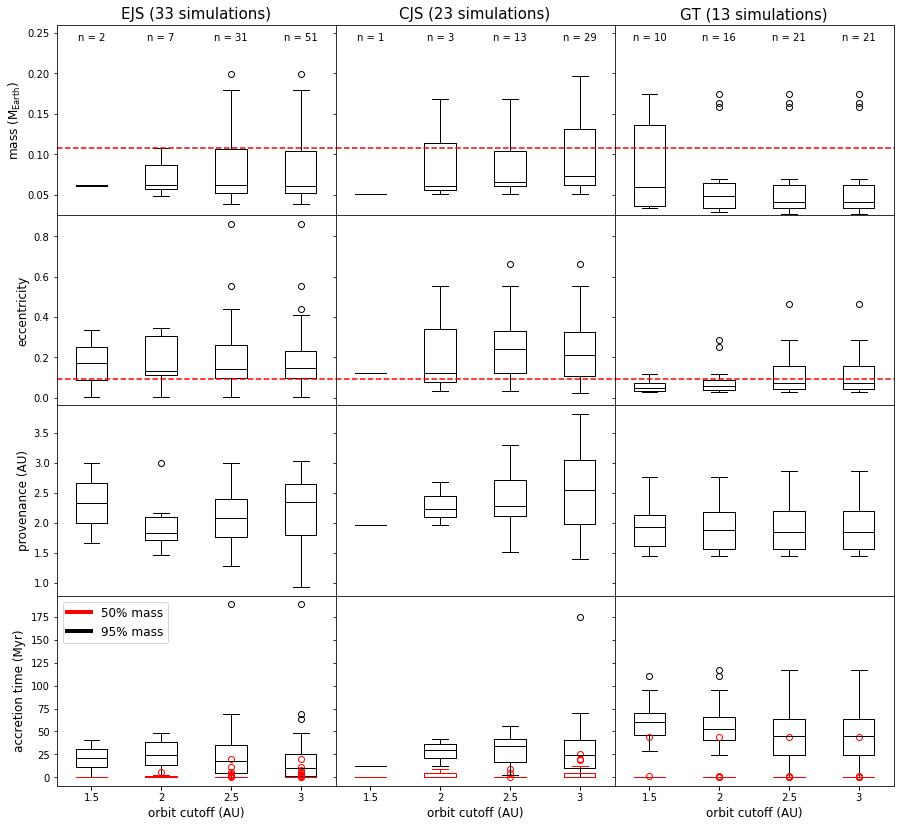

In [14]:
fig17 = plt.figure(figsize=(15,14))

EJS_num_data = [len(EJS_masses_15),len(EJS_masses_2),len(EJS_masses_25),len(EJS_masses_3)]
CJS_num_data = [len(CJS_masses_15),len(CJS_masses_2),len(CJS_masses_25),len(CJS_masses_3)]
GT_num_data = [len(GT_masses_15),len(GT_masses_2),len(GT_masses_25),len(GT_masses_3)]
EJS_mass_data = [EJS_masses_15,EJS_masses_2,EJS_masses_25,EJS_masses_3]
CJS_mass_data = [CJS_masses_15,CJS_masses_2,CJS_masses_25,CJS_masses_3]
GT_mass_data = [GT_masses_15,GT_masses_2,GT_masses_25,GT_masses_3]
ax17_1 = fig17.add_subplot(431)
ax17_1.boxplot(EJS_mass_data, medianprops=dict(color='k'))
ax17_1.axhline(Mars_mass, color = 'r', linestyle = '--')
ax17_1.set_xticklabels(orbit_cutoff_steps)
ax17_1.set_ylabel('mass (M$_\mathrm{Earth}$)', fontsize = 12)
ax17_1.set_title('EJS (33 simulations)', fontsize = 15)
ax17_1.set_ylim([0.025,0.26])
ax17_1.text(1,0.24,'n = ' + str(EJS_num_data[0]),horizontalalignment = 'center')
ax17_1.text(2,0.24,'n = ' + str(EJS_num_data[1]),horizontalalignment = 'center')
ax17_1.text(3,0.24,'n = ' + str(EJS_num_data[2]),horizontalalignment = 'center')
ax17_1.text(4,0.24,'n = ' + str(EJS_num_data[3]),horizontalalignment = 'center')
ax17_2 = fig17.add_subplot(432,sharey = ax17_1)
ax17_2.boxplot(CJS_mass_data, medianprops=dict(color='k'))
ax17_2.axhline(Mars_mass, color = 'r', linestyle = '--')
ax17_2.set_xticklabels(orbit_cutoff_steps)
ax17_2.set_title('CJS (23 simulations)', fontsize = 15)
ax17_2.text(1,0.24,'n = ' + str(CJS_num_data[0]),horizontalalignment = 'center')
ax17_2.text(2,0.24,'n = ' + str(CJS_num_data[1]),horizontalalignment = 'center')
ax17_2.text(3,0.24,'n = ' + str(CJS_num_data[2]),horizontalalignment = 'center')
ax17_2.text(4,0.24,'n = ' + str(CJS_num_data[3]),horizontalalignment = 'center')
ax17_3 = fig17.add_subplot(433,sharey = ax17_1)
ax17_3.boxplot(GT_mass_data, medianprops=dict(color='k'))
ax17_3.axhline(Mars_mass, color = 'r', linestyle = '--')
ax17_3.set_xticklabels(orbit_cutoff_steps)
ax17_3.set_title('GT (13 simulations)', fontsize = 15)
ax17_3.text(1,0.24,'n = ' + str(GT_num_data[0]),horizontalalignment = 'center')
ax17_3.text(2,0.24,'n = ' + str(GT_num_data[1]),horizontalalignment = 'center')
ax17_3.text(3,0.24,'n = ' + str(GT_num_data[2]),horizontalalignment = 'center')
ax17_3.text(4,0.24,'n = ' + str(GT_num_data[3]),horizontalalignment = 'center')
plt.setp(ax17_2.get_yticklabels(), visible=False)
plt.setp(ax17_3.get_yticklabels(), visible=False)

EJS_ecc_data = [EJS_ecc_15,EJS_ecc_2,EJS_ecc_25,EJS_ecc_3]
CJS_ecc_data = [CJS_ecc_15,CJS_ecc_2,CJS_ecc_25,CJS_ecc_3]
GT_ecc_data = [GT_ecc_15,GT_ecc_2,GT_ecc_25,GT_ecc_3]
ax17_4 = fig17.add_subplot(434)
ax17_4.boxplot(EJS_ecc_data, medianprops=dict(color='k'))
ax17_4.axhline(Mars_ecc, color = 'r', linestyle = '--')
ax17_4.set_xticklabels(orbit_cutoff_steps)
ax17_4.set_ylabel('eccentricity', fontsize = 12)
ax17_5 = fig17.add_subplot(435,sharey = ax17_4)
ax17_5.boxplot(CJS_ecc_data, medianprops=dict(color='k'))
ax17_5.axhline(Mars_ecc, color = 'r', linestyle = '--')
ax17_5.set_xticklabels(orbit_cutoff_steps)
ax17_6 = fig17.add_subplot(436,sharey = ax17_4)
ax17_6.boxplot(GT_ecc_data, medianprops=dict(color='k'))
ax17_6.axhline(Mars_ecc, color = 'r', linestyle = '--')
ax17_6.set_xticklabels(orbit_cutoff_steps)
plt.setp(ax17_5.get_yticklabels(), visible=False)
plt.setp(ax17_6.get_yticklabels(), visible=False)

EJS_MWSMA_data = [EJS_MWSMA_15,EJS_MWSMA_2,EJS_MWSMA_25,EJS_MWSMA_3]
CJS_MWSMA_data = [CJS_MWSMA_15,CJS_MWSMA_2,CJS_MWSMA_25,CJS_MWSMA_3]
GT_MWSMA_data = [GT_MWSMA_15,GT_MWSMA_2,GT_MWSMA_25,GT_MWSMA_3]
ax17_7 = fig17.add_subplot(437)
ax17_7.boxplot(EJS_MWSMA_data, medianprops=dict(color='k'))
ax17_7.set_xticklabels(orbit_cutoff_steps)
ax17_7.set_ylabel('provenance (AU)', fontsize = 12)
#ax17_7.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax17_8 = fig17.add_subplot(438,sharey = ax17_7)
ax17_8.boxplot(CJS_MWSMA_data, medianprops=dict(color='k'))
ax17_8.set_xticklabels(orbit_cutoff_steps)
#ax17_8.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax17_9 = fig17.add_subplot(439,sharey = ax17_7)
ax17_9.boxplot(GT_MWSMA_data, medianprops=dict(color='k'))
ax17_9.set_xticklabels(orbit_cutoff_steps)
#ax17_9.set_xlabel('orbit cutoff (AU)', fontsize = 15)
plt.setp(ax17_8.get_yticklabels(), visible=False)
plt.setp(ax17_9.get_yticklabels(), visible=False)

EJS_t50_data = [np.divide(EJS_t50_15,1e6),np.divide(EJS_t50_2,1e6),np.divide(EJS_t50_25,1e6),np.divide(EJS_t50_3,1e6)]
CJS_t50_data = [np.divide(CJS_t50_15,1e6),np.divide(CJS_t50_2,1e6),np.divide(CJS_t50_25,1e6),np.divide(CJS_t50_3,1e6)]
GT_t50_data = [np.divide(GT_t50_15,1e6),np.divide(GT_t50_2,1e6),np.divide(GT_t50_25,1e6),np.divide(GT_t50_3,1e6)]
EJS_t95_data = [np.divide(EJS_t95_15,1e6),np.divide(EJS_t95_2,1e6),np.divide(EJS_t95_25,1e6),np.divide(EJS_t95_3,1e6)]
CJS_t95_data = [np.divide(CJS_t95_15,1e6),np.divide(CJS_t95_2,1e6),np.divide(CJS_t95_25,1e6),np.divide(CJS_t95_3,1e6)]
GT_t95_data = [np.divide(GT_t95_15,1e6),np.divide(GT_t95_2,1e6),np.divide(GT_t95_25,1e6),np.divide(GT_t95_3,1e6)]

ax17_10 = fig17.add_subplot(4,3,10)
ax17_10.boxplot(EJS_t95_data,medianprops=dict(color='k'))
ax17_10.boxplot(EJS_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'), whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax17_10.set_xticklabels(orbit_cutoff_steps)
ax17_10.set_ylabel('accretion time (Myr)', fontsize = 12)
ax17_11 = fig17.add_subplot(4,3,11,sharey = ax17_10)
ax17_11.boxplot(CJS_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'), whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax17_11.boxplot(CJS_t95_data, medianprops=dict(color='k'))
ax17_11.set_xticklabels(orbit_cutoff_steps)
ax17_12 = fig17.add_subplot(4,3,12,sharey = ax17_10)
ax17_12.boxplot(GT_t95_data, medianprops=dict(color='k'))
ax17_12.boxplot(GT_t50_data,patch_artist=True,flierprops=dict(color='r', markeredgecolor='r'),whiskerprops=dict(color='r'),capprops=dict(color='r'), medianprops=dict(color='r'),boxprops=dict(facecolor='none', color='r'))
ax17_12.set_xticklabels(orbit_cutoff_steps)
plt.setp(ax17_11.get_yticklabels(), visible=False)
plt.setp(ax17_12.get_yticklabels(), visible=False)
ax17_10.set_xticklabels(orbit_cutoff_steps)
ax17_11.set_xticklabels(orbit_cutoff_steps)
ax17_12.set_xticklabels(orbit_cutoff_steps)
ax17_10.set_xlabel('orbit cutoff (AU)', fontsize = 12)
ax17_11.set_xlabel('orbit cutoff (AU)', fontsize = 12)
ax17_12.set_xlabel('orbit cutoff (AU)', fontsize = 12)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='r', label='50% mass', lw =4), Line2D([0], [0], color='k', label='95% mass', lw =4)]
ax17_10.legend(handles=legend_elements, fontsize =12)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
#fig17.savefig('distributions_figure.png')
#fig17.savefig('figure2.pdf')

In [15]:
np.median(CJS_t95_3)/1e6

24.1

fig8 = plt.figure(figsize=(10, 8))
ax8 = fig8.add_subplot(111)
ax8.plot(orbit_cutoff_steps,[len(EJS_masses_15),len(EJS_masses_2),len(EJS_masses_25),len(EJS_masses_3)],c= 'r',marker='o', label = 'EJS')
ax8.plot(orbit_cutoff_steps,[len(CJS_masses_15),len(CJS_masses_2),len(CJS_masses_25),len(CJS_masses_3)],c= 'b',marker='^', label = 'CJS')
ax8.plot(orbit_cutoff_steps,[len(GT_masses_15),len(GT_masses_2),len(GT_masses_25),len(GT_masses_3)],c= 'g',marker='s', label = 'GT')
ax8.set_ylabel('number of analogs')
ax8.set_xlabel('orbit cutoff')
plt.legend()
plt.show()

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('SMA (AU)')
ax1.set_ylabel('MWSMA (AU)')
ax1.set_xlim([0.9,3.1])
ax1.axvline(x=Mars_orbit, ymin=0, ymax=4, color = 'k', linestyle = '--')
ax1.scatter(0.995, 3.4, s = np.multiply(Mars_mass,500), marker='o', facecolors = 'none', color = 'k')
ax1.text(1.05, 3.37, '0.107 $M_{⨁} $')
#ax1.text(1.05, 3.37, 'M$_{⨁} $')
ax1.scatter(EJS_orbits, EJS_MWSMA, s = np.multiply(EJS_masses,500), marker='o', facecolors = 'none', color = 'r', label = 'EJS')
ax1.scatter(CJS_orbits, CJS_MWSMA, s = np.multiply(CJS_masses,500), marker='o', facecolors = 'none', color = 'b', label = 'CJS')
ax1.scatter(GT_orbits, GT_MWSMA, s = np.multiply(GT_masses,500), marker='o', facecolors = 'none', color = 'g', label = 'GT')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
#identify bodies in the cluster near actual mars
min_SMA = 1.3
max_SMA = 1.6
max_ecc = 0.2
print('CJS #s in cluster:')
for i in range(len(CJS_orbits)):
    if CJS_orbits[i] > min_SMA and CJS_orbits[i] < max_SMA and CJS_ecc[i] < max_ecc:
        print(i)
        #print(CJS_masses[i])
        #print(CJS_ecc[i])
        #print(CJS_orbits[i])
print('EJS #s in cluster:')
for i in range(len(EJS_orbits)):
    if EJS_orbits[i] > min_SMA and EJS_orbits[i] < max_SMA and EJS_ecc[i] < max_ecc:
        print(i)
        #print(EJS_masses[i])
        #print(EJS_ecc[i])
        #print(EJS_orbits[i])
print('GT #s in cluster:')
for i in range(len(GT_orbits)):
    if GT_orbits[i] > min_SMA and GT_orbits[i] < max_SMA and GT_ecc[i] < max_ecc:
        print(i)
        #print(GT_masses[i])
        #print(GT_ecc[i])
        #print(GT_orbits[i])

CJS_cluster = [9]
EJS_cluster = [17,44]
GT_cluster = [1,3,5,8,13,16,18,19,20]
CJS_cluster_mass = [0.0508]
CJS_cluster_orbit = [1.4695]
CJS_cluster_ecc = [0.121943]
EJS_cluster_mass = [0.1082356,0.0645217]
EJS_cluster_orbit = [1.55334,1.53976]
EJS_cluster_ecc = [0.105727,0.123369]
GT_cluster_mass = [0.0567,0.0616,0.0697,0.0359,0.0624,0.1742,0.0338,0.0339,0.0364]
GT_cluster_orbit = [1.4597,1.4348,1.4086,1.465,1.517,1.4882,1.4116,1.4771,1.4543]
GT_cluster_ecc = [0.0297,0.1165,0.0427,0.0454,0.0417,0.0685,0.0326,0.0819,0.073]

CJS #s in cluster:
9
EJS #s in cluster:
17
44
GT #s in cluster:
1
3
5
8
13
16
18
19
20


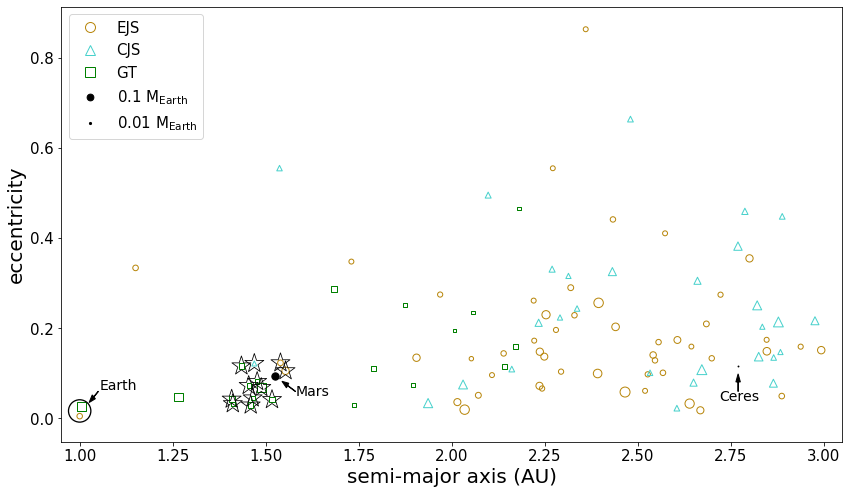

In [17]:
fig2 = plt.figure(figsize=(14, 8))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('SMA (AU)')
ax2.scatter(EJS_orbits, EJS_ecc, s = np.multiply(EJS_masses,500), marker='o', facecolors = 'none', color = 'darkgoldenrod', label = 'EJS')
ax2.scatter(CJS_orbits, CJS_ecc, s = np.multiply(CJS_masses,500), marker='^', facecolors = 'none', color = 'mediumturquoise', label = 'CJS')
ax2.scatter(GT_orbits, GT_ecc, s = np.multiply(GT_masses,500), marker='s', facecolors = 'none', color = 'g', label = 'GT')
ax2.scatter(Mars_orbit, Mars_ecc, s = np.multiply(Mars_mass,500), marker='o', facecolors = 'k', color = 'k')#, label = 'Mars')
ax2.scatter(Earth_orbit, Earth_ecc, s = np.multiply(Earth_mass,500), marker='o', facecolors = 'none', color = 'k', linewidth = 1.3)#, label = 'Earth', linestyle = '-')
ax2.scatter(Ceres_orbit, Ceres_ecc, s = np.multiply(Ceres_mass,5000), marker='o', facecolors = 'k', color = 'k')#, label = 'Ceres') #100x larger for visibility
ax2.scatter(EJS_cluster_orbit, EJS_cluster_ecc, s = 400, marker = '*', facecolors= 'none', color = 'k', linewidth = 0.8)
ax2.scatter(CJS_cluster_orbit, CJS_cluster_ecc, s = 400, marker = '*', facecolors= 'none', color = 'k', linewidth = 0.8)
ax2.scatter(GT_cluster_orbit, GT_cluster_ecc, s = 400, marker = '*', facecolors= 'none', color = 'k', linewidth = 0.8)
ax2.set_xlabel('semi-major axis (AU)', fontsize = 20)
ax2.set_ylabel('eccentricity', fontsize = 20)
#ax2.legend(loc = 'upper left', fontsize = 15)
#ax2.set_ylim([1,4])
ax2.set_xlim([0.95,3.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text(1.053,0.063,'Earth', fontsize = 14)
plt.arrow(1.05,0.06,-0.012,-0.012, head_width = 0.012, color = 'k')
plt.text(1.58,0.05,'Mars', fontsize = 14)
plt.arrow(1.58,0.06,-0.021,0.013, head_width = 0.012, color = 'k')
plt.text(2.72,0.04,'Ceres', fontsize = 14)
plt.arrow(2.77,0.06,0,0.021, head_width = 0.012, color = 'k')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', markerfacecolor = 'none', markeredgecolor = 'darkgoldenrod', color = 'none', markersize = 10, label = 'EJS'),
                  Line2D([0], [0], marker='^', markerfacecolor = 'none', markeredgecolor = 'mediumturquoise', color = 'none', markersize = 10, label = 'CJS'),
                  Line2D([0], [0], marker='s', markerfacecolor = 'none', markeredgecolor = 'g', color = 'none', markersize = 10, label = 'GT'),
                  Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 6.75, label = '0.1 M$_\mathrm{Earth}$'),
                  Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 2.13, label = '0.01 M$_\mathrm{Earth}$')]
ax2.legend(handles=legend_elements, fontsize =15, loc = 'upper left')

plt.show()
#fig2.savefig('analog_scatter.png')
#fig2.savefig('figure1.pdf')

In [18]:
EJS_cluster_MWSMA = []
EJS_cluster_mass_in = []
for i in range(len(EJS_masses)):
    if EJS_masses[i] in(EJS_cluster_mass):
        EJS_cluster_MWSMA.append(EJS_MWSMA[i])
        EJS_cluster_mass_in.append(EJS_mass_in[i])

CJS_cluster_MWSMA = []
CJS_cluster_mass_in = []
for i in range(len(CJS_masses)):
    if CJS_masses[i] in(CJS_cluster_mass):
        CJS_cluster_MWSMA.append(CJS_MWSMA[i])
        CJS_cluster_mass_in.append(CJS_mass_in[i])
    
GT_cluster_MWSMA = []
GT_cluster_mass_in = []
for i in range(len(GT_masses)):
    if GT_masses[i] in(GT_cluster_mass):
        GT_cluster_MWSMA.append(GT_MWSMA[i])
        GT_cluster_mass_in.append(GT_mass_in[i])

print('EJS cluster median provenance:',round(np.median(EJS_cluster_MWSMA),3))
print('CJS cluster median provenance:',np.median(CJS_cluster_MWSMA))
print('GT cluster median provenance:',np.median(GT_cluster_MWSMA))

print('EJS cluster median inner mass fraction:',np.median(EJS_cluster_mass_in))
print('CJS cluster median inner mass fraction::',np.median(CJS_cluster_mass_in))
print('GT cluster median inner mass fraction::',np.median(GT_cluster_mass_in))

EJS cluster median provenance: 1.877
CJS cluster median provenance: 1.9706
GT cluster median provenance: 1.9761
EJS cluster median inner mass fraction: 0.13
CJS cluster median inner mass fraction:: 0.04
GT cluster median inner mass fraction:: 0.11


In [19]:
#partial equilibration (1 - 3 AU bodies) 
#average values and standard deviations
k_core_steps = [0,0.25,0.5,0.75,1]
EJS_k_mantle_1 = [5.51,4.72,4.27,3.91,3.61]
EJS_k_mantle_1_dev = [0.54,0.61,0.92,1.14,1.30]
EJS_k_mantle_05 = [5.38,4.73,4.31,3.96,3.68] #0.5
EJS_k_mantle_05_dev = [0.47,0.58,0.86,1.06,1.22]
EJS_k_mantle_0 = [5.24,4.68,4.35,4.10,3.88]
EJS_k_mantle_0_dev = [0.41,0.48,0.65,0.77,0.86]
CJS_k_mantle_1 = [4.94,3.81,3.21,2.78,2.44]
CJS_k_mantle_1_dev = [0.50,0.66,0.99,1.14,1.19]
CJS_k_mantle_05 = [4.84,3.84,3.28,2.87,2.54] #0.5
CJS_k_mantle_05_dev = [0.45,0.62,0.92,1.06,1.13]
CJS_k_mantle_0 = [4.73,3.91,3.54,3.27,3.07]
CJS_k_mantle_0_dev = [0.39,0.52,0.74,0.88,0.98]
GT_k_mantle_1 = [5.31,4.27,3.62,3.14,2.75]
GT_k_mantle_1_dev = [0.55,0.72,1.13,1.39,1.56]
GT_k_mantle_05 = [5.25,4.31,3.73,3.31,3.01]
GT_k_mantle_05_dev = [0.50,0.68,1.04,1.27,1.40]
GT_k_mantle_0 = [5.19,4.49,4.19,3.97,3.80]
GT_k_mantle_0_dev = [0.45,0.55,0.78,0.92,1.01]

In [20]:
#anomaly lists
EJS_kmantle1_kcore1 = [4.26,3.00,3.78,2.92,4.59,4.50,2.78,5.55,3.67,1.15,1.73,1.97,5.64,5.15,4.52,3.70,5.71,2.34,5.42,4.61,4.42,5.13,3.36,3.01,2.08,3.31,1.89,3.72,3.54,4.26,2.60,3.16,3.16,3.42,2.63,3.54,3.20,0.48,5.45,
           4.39,4.90,4.21,5.36,3.11,3.72,2.30,5.00,2.54,2.95,0.61,5.60] #EJS_3
EJS_kmantle1_kcore075 = [4.44,3.54,4.12,3.50,4.64,4.68,3.17,5.64,3.98,1.59,2.41,2.40,5.74,5.08,4.68,4.08,5.76,2.88,5.32,4.68,4.60,5.12,3.78,3.42,2.54,3.79,2.25,4.07,4.12,4.47,3.05,3.70,
                         3.61,3.88,3.37,3.91,3.57,0.84,5.41,4.55,4.85,4.37,5.27,3.76,4.23,2.69,4.94,3.19,3.30,0.95] #EJS_6
EJS_kmantle1_kcore05 = [4.62,4.18,4.51,4.83,4.68,4.82,3.67,5.66,4.30,2.30,3.29,2.99,5.77,5.01,4.81,4.47,5.75,3.58,5.21,4.75,4.76,5.08,4.20,3.92,3.16,4.38,2.74,4.41,4.74,4.67,3.65,4.41,
                       4.17,4.38,4.27,4.33,4.01,1.54,5.35,4.70,4.78,4.51,5.16,4.59,4.74,3.19,4.88,4.00,3.70,1.52,5.54] #EJS_25
EJS_kmantle1_kcore025 = [4.77,4.91,4.92,4.80,4.73,4.91,4.33,5.61,4.62,3.48,4.39,3.85,5.69,4.94,4.90,4.82,5.63,4.49,5.09,4.82,4.88,5.01,4.61,4.52,4.02,5.06,3.49,4.75,5.35,4.84,4.45,5.34,
                         4.86,4.88,5.28,4.74,4.54,2.97,5.25,4.85,4.72,4.64,5.01,5.54,5.21,3.86,4.81,4.94,4.20,2.71,5.44] #EJS_5
EJS_kmantle1_kcore0 = [5.07,5.93,5.62,5.62,4.82,5.25,5.54,5.78,5.01,5.70,5.91,5.27,5.86,4.93,5.19,5.45,5.83,5.99,5.07,4.93,5.18,5.13,5.24,5.36,5.43,6.13,4.89,5.19,6.11,5.16,5.84,7.03,
                       5.94,5.62,6.58,5.18,5.36,6.24,5.31,5.08,4.74,4.89,5.11,6.83,6.02,4.92,4.81,6.25,4.94,6.34,5.54] #EJS_4
EJS_kmantle05_kcore1 = [4.29,3.04,3.78,3.12,4.59,4.51,2.93,5.51,3.76,1.49,1.90,2.20,5.60,5.10,4.53,3.76,5.65,2.42,5.35,4.63,4.44,5.08,3.44,3.07,2.14,3.34,1.93,3.82,3.78,4.29,2.85,3.21,
                        3.15,3.52,2.87,3.51,3.31,0.84,5.38,4.42,4.86,4.23,5.28,3.32,3.82,2.49,4.96,2.73,3.08,0.72,5.53] #EJS_7
EJS_kmantle05_kcore075 = [4.45,3.56,4.10,3.62,4.64,4.67,3.29,5.59,4.03,1.90,2.53,2.61,5.69,5.05,4.67,4.11,5.70,2.95,5.27,4.69,4.60,5.08,3.82,3.46,2.60,3.81,2.28,4.12,4.26,4.48,3.29,
                          3.74,3.60,3.94,3.54,3.88,3.65,1.24,5.36,4.56,4.82,4.37,5.22,3.91,4.27,2.85,4.92,3.32,3.39,1.09,5.53] #EJS_8
EJS_kmantle05_kcore05 = [4.62,4.19,4.48,4.19,4.68,4.81,3.76,5.62,4.32,2.54,3.36,3.16,5.73,5.00,4.80,4.48,5.70,3.62,5.19,4.76,4.75,5.06,4.21,3.93,3.20,4.37,2.76,4.43,4.80,4.66,3.84,4.43,
                         4.16,4.40,4.35,4.29,4.05,1.91,5.32,4.70,4.77,4.51,5.13,4.66,4.75,3.31,4.87,4.07,3.76,1.69,5.50] #EJS_9
EJS_kmantle05_kcore025 = [4.77,4.90,4.89,4.81,4.73,4.90,4.37,5.59,4.62,3.59,4.41,3.93,5.67,4.93,4.89,4.82,5.61,4.51,5.08,4.82,4.88,5.00,4.61,4.50,4.03,5.04,3.46,4.75,5.36,4.83,4.56,5.33,
                          4.86,4.88,5.29,4.71,4.53,3.18,5.24,4.84,4.71,4.64,5.00,5.54,5.20,3.91,4.81,4.95,4.21,2.84,5.42] #EJS_10
EJS_kmantle05_kcore0 = [4.99,5.72,5.41,5.53,4.80,5.09,5.39,5.62,4.97,5.57,5.77,5.18,5.67,4.89,5.07,5.28,5.61,5.79,5.01,4.91,5.07,5.02,5.11,5.26,5.29,5.88,4.82,5.13,5.98,5.06,5.70,6.61,
                        5.74,5.48,6.33,5.09,5.24,6.05,5.22,5.03,4.69,4.82,4.98,6.54,5.76,4.86,4.77,6.05,4.87,6.14,5.41] #EJS_11
EJS_kmantle0_kcore1 = [4.37,3.50,3.51,4.36,4.62,4.26,3.07,4.82,4.39,2.03,3.75,2.50,4.77,4.76,4.37,4.11,4.66,3.12,4.82,4.72,4.41,4.50,4.04,3.34,2.52,3.57,1.94,4.40,4.68,4.38,3.15,3.63,
                       3.25,4.23,4.27,3.58,3.37,2.16,4.77,4.58,4.51,4.31,4.45,4.33,4.21,2.84,4.65,4.10,3.14,1.31,4.80] #EJS_12
EJS_kmantle0_kcore075 = [4.47,3.88,3.85,4.52,4.65,4.39,3.39,4.97,4.47,2.43,4.00,2.89,4.94,4.79,4.48,4.28,4.83,3.49,4.86,4.75,4.51,4.59,4.19,3.64,2.90,3.95,2.29,4.50,4.89,4.48,3.52,4.09,
                         3.67,4.41,4.59,3.90,3.65,2.48,4.86,4.65,4.54,4.39,4.54,4.69,4.45,3.13,4.68,4.37,3.42,1.65,4.91] #EJS_13
EJS_kmantle0_kcore05 = [4.57,4.31,4.24,4.71,4.68,4.53,3.79,5.12,4.56,2.97,4.30,3.37,5.11,4.81,4.60,4.47,5.01,3.95,4.90,4.78,4.62,4.68,4.35,4.01,3.38,4.40,2.74,4.62,5.12,4.60,3.98,4.65,
                        4.18,4.61,4.95,4.26,3.99,2.94,4.94,4.72,4.58,4.47,4.64,5.10,4.71,3.49,4.70,4.69,3.76,2.17,5.03] #EJS_14
EJS_kmantle0_kcore025 = [4.69,4.84,4.68,4.95,4.71,4.69,4.31,5.28,4.67,3.79,4.71,4.02,5.29,4.84,4.73,4.69,5.20,4.56,4.94,4.82,4.75,4.78,4.56,4.46,4.04,4.94,3.41,4.76,5.39,4.73,4.57,5.33,
                         4.79,4.86,5.38,4.64,4.42,3.70,5.03,4.81,4.61,4.57,4.73,5.58,5.01,3.96,4.72,5.09,4.17,3.11,5.15] #EJS_15
EJS_kmantle0_kcore0 = [4.90,5.52,5.20,5.45,4.78,4.93,5.23,5.46,4.93,5.43,5.63,5.09,5.47,4.86,4.95,5.10,5.39,5.59,4.96,4.89,4.97,4.90,4.98,5.16,5.15,5.64,4.76,5.06,5.85,4.97,5.56,6.20,5.55,
                       5.33,6.09,5.00,5.11,5.86,5.12,4.98,4.64,4.75,4.84,6.25,5.51,4.80,4.74,5.85,4.81,5.94,5.28] #EJS_16

CJS_kmantle1_kcore1 = [1.07,3.48,4.08,3.20,2.47,3.29,3.18,1.98,3.43,3.95,0.51,3.94,1.03,2.27,2.04,3.75,1.97,3.11,0.73,2.81,2.39,4.51,0.89,3.52,2.53,1.18,0.32,2.29,0.83] #CJS 2
CJS_kmantle1_kcore075 = [1.44,3.64,4.30,3.53,2.91,3.59,3.45,2.41,3.63,4.25,0.91,4.00,1.47,2.80,2.42,3.98,2.41,3.51,1.12,3.27,2.82,4.72,1.26,3.86,2.90,1.52,0.62,2.70,1.23] #CJS_3
CJS_kmantle1_kcore05 = [2.06,3.80,4.51,3.87,3.45,3.90,3.73,2.99,3.82,4.55,1.57,4.06,2.15,3.39,2.90,4.19,3.01,3.91,1.75,3.75,3.29,4.91,1.82,4.19,3.36,2.08,1.18,3.14,1.84] #CJS_14
CJS_kmantle1_kcore025 = [3.18,3.96,4.69,4.22,4.12,4.21,4.02,3.84,4.02,4.82,2.74,4.11,3.36,4.04,3.51,4.38,3.89,4.32,2.87,4.26,3.80,5.04,2.76,4.51,3.96,3.11,2.33,3.61,2.86] #CJS_15
CJS_kmantle1_kcore0 = [5.72,4.14,5.05,4.68,5.10,4.64,4.38,5.47,4.27,5.30,5.14,4.22,6.10,4.91,4.40,4.77,5.65,4.88,5.24,4.88,4.41,5.47,4.57,4.98,4.99,5.70,5.17,4.16,4.89] #CJS_16
CJS_kmantle05_kcore1 = [1.26,3.52,4.12,3.28,2.53,3.35,3.24,2.01,3.48,4.01,0.89,3.94,1.18,2.38,2.15,3.78,2.00,3.21,1.01,2.94,2.48,4.52,1.03,3.61,2.57,1.31,0.51,2.37,1.02] #CJS_4
CJS_kmantle05_kcore075 = [1.65,3.66,4.31,3.58,2.96,3.63,3.48,2.44,3.65,4.28,1.28,4.00,1.64,2.87,2.51,3.98,2.44,3.56,1.38,3.34,2.88,4.71,1.40,3.90,2.93,1.67,0.82,2.74,1.42] #CJS_5
CJS_kmantle05_kcore05 = [2.25,3.81,4.50,3.89,3.48,3.92,3.74,3.02,3.83,4.55,1.88,4.06,2.32,3.42,2.96,4.19,3.04,3.93,1.96,3.79,3.32,4.89,1.94,4.20,3.38,2.22,1.36,3.16,2.00]
CJS_kmantle05_kcore025 = [3.29,3.96,4.68,4.22,4.13,4.21,4.02,3.86,4.02,4.81,2.91,4.11,3.47,4.04,3.54,4.38,3.91,4.32,2.96,4.26,3.80,5.03,2.81,4.51,3.96,3.21,2.43,3.62,2.93] #CJS_7
CJS_kmantle05_kcore0 = [5.54,4.14,4.94,4.62,4.99,4.58,4.34,5.28,4.25,5.16,5.04,4.20,5.89,4.80,4.36,4.66,5.43,4.79,5.08,4.82,4.37,5.28,4.51,4.89,4.83,5.51,5.02,4.14,4.78] #CJS_8
CJS_kmantle0_kcore1 = [1.87,3.89,4.17,3.90,2.98,3.89,3.81,2.38,3.87,4.18,1.89,3.99,2.24,3.53,2.58,3.88,2.40,3.87,1.63,3.93,3.51,4.19,1.53,4.07,2.78,1.73,1.14,3.38,1.80] #CJS_9
CJS_kmantle0_kcore075 = [2.26,3.92,4.29,4.00,3.30,3.99,3.88,2.76,3.92,4.34,2.18,4.02,2.59,3.69,2.85,3.99,2.79,4.00,1.96,4.05,3.62,4.37,1.84,4.19,3.09,2.09,1.45,3.48,2.09] #CJS_10
CJS_kmantle0_kcore05 = [2.78,3.96,4.42,4.11,3.68,4.09,3.96,3.24,3.97,4.50,2.58,4.05,3.06,3.88,3.17,4.12,3.29,4.15,2.41,4.19,3.74,4.56,2.26,4.32,3.47,2.58,1.90,3.59,2.48] #CJS_11
CJS_kmantle0_kcore025 = [3.59,4.01,4.57,4.25,4.15,4.23,4.07,3.92,4.05,4.70,3.24,4.09,3.80,4.14,3.60,4.27,3.98,4.33,3.14,4.36,3.92,4.78,2.93,4.48,3.94,3.39,2.69,3.74,3.11] #CJS_12
CJS_kmantle0_kcore0 = [5.35,4.13,4.83,4.56,4.89,4.52,4.31,5.10,4.22,5.03,4.95,4.17,5.67,4.70,4.33,4.54,5.21,4.70,4.92,4.76,4.33,5.09,4.44,4.80,4.68,5.32,4.87,4.12,4.67] #CJS_13

GT_kmantle1_kcore1 = [3.42,3.51,4.18,2.27,1.52,1.59,2.95,4.40,1.10,0.86,4.49,6.48,5.07,1.00,2.38,3.76,0.30,2.30,1.63,3.22,1.43] #GT_2
GT_kmantle1_kcore075 = [3.64,3.74,4.23,2.74,2.08,2.18,3.33,4.74,1.72,1.38,4.66,6.36,5.10,1.49,2.92,4.07,0.64,2.84,2.24,3.72,2.03] #GT_3
GT_kmantle1_kcore05 = [3.88,3.98,4.27,3.28,2.86,2.90,3.74,5.06,2.58,2.14,4.85,6.15,5.13,2.22,3.64,4.42,1.26,3.50,3.04,4.28,2.85] #GT_4
GT_kmantle1_kcore025 = [4.14,4.23,4.31,3.90,4.00,3.77,4.17,5.31,3.80,3.41,5.05,5.83,5.16,3.40,4.55,4.81,2.59,4.32,4.09,4.87,3.98] #GT_5
GT_kmantle1_kcore0 = [4.45,4.51,4.38,4.62,6.20,4.82,4.67,5.50,5.48,6.33,5.34,5.48,5.19,5.46,5.74,5.30,6.19,5.34,5.47,5.52,5.53] #GT_6
GT_kmantle05_kcore1 = [3.54,3.61,4.18,2.53,1.59,1.86,3.11,4.61,1.71,0.92,4.61,6.03,5.07,1.69,2.76,4.07,0.54,2.93,2.22,3.58,1.96] #GT_7
GT_kmantle05_kcore075 = [3.71,3.79,4.22,2.89,2.10,2.34,3.41,4.83,2.18,1.40,4.74,6.02,5.10,2.10,3.19,4.27,0.87,3.27,2.67,3.94,2.42] #GT_8
GT_kmantle05_kcore05 = [3.92,4.01,4.27,3.36,2.88,3.00,3.78,5.08,2.89,2.17,4.89,5.94,5.13,2.72,3.80,4.53,1.49,3.76,3.31,4.39,3.11] #GT_9
GT_kmantle05_kcore025 = [4.15,4.23,4.31,3.92,4.00,3.79,4.17,5.30,3.90,3.40,5.06,5.75,5.16,3.65,4.59,4.85,2.74,4.41,4.18,4.89,4.07] #GT_10
GT_kmantle05_kcore0 = [4.44,4.49,4.37,4.61,5.89,4.78,4.64,5.46,5.47,6.13,5.31,5.42,5.19,5.41,5.66,5.29,5.99,5.34,5.45,5.48,5.51] #GT_11
GT_kmantle0_kcore1 = [4.08,4.03,4.29,3.66,2.48,3.35,3.81,4.69,3.69,1.88,4.86,5.06,5.16,2.59,3.91,4.74,1.14,4.30,3.98,4.42,3.78] #GT_12
GT_kmantle0_kcore075 = [4.12,4.10,4.30,3.78,2.86,3.53,3.93,4.85,3.89,2.30,4.93,5.18,5.16,2.92,4.16,4.81,1.49,4.43,4.16,4.59,3.98] #GT_13
GT_kmantle0_kcore05 = [4.17,4.18,4.31,3.92,3.36,3.74,4.06,5.01,4.14,2.87,5.01,5.29,5.17,3.35,4.45,4.90,2.04,4.58,4.36,4.78,4.23] #GT_14
GT_kmantle0_kcore025 = [4.24,4.27,4.32,4.11,4.09,4.03,4.23,5.19,4.49,3.79,5.10,5.38,5.17,3.97,4.82,5.01,3.04,4.78,4.65,5.00,4.58] #GT_15
GT_kmantle0_kcore0 = [4.42,4.48,4.35,4.59,5.56,4.75,4.60,5.41,5.47,5.91,5.28,5.36,5.19,5.36,5.57,5.28,5.78,5.34,5.42,5.43,5.48] #GT_16

In [21]:
EJS_eps = [EJS_kmantle0_kcore0[i] for i in EJS_members]
CJS_eps = [CJS_kmantle0_kcore0[i] for i in CJS_members]
GT_eps = [GT_kmantle0_kcore0[i] for i in GT_members]
#print(np.median(EJS_eps),'(',np.quantile(EJS_eps,0.25),',',np.quantile(EJS_eps,0.75),')')
print(EJS_eps)
print(CJS_eps)
print(GT_eps)

[4.9, 5.52, 5.2, 5.45, 4.78, 4.93, 5.23, 5.46, 4.93, 5.43, 5.63, 5.09, 5.47, 4.86, 4.95, 5.1, 5.39, 5.59, 4.96, 4.89, 4.97, 4.9, 4.98, 5.16, 5.15, 5.64, 4.76, 5.06, 5.85, 4.97, 5.56, 6.2, 5.55, 5.33, 6.09, 5.0, 5.11, 5.86, 5.12, 4.98, 4.64, 4.75, 4.84, 6.25, 5.51, 4.8, 4.74, 5.85, 4.81, 5.94, 5.28]
[5.35, 4.13, 4.83, 4.56, 4.89, 4.52, 4.31, 5.1, 4.22, 5.03, 4.95, 4.17, 5.67, 4.7, 4.33, 4.54, 5.21, 4.7, 4.92, 4.76, 4.33, 5.09, 4.44, 4.8, 4.68, 5.32, 4.87, 4.12, 4.67]
[4.42, 4.48, 4.35, 4.59, 5.56, 4.75, 4.6, 5.41, 5.47, 5.91, 5.28, 5.36, 5.19, 5.36, 5.57, 5.28, 5.78, 5.34, 5.42, 5.43, 5.48]


In [22]:
EJS_eps_15_kmantle1_kcore1 = [1.73, 4.21]
EJS_eps_15_kmantle0_kcore0 = [5.63, 4.75]
EJS_eps_2_kmantle1_kcore1 = [2.92, 2.78, 1.73, 2.34, 4.21, 3.72, 2.54]
EJS_eps_2_kmantle0_kcore0 = [5.45, 5.23, 5.63, 5.59, 4.75, 5.51, 5.85]
EJS_eps_25_kmantle1_kcore1 = [4.26, 3.0, 2.92, 2.78, 5.55, 1.15, 1.73, 1.97, 5.15, 3.7, 5.71, 2.34, 4.61, 5.13, 3.36, 3.01, 2.08, 3.31, 3.72, 3.54, 3.16, 3.42, 0.48, 5.45, 4.39, 4.21, 3.72, 2.3, 2.54, 0.61, 5.6]
EJS_eps_25_kmantle0_kcore0 = [4.9, 5.52, 5.45, 5.23, 5.46, 5.43, 5.63, 5.09, 4.86, 5.1, 5.39, 5.59, 4.89, 4.9, 4.98, 5.16, 5.15, 5.64, 5.06, 5.85, 5.55, 5.33, 5.86, 5.12, 4.98, 4.75, 5.51, 4.8, 5.85, 5.94, 5.28]
EJS_eps_3_kmantle1_kcore1 = [4.26,3.00,3.78,2.92,4.59,4.50,2.78,5.55,3.67,1.15,1.73,1.97,5.64,5.15,4.52,3.70,5.71,2.34,5.42,4.61,4.42,5.13,3.36,3.01,2.08,3.31,1.89,3.72,3.54,4.26,2.60,3.16,3.16,3.42,2.63,3.54,3.20,0.48,5.45,
           4.39,4.90,4.21,5.36,3.11,3.72,2.30,5.00,2.54,2.95,0.61,5.60]
EJS_eps_3_kmantle0_kcore0 = [4.90,5.52,5.20,5.45,4.78,4.93,5.23,5.46,4.93,5.43,5.63,5.09,5.47,4.86,4.95,5.10,5.39,5.59,4.96,4.89,4.97,4.90,4.98,5.16,5.15,5.64,4.76,5.06,5.85,4.97,5.56,6.20,5.55,
                       5.33,6.09,5.00,5.11,5.86,5.12,4.98,4.64,4.75,4.84,6.25,5.51,4.80,4.74,5.85,4.81,5.94,5.28]

CJS_eps_15_kmantle1_kcore1 = [3.95]
CJS_eps_15_kmantle0_kcore0 = [5.03]
CJS_eps_2_kmantle1_kcore1 = [3.2, 3.95, 0.73]
CJS_eps_2_kmantle0_kcore0 = [4.56, 5.03, 4.92]
CJS_eps_25_kmantle1_kcore1 = [1.07, 3.2, 2.47, 3.18, 3.95, 2.27, 3.75, 1.97, 3.11, 0.73, 2.81, 2.39, 3.52]
CJS_eps_25_kmantle0_kcore0 = [5.35, 4.56, 4.89, 4.31, 5.03, 4.7, 4.54, 5.21, 4.7, 4.92, 4.76, 4.33, 4.8]
CJS_eps_3_kmantle1_kcore1 =  [1.07,3.48,4.08,3.20,2.47,3.29,3.18,1.98,3.43,3.95,0.51,3.94,1.03,2.27,2.04,3.75,1.97,3.11,0.73,2.81,2.39,4.51,0.89,3.52,2.53,1.18,0.32,2.29,0.83]
CJS_eps_3_kmantle0_kcore0 = [5.35,4.13,4.83,4.56,4.89,4.52,4.31,5.10,4.22,5.03,4.95,4.17,5.67,4.70,4.33,4.54,5.21,4.70,4.92,4.76,4.33,5.09,4.44,4.80,4.68,5.32,4.87,4.12,4.67] #CJS_13

GT_eps_15_kmantle1_kcore1 = [3.51, 2.27, 1.52, 1.59, 1.1, 0.86, 0.3, 1.63, 3.22, 1.43]
GT_eps_15_kmantle0_kcore0 = [4.48, 4.59, 5.56, 4.75, 5.47, 5.91, 5.78, 5.42, 5.43, 5.48]
GT_eps_2_kmantle1_kcore1 = [3.51, 2.27, 1.52, 1.59, 2.95, 4.4, 1.1, 0.86, 1.0, 2.38, 3.76, 0.3, 2.3, 1.63, 3.22, 1.43]
GT_eps_2_kmantle0_kcore0 = [4.48, 4.59, 5.56, 4.75, 4.6, 5.41, 5.47, 5.91, 5.36, 5.57, 5.28, 5.78, 5.34, 5.42, 5.43, 5.48]
GT_eps_25_kmantle1_kcore1 = [3.42, 3.51, 4.18, 2.27, 1.52, 1.59, 2.95, 4.4, 1.1, 0.86, 4.49, 6.48, 5.07, 1.0, 2.38, 3.76, 0.3, 2.3, 1.63, 3.22, 1.43]
GT_eps_25_kmantle0_kcore0 = [4.42, 4.48, 4.35, 4.59, 5.56, 4.75, 4.6, 5.41, 5.47, 5.91, 5.28, 5.36, 5.19, 5.36, 5.57, 5.28, 5.78, 5.34, 5.42, 5.43, 5.48]
GT_eps_3_kmantle1_kcore1 = [3.42,3.51,4.18,2.27,1.52,1.59,2.95,4.40,1.10,0.86,4.49,6.48,5.07,1.00,2.38,3.76,0.30,2.30,1.63,3.22,1.43]
GT_eps_3_kmantle0_kcore0 = [4.42,4.48,4.35,4.59,5.56,4.75,4.60,5.41,5.47,5.91,5.28,5.36,5.19,5.36,5.57,5.28,5.78,5.34,5.42,5.43,5.48]

fig3 = plt.figure(figsize=(16, 12))
ax3 = fig3.add_subplot(111)
ax3.errorbar(k_core_steps, EJS_k_mantle_1, yerr = EJS_k_mantle_1_dev, marker = 'o', markersize = 9, capsize = 5, color = 'r')
ax3.errorbar(k_core_steps, EJS_k_mantle_05, yerr = EJS_k_mantle_05_dev, marker = 'o', markersize = 9, capsize = 5, color = 'r', linestyle = '--')
ax3.errorbar(k_core_steps, EJS_k_mantle_0, yerr = EJS_k_mantle_0_dev, marker = 'o', markersize = 9, capsize = 5, color = 'r', linestyle = ':')
ax3.errorbar(k_core_steps, CJS_k_mantle_1, yerr = CJS_k_mantle_1_dev, marker = '^', markersize = 9, capsize = 5, color = 'b', linestyle = '-')
ax3.errorbar(k_core_steps, CJS_k_mantle_05, yerr = CJS_k_mantle_05_dev, marker = '^', markersize = 9, capsize = 5, color = 'b', linestyle = '--')
ax3.errorbar(k_core_steps, CJS_k_mantle_0, yerr = CJS_k_mantle_0_dev, marker = '^', markersize = 9, capsize = 5, color = 'b', linestyle = ':')
ax3.errorbar(k_core_steps, GT_k_mantle_1, yerr = GT_k_mantle_1_dev, marker = 's', markersize = 9, capsize = 5, color = 'g', linestyle = '-')
ax3.errorbar(k_core_steps, GT_k_mantle_05, yerr = GT_k_mantle_05_dev, marker = 's', markersize = 9, capsize = 5, color = 'g', linestyle = '--')
ax3.errorbar(k_core_steps, GT_k_mantle_0, yerr = GT_k_mantle_0_dev, marker = 's', markersize = 9, capsize = 5, color = 'g', linestyle = ':')
ax3.set_ylabel('average \u03B5$_{182W} $',fontsize = 20)
ax3.set_xlabel('k$_{core} $',fontsize = 20)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='EJS',markerfacecolor='r', markersize=9),Line2D([0], [0], marker='^', color='w', label='CJS',markerfacecolor='b', markersize=9),
                  Line2D([0], [0], marker='s', color='w', label='GT',markerfacecolor='g', markersize=9), Line2D([0], [0], color='k', linestyle = '-', label = 'k$_{mantle} $ = 1'),
                  Line2D([0], [0], color='k', linestyle = '--', label = 'k$_{mantle} $ = 0.5'), Line2D([0], [0], color='k', linestyle = ':', label = 'k$_{mantle} $ = 0')]
ax3.legend(handles=legend_elements, fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
test_med = np.median(EJS_kmantle1_kcore0+CJS_kmantle1_kcore0+GT_kmantle1_kcore0)
print(test_med)

5.25


#stagger error bars
EJS_kmantle1_med = [np.median(EJS_kmantle1_kcore0),np.median(EJS_kmantle1_kcore025),np.median(EJS_kmantle1_kcore05),np.median(EJS_kmantle1_kcore075),np.median(EJS_kmantle1_kcore1)]
EJS_kmantle1_upper = [np.quantile(EJS_kmantle1_kcore0,0.75),np.quantile(EJS_kmantle1_kcore025,0.75),np.quantile(EJS_kmantle1_kcore05,0.75),np.quantile(EJS_kmantle1_kcore075,0.75),np.quantile(EJS_kmantle1_kcore1,0.75)]
EJS_kmantle1_lower = [np.quantile(EJS_kmantle1_kcore0,0.25),np.quantile(EJS_kmantle1_kcore025,0.25),np.quantile(EJS_kmantle1_kcore05,0.25),np.quantile(EJS_kmantle1_kcore075,0.25),np.quantile(EJS_kmantle1_kcore1,0.25)]
EJS_kmantle05_med = [np.median(EJS_kmantle05_kcore0),np.median(EJS_kmantle05_kcore025),np.median(EJS_kmantle05_kcore05),np.median(EJS_kmantle05_kcore075),np.median(EJS_kmantle05_kcore1)]
EJS_kmantle05_upper = [np.quantile(EJS_kmantle05_kcore0,0.75),np.quantile(EJS_kmantle05_kcore025,0.75),np.quantile(EJS_kmantle05_kcore05,0.75),np.quantile(EJS_kmantle05_kcore075,0.75),np.quantile(EJS_kmantle05_kcore1,0.75)]
EJS_kmantle05_lower = [np.quantile(EJS_kmantle05_kcore0,0.25),np.quantile(EJS_kmantle05_kcore025,0.25),np.quantile(EJS_kmantle05_kcore05,0.25),np.quantile(EJS_kmantle05_kcore075,0.25),np.quantile(EJS_kmantle05_kcore1,0.25)]
EJS_kmantle0_med = [np.median(EJS_kmantle0_kcore0),np.median(EJS_kmantle0_kcore025),np.median(EJS_kmantle0_kcore05),np.median(EJS_kmantle0_kcore075),np.median(EJS_kmantle0_kcore1)]
EJS_kmantle0_upper = [np.quantile(EJS_kmantle0_kcore0,0.75),np.quantile(EJS_kmantle0_kcore025,0.75),np.quantile(EJS_kmantle0_kcore05,0.75),np.quantile(EJS_kmantle0_kcore075,0.75),np.quantile(EJS_kmantle0_kcore1,0.75)]
EJS_kmantle0_lower = [np.quantile(EJS_kmantle0_kcore0,0.25),np.quantile(EJS_kmantle0_kcore025,0.25),np.quantile(EJS_kmantle0_kcore05,0.25),np.quantile(EJS_kmantle0_kcore075,0.25),np.quantile(EJS_kmantle0_kcore1,0.25)]

CJS_kmantle1_med = [np.median(CJS_kmantle1_kcore0),np.median(CJS_kmantle1_kcore025),np.median(CJS_kmantle1_kcore05),np.median(CJS_kmantle1_kcore075),np.median(CJS_kmantle1_kcore1)]
CJS_kmantle1_upper = [np.quantile(CJS_kmantle1_kcore0,0.75),np.quantile(CJS_kmantle1_kcore025,0.75),np.quantile(CJS_kmantle1_kcore05,0.75),np.quantile(CJS_kmantle1_kcore075,0.75),np.quantile(CJS_kmantle1_kcore1,0.75)]
CJS_kmantle1_lower = [np.quantile(CJS_kmantle1_kcore0,0.25),np.quantile(CJS_kmantle1_kcore025,0.25),np.quantile(CJS_kmantle1_kcore05,0.25),np.quantile(CJS_kmantle1_kcore075,0.25),np.quantile(CJS_kmantle1_kcore1,0.25)]
CJS_kmantle05_med = [np.median(CJS_kmantle05_kcore0),np.median(CJS_kmantle05_kcore025),np.median(CJS_kmantle05_kcore05),np.median(CJS_kmantle05_kcore075),np.median(CJS_kmantle05_kcore1)]
CJS_kmantle05_upper = [np.quantile(CJS_kmantle05_kcore0,0.75),np.quantile(CJS_kmantle05_kcore025,0.75),np.quantile(CJS_kmantle05_kcore05,0.75),np.quantile(CJS_kmantle05_kcore075,0.75),np.quantile(CJS_kmantle05_kcore1,0.75)]
CJS_kmantle05_lower = [np.quantile(CJS_kmantle05_kcore0,0.25),np.quantile(CJS_kmantle05_kcore025,0.25),np.quantile(CJS_kmantle05_kcore05,0.25),np.quantile(CJS_kmantle05_kcore075,0.25),np.quantile(CJS_kmantle05_kcore1,0.25)]
CJS_kmantle0_med = [np.median(CJS_kmantle0_kcore0),np.median(CJS_kmantle0_kcore025),np.median(CJS_kmantle0_kcore05),np.median(CJS_kmantle0_kcore075),np.median(CJS_kmantle0_kcore1)]
CJS_kmantle0_upper = [np.quantile(CJS_kmantle0_kcore0,0.75),np.quantile(CJS_kmantle0_kcore025,0.75),np.quantile(CJS_kmantle0_kcore05,0.75),np.quantile(CJS_kmantle0_kcore075,0.75),np.quantile(CJS_kmantle0_kcore1,0.75)]
CJS_kmantle0_lower = [np.quantile(CJS_kmantle0_kcore0,0.25),np.quantile(CJS_kmantle0_kcore025,0.25),np.quantile(CJS_kmantle0_kcore05,0.25),np.quantile(CJS_kmantle0_kcore075,0.25),np.quantile(CJS_kmantle0_kcore1,0.25)]

GT_kmantle1_med = [np.median(GT_kmantle1_kcore0),np.median(GT_kmantle1_kcore025),np.median(GT_kmantle1_kcore05),np.median(GT_kmantle1_kcore075),np.median(GT_kmantle1_kcore1)]
GT_kmantle1_upper = [np.quantile(GT_kmantle1_kcore0,0.75),np.quantile(GT_kmantle1_kcore025,0.75),np.quantile(GT_kmantle1_kcore05,0.75),np.quantile(GT_kmantle1_kcore075,0.75),np.quantile(GT_kmantle1_kcore1,0.75)]
GT_kmantle1_lower = [np.quantile(GT_kmantle1_kcore0,0.25),np.quantile(GT_kmantle1_kcore025,0.25),np.quantile(GT_kmantle1_kcore05,0.25),np.quantile(GT_kmantle1_kcore075,0.25),np.quantile(GT_kmantle1_kcore1,0.25)]
GT_kmantle05_med = [np.median(GT_kmantle05_kcore0),np.median(GT_kmantle05_kcore025),np.median(GT_kmantle05_kcore05),np.median(GT_kmantle05_kcore075),np.median(GT_kmantle05_kcore1)]
GT_kmantle05_upper = [np.quantile(GT_kmantle05_kcore0,0.75),np.quantile(GT_kmantle05_kcore025,0.75),np.quantile(GT_kmantle05_kcore05,0.75),np.quantile(GT_kmantle05_kcore075,0.75),np.quantile(GT_kmantle05_kcore1,0.75)]
GT_kmantle05_lower = [np.quantile(GT_kmantle05_kcore0,0.25),np.quantile(GT_kmantle05_kcore025,0.25),np.quantile(GT_kmantle05_kcore05,0.25),np.quantile(GT_kmantle05_kcore075,0.25),np.quantile(GT_kmantle05_kcore1,0.25)]
GT_kmantle0_med = [np.median(GT_kmantle0_kcore0),np.median(GT_kmantle0_kcore025),np.median(GT_kmantle0_kcore05),np.median(GT_kmantle0_kcore075),np.median(GT_kmantle0_kcore1)]
GT_kmantle0_upper = [np.quantile(GT_kmantle0_kcore0,0.75),np.quantile(GT_kmantle0_kcore025,0.75),np.quantile(GT_kmantle0_kcore05,0.75),np.quantile(GT_kmantle0_kcore075,0.75),np.quantile(GT_kmantle0_kcore1,0.75)]
GT_kmantle0_lower = [np.quantile(GT_kmantle0_kcore0,0.25),np.quantile(GT_kmantle0_kcore025,0.25),np.quantile(GT_kmantle0_kcore05,0.25),np.quantile(GT_kmantle0_kcore075,0.25),np.quantile(GT_kmantle0_kcore1,0.25)]

fig9 = plt.figure(figsize=(16, 12))
ax9 = fig9.add_subplot(111)
ax9.errorbar(k_core_steps, EJS_kmantle1_med, yerr = (np.subtract(EJS_kmantle1_med,EJS_kmantle1_lower), np.subtract(EJS_kmantle1_upper,EJS_kmantle1_med)), marker = 'o', markersize = 9, capsize = 5, color = 'r')
eb_2 = ax9.errorbar(np.add(k_core_steps,0.012), EJS_kmantle05_med, yerr = (np.subtract(EJS_kmantle05_med,EJS_kmantle05_lower), np.subtract(EJS_kmantle05_upper,EJS_kmantle05_med)), marker = 'o', markersize = 9, capsize = 5, color = 'r', linestyle = '--')
eb_2[-1][0].set_linestyle('--') #change errorbar linstyle
eb_3 = ax9.errorbar(np.add(k_core_steps,-0.012), EJS_kmantle0_med, yerr = (np.subtract(EJS_kmantle0_med,EJS_kmantle0_lower), np.subtract(EJS_kmantle0_upper,EJS_kmantle0_med)), marker = 'o', markersize = 9, capsize = 5, color = 'r', linestyle = ':')
eb_3[-1][0].set_linestyle(':')

ax9.errorbar(np.add(k_core_steps,0.003), CJS_kmantle1_med, yerr = (np.subtract(CJS_kmantle1_med,CJS_kmantle1_lower), np.subtract(CJS_kmantle1_upper,CJS_kmantle1_med)), marker = '^', markersize = 9, capsize = 5, color = 'b')
eb_5 = ax9.errorbar(np.add(k_core_steps,0.006), CJS_kmantle05_med, yerr = (np.subtract(CJS_kmantle05_med,CJS_kmantle05_lower), np.subtract(CJS_kmantle05_upper,CJS_kmantle05_med)), marker = '^', markersize = 9, capsize = 5, color = 'b', linestyle = '--')
eb_5[-1][0].set_linestyle('--')
eb_6 = ax9.errorbar(np.add(k_core_steps,-0.009), CJS_kmantle0_med, yerr = (np.subtract(CJS_kmantle0_med,CJS_kmantle0_lower), np.subtract(CJS_kmantle0_upper,CJS_kmantle0_med)), marker = '^', markersize = 9, capsize = 5, color = 'b', linestyle = ':')
eb_6[-1][0].set_linestyle(':')

ax9.errorbar(np.add(k_core_steps,0.001), GT_kmantle1_med, yerr = (np.subtract(GT_kmantle1_med,GT_kmantle1_lower), np.subtract(GT_kmantle1_upper,GT_kmantle1_med)), marker = 's', markersize = 9, capsize = 5, color = 'g')
eb_8 = ax9.errorbar(np.add(k_core_steps,0.01), GT_kmantle05_med, yerr = (np.subtract(GT_kmantle05_med,GT_kmantle05_lower), np.subtract(GT_kmantle05_upper,GT_kmantle05_med)), marker = 's', markersize = 9, capsize = 5, color = 'g', linestyle = '--')
eb_8[-1][0].set_linestyle('--')
eb_9 = ax9.errorbar(np.add(k_core_steps,-0.01), GT_kmantle0_med, yerr = (np.subtract(GT_kmantle0_med,GT_kmantle0_lower), np.subtract(GT_kmantle0_upper,GT_kmantle0_med)), marker = 's', markersize = 9, capsize = 5, color = 'g', linestyle = ':')
eb_9[-1][0].set_linestyle(':')

ax9.set_ylabel('median \u03B5$_{182W} $',fontsize = 20)
ax9.set_xlabel('k$_{core} $',fontsize = 20)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='EJS',markerfacecolor='r', markersize=9),Line2D([0], [0], marker='^', color='w', label='CJS',markerfacecolor='b', markersize=9),
                  Line2D([0], [0], marker='s', color='w', label='GT',markerfacecolor='g', markersize=9), Line2D([0], [0], color='k', linestyle = '-', label = 'k$_{mantle} $ = 1'),
                  Line2D([0], [0], color='k', linestyle = '--', label = 'k$_{mantle} $ = 0.5'), Line2D([0], [0], color='k', linestyle = ':', label = 'k$_{mantle} $ = 0')]
ax9.legend(handles=legend_elements, fontsize =15)
plt.show()

In [24]:
#no fO2 step, fO2 = -1.4, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_1, CJS_1, GT_1
#no fO2 step, fO2 = -1.5, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_2, CJS_2, GT_2
#no fO2 step, fO2 = -1.45, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_3, CJS_3, GT_3
#no fO2 step, fO2 = -1.46, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_4, CJS_4, GT_4
#no fO2 step, fO2 = -1.47, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_5, CJS_5, GT_5
#no fO2 step, fO2 = -1.47, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: EJS_6, CJS_6, GT_6
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 7                     BEST
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 1.0: 8
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6, deltaT = 500: 9
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6, deltaT = 200: 10
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6, deltaT = -200: 11
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.01: 12
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.01, k_core = 0.84, P_frac = 0.6: 13
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 1.0, k_core = 0.84, P_frac = 0.6: 14
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 1.0, P_frac = 0.6: 15
#no fO2 step, fO2 = -1.48, S = 3.0%, k_mantle = 0.4, k_core = 0.001, P_frac = 0.6: 16
#no fO2 step, fO2 = -1.48, S = 1.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 17
#no fO2 step, fO2 = -1.48, S = 5.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 18
#no fO2 step, fO2 = -1.2, S = 5.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 19
#no fO2 step, fO2 = -1.3, S = 5.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 20
#no fO2 step, fO2 = -1.6, S = 5.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 21
#no fO2 step, fO2 = -1.48, S = 5.0%, k_mantle = 0.001, k_core = 0.84, P_frac = 0.6: 22
#no fO2 step, fO2 = -1.48, S = 5.0%, k_mantle = 1.0, k_core = 0.84, P_frac = 0.6: 23
#no fO2 step, fO2 = -1.48, S = 5.0%, k_mantle = 0.25, k_core = 0.84, P_frac = 0.6: 24
#no fO2 step, fO2 = -1.48, S = 5.0%, k_mantle = 0.4, k_core = 0.01, P_frac = 0.9: 25
#no fO2 step, fO2 = -1.48, S = 1.6%, k_mantle = 0.4, k_core = 0.01, P_frac = 0.6: 26
#no fO2 step, fO2 = -1.5, S = 1.6%, k_mantle = 0.4, k_core = 0.85, P_frac = 0.6: 27
#no fO2 step, fO2 = -1.48, S = 2.7%, k_mantle = 0.4, k_core = 0.85, P_frac = 0.4: 28
#no fO2 step, fO2 = -1.5, S = 2.7%, k_mantle = 0.4, k_core = 1.0, P_frac = 0.4: 29
#no fO2 step, fO2 = -1.5, S = 2.7%, k_mantle = 0.4, k_core = 1.0, , k_core_giant = 0.01, P_frac = 0.4: 30
#step @ 1.5, inner fO2 = -3, outer fO2 = -1, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 31
#step @ 2, inner fO2 = -3, outer fO2 = -1, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 32
#step @ 2.5, inner fO2 = -3, outer fO2 = -1, S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 33
#no fO2 step, fO2 = -1.2, S = 5.0%, k_mantle = 1, k_core = 1, P_frac = 1, deltaT = 200: 34
#no fO2 step, fO2 = -1.7, S = 1.0%, k_mantle = 0.1, k_core = 0.1, P_frac = 0.1, deltaT = -200: 35
#no fO2 step, fO2 = -1.7, S = 1.6%, k_mantle = 0.4, k_core = 0.85, P_frac = 0.4, deltaT = -200: 36
#no fO2 step, fO2 = -1.5, S = 3.5%, k_mantle = 0.4, k_core = 0.85, P_frac = 0.4, early_time = 5 Myr: 37
#step @ 1.5, inner fO2 = -4, outer fO2 = -1.4, S = 3.5%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6, deltaT = 150: 38 ('d')
#fO2 distribution 'b', S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 39   
#fO2 distribution 'c', S = 3.0%, k_mantle = 0.4, k_core = 0.84, P_frac = 0.6: 40  

In [25]:
EJS_data = pd.read_csv('model_runs_revision/EJS_7.csv')
CJS_data = pd.read_csv('model_runs_revision/CJS_7.csv')
GT_data = pd.read_csv('model_runs_revision/GT_7.csv')
EJS_eps = EJS_data[' eps']
EJS_f = EJS_data[' f']
CJS_eps = CJS_data[' eps']
CJS_f = CJS_data[' f']
GT_eps = GT_data[' eps']
GT_f = GT_data[' f']

In [26]:
EJS_eps = [EJS_eps[i] for i in EJS_members]
EJS_f = [EJS_f[i] for i in EJS_members]
CJS_eps = [CJS_eps[i] for i in CJS_members]
CJS_f = [CJS_f[i] for i in CJS_members]
GT_eps = [GT_eps[i] for i in GT_members]
GT_f = [GT_f[i] for i in GT_members] 

EJS_t95 = [EJS_t95[i] for i in EJS_members]
CJS_t95 = [CJS_t95[i] for i in CJS_members]
GT_t95 = [GT_t95[i] for i in GT_members]

In [27]:
np.median(GT_eps)

1.761384739682459

2.227634661382538
2.195117555912325
[[0.21250804925321276], [0.4194383380951019]]
[[0.4008295144396854], [0.23625330871071681]]


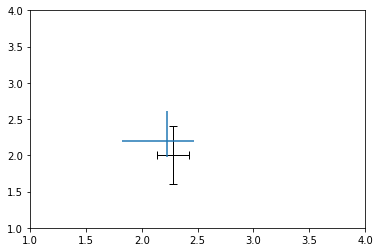

In [28]:
all_eps = EJS_eps + CJS_eps + GT_eps
all_f = EJS_f + CJS_f + GT_f

all_eps_upper = np.quantile(all_eps,0.75)
all_eps_med = np.median(all_eps)
all_eps_lower = np.quantile(all_eps,0.25)
eps_range = [[all_eps_upper-all_eps_med],[all_eps_med-all_eps_lower]]

all_f_upper = np.quantile(all_f,0.75)
all_f_med = np.median(all_f)
all_f_lower = np.quantile(all_f,0.25)
f_range = [[all_f_upper-all_f_med],[all_f_med-all_f_lower]]

print(all_eps_med)
print(all_f_med)
print(eps_range)
print(f_range)

plt.errorbar(2.28, 2.0, yerr = 0.4, xerr = 0.14, color = 'k', linewidth = 1, capsize = 4)
plt.errorbar(all_eps_med, all_f_med, yerr = eps_range, xerr = f_range)
plt.xlim([1,4])
plt.ylim([1,4])
plt.show()

In [29]:
#best (121) 
#rember that best_ (with 0 error) needs to be part of all other series
best_eps_med = 2.22763
best_f_med = 2.1951
best_eps_range = [[0.21250804925321276], [0.4194383380951019]]
best_f_range = [[0.4008295144396854], [0.23625330871071681]]

#fO2 (-1.3,-1.6)
fO2_eps_med = [1.243394,best_eps_med,3.436536417145142]
fO2_f_med = [1.1254991834697867,best_f_med,3.72978018259284]
fO2_eps_range = [[0.09232433112682514,0,0.41626006965778073], [0.08771255789751295,0,0.28081715643504248]] #first_bottom,0,second_bottom first_top,0,second_top
fO2_f_range = [[0.22084744309586157,0,0.7286742475131214], [0.08255883369332961,0,0.4163847745921321]] #first_right,0,second_right first_left,0,second_left
fO2_eps_long = fO2_eps_med #[,best_eps_med,] #-1,-1.05,-1.1,-1.15,-1.22, -1.3, -1.35, -1.4
fO2_f_long = fO2_f_med #[,best_f_med,]
fO2_fit = np.polyfit(fO2_eps_long,fO2_f_long,2)
fO2_range = np.linspace(min(fO2_eps_long),max(fO2_eps_long),num=25)
fO2_vals = np.polyval(fO2_fit,fO2_range)

#P_frac (0.01, 1.0)
P_eps_med = [1.6171257535546597,best_eps_med,2.661681554145812]
P_f_med = [1.5338619250417855,best_f_med,2.6527845921510047]
P_eps_range = [[0.1354943002951361,0,0.27734067002071994], [0.2224417662421978,0,0.581761386706515]]
P_f_range = [[0.11983339447073926,0,0.8324968868365739],[0.08506081105843166,0,0.3162867028581182]]
P_eps_long = P_eps_med
P_f_long = P_f_med
P_fit = np.polyfit(P_eps_long,P_f_long,2)
P_range = np.linspace(min(P_eps_long),max(P_eps_long),num=25)
P_vals = np.polyval(P_fit,P_range)

#k_core (0.01, 1.0)
kcore_eps_med = [2.2948210041635494,best_eps_med,2.1900617981218673]
kcore_f_med = [1.759854722648683,best_f_med,2.2637308585089886]
kcore_eps_range = [[0.16458713734124375,0,0.29653528683983836], [0.1214571497581527,0,0.2470118211188698]]
kcore_f_range = [[0.13291231221023123,0,0.26608006393929156], [0.14487923949184922,0,0.10109841660495045]]
kcore_eps_long = [2.2948210041635494,2.26,best_eps_med,2.1900617981218673]
kcore_f_long = [1.759854722648683,1.9,best_f_med,2.2637308585089886]
kcore_fit = np.polyfit(kcore_eps_long,kcore_f_long,2)
kcore_range = np.linspace(min(kcore_eps_long),max(kcore_eps_long),num=25)
kcore_vals = np.polyval(kcore_fit,kcore_range)

#k_mantle (0.01,1)
kmantle_eps_med = [2.1704344938755504,best_eps_med,2.2219333683226594]
kmantle_f_med = [1.8090542965623964,best_f_med,2.2706032891201584]
kmantle_eps_range = [[0.1232420930663558,0,0.2683267864567185], [0.3920724037542731,0,0.4415404254332065]]
kmantle_f_range = [[0.10406029412081175,0,0.23993399541436666], [0.09337139494707358,0,0.1976908907806978]]
kmantle_eps_long = kmantle_eps_med
kmantle_f_long = kmantle_f_med
kmantle_fit = np.polyfit(kmantle_eps_long,kmantle_f_long,1)
kmantle_range = np.linspace(min(kmantle_eps_long),max(kmantle_eps_long),num=25)
kmantle_vals = np.polyval(kmantle_fit,kmantle_range)

#S (1%, 5%)
S_eps_med = [1.9095874180430352,best_eps_med,2.334317511454298]
S_f_med = [1.7020038369535029,best_f_med,2.49963387675063]
S_eps_range = [[0.17177277531921198,0,0.1790019551945906], [0.3851874911853239,0,0.4031277317473332]]
S_f_range = [[0.3340464987913738,0,0.2080519865296669], [0.08879271689964163,0,0.3074875392275551]]
S_eps_long = [1.9095874180430352,2.0374508993259433,best_eps_med,2.334317511454298]
S_f_long = [1.7020038369535029,1.8732524167774904,best_f_med,2.49963387675063]
S_fit = np.polyfit(S_eps_long,S_f_long,2)
S_range = np.linspace(min(S_eps_long),max(S_eps_long),num=25)
S_vals = np.polyval(S_fit,S_range)

#delta T (500K)
deltaT_eps_med = [3.1296081416898325,best_eps_med,1.4280593652649107]
deltaT_f_med = [3.297023332347376, best_f_med,1.3269720663502653]
deltaT_eps_range = [[0.3315121516100916,0,0.13350517554577856], [0.3315121516100916,0,0.23819682441139634]]
deltaT_f_range = [[0.3315121516100916,0,0.23819682441139634], [0.3315121516100916,0,0.23819682441139634]]
deltaT_eps_long = deltaT_eps_med #500,400,300,200,100,0
deltaT_f_long = deltaT_f_med
deltaT_fit = np.polyfit(deltaT_eps_long,deltaT_f_long,2)
deltaT_range = np.linspace(min(deltaT_eps_long),max(deltaT_eps_long),num=25)
deltaT_vals = np.polyval(deltaT_fit,deltaT_range)


In [30]:
#in order of k_core (1,0.75,0.5,0.25,0)
k_core_steps = [1,0.75,0.5,0.25,0]
#do these again and get rid of the add
km_1_upper = np.add([2.359,2.443,2.5,2.592,2.847],0.3)
km_1_med = np.add([2.009,2.169,2.326,2.476,2.635],0.3)
km_1_lower = np.add([1.556,1.803,2.035,2.291,2.507],0.3)
km_05_upper = np.add([2.367,2.441,2.494,2.582,2.846],0.3)
km_05_med = np.add([2.033,2.171,2.324,2.477,2.634],0.3)
km_05_lower = np.add([1.552,1.813,2.047,2.29,2.507],0.3)
km_005_upper = np.add([2.327,2.39,2.448,2.585,2.845],0.3)
km_005_med = np.add([2.104,2.231,2.317,2.47,2.632],0.3)
km_005_lower = np.add([1.66,1.835,2.079,2.314,2.506],0.3)

fig21 = plt.figure(figsize=(8, 6))
ax21 = fig21.add_subplot(111)
ax21.errorbar(k_core_steps, km_1_med, yerr = (np.subtract(km_1_med,km_1_lower), np.subtract(km_1_upper,km_1_med)), marker = 'o', markersize = 7, capsize = 5, color = 'k')
ax21.errorbar(np.add(k_core_steps,-0.01), km_05_med, yerr = (np.subtract(km_05_med,km_05_lower), np.subtract(km_05_upper,km_05_med)), marker = 'o', markersize = 7, capsize = 5, color = 'dodgerblue', linestyle = '--')
ax21.errorbar(np.add(k_core_steps,0.01), km_005_med, yerr = (np.subtract(km_005_med,km_005_lower), np.subtract(km_005_upper,km_005_med)), marker = 'o', markersize = 7, capsize = 5, color = 'g', linestyle = ':')

ax21.set_ylabel('median \u03B5$_{182W} $',fontsize = 20)
ax21.set_xlabel('k$_{core} $',fontsize = 20)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='k', linestyle = '-', label = 'k$_{mantle} $ = 1'), 
                   Line2D([0], [0], color='dodgerblue', linestyle = '--', label = 'k$_{mantle} $ = 0.5'), 
                   Line2D([0], [0], color='g', linestyle = ':', label = 'k$_{mantle} $ = 0.05')]
ax21.legend(handles=legend_elements, fontsize =15,loc='upper right')
zone1 = patches.Rectangle((-0.1,2.14),1.2,0.28, color = 'lightgrey', alpha = 0.9) #(left,bottom),length,height
ax21.add_patch(zone1)
plt.text(0.05, 0.32, "Martian value", fontsize = 15, transform=ax21.transAxes)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
Mars_eps = 2.28
Mars_eps_dev = 0.14
Mars_f = 2
Mars_f_dev = 0.4

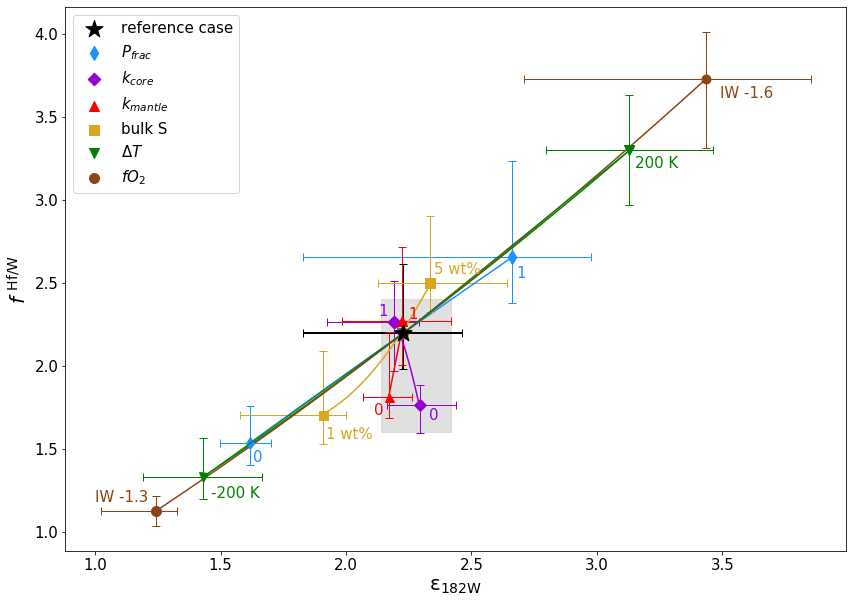

In [32]:
fig23 = plt.figure(figsize=(14, 10))
ax23 = fig23.add_subplot(111)
zone1 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax23.add_patch(zone1)

c1 = 'dodgerblue'
c2 = 'darkviolet'
c3 = 'r'
c4 = 'goldenrod'
c5 = 'g'
c6 = 'saddlebrown'

smallsize = 9
ax23.errorbar(best_eps_med, best_f_med, yerr = best_eps_range, xerr = best_f_range, color = 'k', linewidth = 2, capsize = 4)
ax23.errorbar(P_eps_med, P_f_med, yerr = P_eps_range, xerr = P_f_range, linewidth = 1, linestyle = 'none', capsize = 4, marker = 'd', markersize = smallsize, c = c1)
ax23.plot(P_range,P_vals, c = c1)
ax23.errorbar(kcore_eps_med, kcore_f_med, yerr = kcore_eps_range, xerr = kcore_f_range, linewidth = 1, linestyle = 'none', capsize = 4, marker = 'D', markersize = smallsize, c = c2)
ax23.plot(kcore_range,kcore_vals, c = c2)
ax23.errorbar(kmantle_eps_med, kmantle_f_med, yerr = kmantle_eps_range, xerr = kmantle_f_range, linewidth = 1, linestyle = 'none', capsize = 4, marker = '^', markersize = smallsize, c = c3)
ax23.plot(kmantle_range,kmantle_vals, c = c3)
ax23.errorbar(S_eps_med, S_f_med, yerr = S_eps_range, xerr = S_f_range, linewidth = 1, linestyle = 'none', capsize = 4, marker = 's', markersize = smallsize, c = c4)
ax23.plot(S_range,S_vals, c = c4)
ax23.errorbar(deltaT_eps_med, deltaT_f_med, yerr = deltaT_eps_range, xerr = deltaT_f_range, linewidth = 1, capsize = 4, marker = 'v', markersize = smallsize, c = c5)
ax23.plot(deltaT_range,deltaT_vals, c = c5)
ax23.errorbar(fO2_eps_med, fO2_f_med, yerr = fO2_eps_range, xerr = fO2_f_range, linewidth = 1, linestyle = 'none',capsize = 4, marker = 'o', markersize = smallsize, c = c6)
ax23.plot(fO2_range,fO2_vals, c = c6)

bigsize = 100
ax23.scatter(best_eps_med, best_f_med, marker = '*', c = 'k', s = bigsize*3.3, zorder = 20, label = 'reference case')
ax23.scatter(P_eps_med[-1],P_f_med[-1], marker = 'd', s = bigsize, label = '$P_{frac}$', c = c1)
ax23.scatter(kcore_eps_med[-1],kcore_f_med[-1], marker = 'D', s = bigsize*0.8, label = '$k_{core}$', c = c2, zorder = 18)
ax23.scatter(kmantle_eps_med[-1],kmantle_f_med[-1], marker = '^', s = bigsize, zorder = 19, label = '$k_{mantle}$', c = c3)
ax23.scatter(S_eps_med[-1],S_f_med[-1], marker = 's', s = bigsize, label = 'bulk S', c = c4,zorder = 15)
ax23.scatter(deltaT_eps_med[0],deltaT_f_med[0], marker = 'v', s = bigsize, label = 'Δ$T$', c = c5)
ax23.scatter(fO2_eps_med[0],fO2_f_med[0], marker = 'o', s = bigsize, label = '$fO_{2}$', c = c6)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.text(0.345, 0.185, "Martian values", fontsize = 15, transform=ax23.transAxes)
ax23.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax23.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20) #\ is a space
plt.legend(loc = 'upper left', fontsize = 15)
#ax23.set_ylim([1,4])
#ax23.set_xlim([1,4])

plt.text(3.49,3.61,'IW -1.6', fontsize = 15, c = c6)
plt.text(1.0,1.18,'IW -1.3', fontsize = 15, c = c6)
plt.text(1.92,1.56,'1 wt%', fontsize = 15, c = c4)
plt.text(2.35,2.55,'5 wt%', fontsize = 15, c = c4)
plt.text(3.15,3.19,'200 K', fontsize = 15, c = c5) #T
plt.text(1.46,1.2,'-200 K', fontsize = 15, c = c5) #T
plt.text(2.68,2.53,'1', fontsize = 15, c = c1) #P
plt.text(1.63,1.42,'0', fontsize = 15, c = c1) #P
plt.text(2.33,1.67,'0', fontsize = 15, c = c2) #core
plt.text(2.13,2.3,'1', fontsize = 15, c = c2) #core
plt.text(2.11,1.7,'0', fontsize = 15, c = c3) #mantle
plt.text(2.25,2.28,'1', fontsize = 15, c = c3) #mantle

plt.show()
#fig23.savefig('sensitivity_figure_revision.png')
#fig23.savefig('figure4.pdf')

In [33]:
EJS_cluster_eps = []
EJS_cluster_f = []
#for i in range(len(EJS_eps)):
 #   if i in(EJS_cluster):
  #      EJS_cluster_eps.append(EJS_eps[i])
   #     EJS_cluster_f.append(EJS_f[i])
for i in range(len(EJS_masses)):
    if EJS_masses[i] in(EJS_cluster_mass):
        EJS_cluster_eps.append(EJS_eps[i])
        EJS_cluster_f.append(EJS_f[i])        
        
CJS_cluster_eps = []
CJS_cluster_f = []
#for i in range(len(CJS_eps)):
 #   if i in(CJS_cluster):
  #      CJS_cluster_eps.append(CJS_eps[i])
   #     CJS_cluster_f.append(CJS_f[i])      
for i in range(len(CJS_masses)):
    if CJS_masses[i] in(CJS_cluster_mass):
        CJS_cluster_eps.append(CJS_eps[i])
        CJS_cluster_f.append(CJS_f[i])  
        
GT_cluster_eps = []
GT_cluster_f = []
#for i in range(len(GT_eps)):
 #   if i in(GT_cluster):
  #      GT_cluster_eps.append(GT_eps[i])
   #     GT_cluster_f.append(GT_f[i])
for i in range(len(GT_masses)):
    if GT_masses[i] in(GT_cluster_mass):
        GT_cluster_eps.append(GT_eps[i])
        GT_cluster_f.append(GT_f[i])  

In [34]:
#check for mismatched inputs
for i in EJS_data.columns:
    if i not in ('SIM', ' ID', ' SMA', ' mass', ' mass_in', ' MWSMA', ' t_50', ' t_95', ' f', ' eps'):
        if EJS_data[i][0] != CJS_data[i][0] or CJS_data[i][0] != GT_data[i][0] or EJS_data[i][0] != GT_data[i][0]:
            print('Warning! Parameter discrepancy in' + str(i))

Warning! Parameter discrepancy in S_in
Warning! Parameter discrepancy in S_out


fig4 = plt.figure(figsize=(16, 12))
ax4 = fig4.add_subplot(111)
ax4.scatter(EJS_eps, EJS_f, s = np.multiply(EJS_masses,500), marker='o', facecolors = 'none', color = 'r', label = 'EJS')
ax4.scatter(CJS_eps, CJS_f, s = np.multiply(CJS_masses,500), marker='^', facecolors = 'none', color = 'b', label = 'CJS')
ax4.scatter(GT_eps, GT_f, s = np.multiply(GT_masses,500), marker='s', facecolors = 'none', color = 'g', label = 'GT')
ax4.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
ax4.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,500), color = 'k', label = 'Mars')
ax4.scatter(EJS_cluster_eps, EJS_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 400)
ax4.scatter(CJS_cluster_eps, CJS_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 400)
ax4.scatter(GT_cluster_eps, GT_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 400)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax4.set_xlabel('\u03B5$_{182W} $',fontsize = 20)
ax4.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20)
ax4.set_ylim([0,8])
ax4.set_xlim([0,8])

params = ('k_mant: ' + str(round(EJS_data[' k_mant'][0],2)) + '\nk_core: ' + str(round(EJS_data[' k_core'][0],2)) 
          +  '\nstep loc: ' + str(round(EJS_data[' fO2_step'][0],2)) + '\nfO2_in: ' + str(round(EJS_data[' fO2_in'][0],2)) 
         +  '\nfO2_out: ' + str(round(EJS_data[' fO2_out'][0],2)) +  '\nS_in: ' + str(round(EJS_data[' S_in'][0],2))
         +  '\nS_out: ' + str(round(EJS_data[' S_out'][0],2)) +  '\nt_part: ' + str("{:.2e}".format(EJS_data[' t_part'][0]))
         +  '\nt_early: ' + str("{:.2e}".format(EJS_data[' t_early'][0])) +  '\nP_frac: ' + str(round(EJS_data[' P_frac'][0],2))
         + '\nSMA cutoff: ' + str(orbit_cutoff))
box = dict(boxstyle='round', facecolor='none', alpha=0.3)
ax4.text(0.83, 0.3, params, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=box)

plt.legend(fontsize = 15)
plt.show()

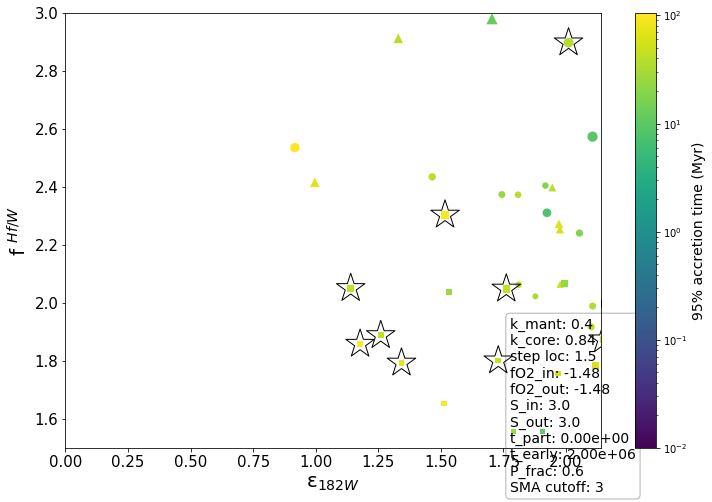

In [35]:
import matplotlib.colors as colors 
fig13 = plt.figure(figsize=(12, 8))
ax13 = fig13.add_subplot(111)

all_t95 = np.concatenate([EJS_t95, CJS_t95, GT_t95], axis=0)
min_t95, max_t95 = all_t95.min(), all_t95.max() #0 to 185 Myr
min_t95 = np.add(min_t95,0.01)

F2 = ax13.scatter(EJS_eps, EJS_f, s = np.multiply(EJS_masses,900), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6), label = 'EJS', vmin=min_t95, vmax=105, norm=colors.LogNorm())
ax13.scatter(CJS_eps, CJS_f, s = np.multiply(CJS_masses,900), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6), label = 'CJS', vmin=0.01, vmax=105,norm=colors.LogNorm())
ax13.scatter(GT_eps, GT_f, s = np.multiply(GT_masses,900), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6), label = 'GT', vmin=0.01, vmax=105,norm=colors.LogNorm())
ax13.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
ax13.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,900), color = 'k', label = 'Mars')
ax13.scatter(EJS_cluster_eps, EJS_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 900)
ax13.scatter(CJS_cluster_eps, CJS_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 900)
ax13.scatter(GT_cluster_eps, GT_cluster_f, marker = '*', color = 'k', facecolors = 'none', s = 900)
#for i, txt in enumerate(GT_masses):
 #   ax13.annotate(round(txt,2), (GT_eps[i], GT_f[i]))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax13.set_xlabel('\u03B5$_{182W} $',fontsize = 20)
ax13.set_ylabel('f $^{Hf/W} $',fontsize = 20)
ax13.set_ylim([1.6,2.4])
ax13.set_ylim([1.5,3])
ax13.set_xlim([2.14,2.42])
ax13.set_xlim([0,2.14])

params = ('k_mant: ' + str(round(EJS_data[' k_mant'][0],2)) + '\nk_core: ' + str(round(EJS_data[' k_core'][0],2)) 
          +  '\nstep loc: ' + str(round(EJS_data[' fO2_step'][0],2)) + '\nfO2_in: ' + str(round(EJS_data[' fO2_in'][0],2)) 
         +  '\nfO2_out: ' + str(round(EJS_data[' fO2_out'][0],2)) +  '\nS_in: ' + str(round(EJS_data[' S_in'][0],2))
         +  '\nS_out: ' + str(round(EJS_data[' S_out'][0],2)) +  '\nt_part: ' + str("{:.2e}".format(EJS_data[' t_part'][0]))
         +  '\nt_early: ' + str("{:.2e}".format(EJS_data[' t_early'][0])) +  '\nP_frac: ' + str(round(EJS_data[' P_frac'][0],2))
         + '\nSMA cutoff: ' + str(orbit_cutoff))
box = dict(boxstyle='round', facecolor='none', alpha=0.3)
ax13.text(0.83, 0.3, params, transform=ax13.transAxes, fontsize=14, verticalalignment='top', bbox=box)

cbar13 = fig13.colorbar(F2,ax=ax13)
cbar13.set_label('95% accretion time (Myr)', fontsize = 14)

#plt.legend(fontsize = 15)
plt.show()

In [36]:
count_matches = 0
count_large_matches = 0
for i in range(0,len(EJS_eps)):
    if EJS_eps[i] <= (Mars_eps + Mars_eps_dev) and EJS_eps[i] >= (Mars_eps - Mars_eps_dev) and EJS_f[i] <= (Mars_f + Mars_f_dev) and EJS_f[i] >= (Mars_f - Mars_f_dev):
        count_matches += 1
        if EJS_masses[i] >= 0.04:
            count_large_matches +=1  
print(count_matches)
print(count_large_matches)

count_matches = 0
count_large_matches = 0
for i in range(0,len(CJS_eps)):
    if CJS_eps[i] <= (Mars_eps + Mars_eps_dev) and CJS_eps[i] >= (Mars_eps - Mars_eps_dev) and CJS_f[i] <= (Mars_f + Mars_f_dev) and CJS_f[i] >= (Mars_f - Mars_f_dev):
        count_matches += 1
        if CJS_masses[i] >= 0.04:
            count_large_matches +=1
print(count_matches)
print(count_large_matches)

count_matches = 0
count_large_matches = 0
for i in range(0,len(GT_eps)):
    if GT_eps[i] <= (Mars_eps + Mars_eps_dev) and GT_eps[i] >= (Mars_eps - Mars_eps_dev) and GT_f[i] <= (Mars_f + Mars_f_dev) and GT_f[i] >= (Mars_f - Mars_f_dev):
        count_matches += 1
        if GT_masses[i] >= 0.04:
            count_large_matches +=1
print(count_matches)
print(count_large_matches)

10
10
9
9
3
2


In [37]:
for i in GT_f:
    print(round(i,3))

1.786
1.874
1.682
2.049
4.138
2.304
2.067
1.757
1.859
4.062
1.556
1.676
1.415
2.051
2.039
1.556
3.308
1.653
1.794
1.801
1.889


In [38]:
CJS_cluster = [9]
EJS_cluster = [17,44]
GT_cluster = [1,3,5,8,13,16,18,19,20]

#best overall match (7)
EJS_eps_panel1 = [2.342,2.412,3.116,1.811,2.339,2.568,2.33,2.44,2.101,1.718,1.465,2.232,2.541,2.432,2.457,2.302,2.679,2.01,2.457,2.273,2.387,2.604,2.187,2.311,2.531,2.497,3.551,
                  2.106,1.878,2.336,1.924,2.433,2.931,2.054,1.808,2.719,2.47,0.917,2.464,2.245,2.56,2.395,2.752,1.918,2.292,2.106,2.482,1.744,2.471,1.006,2.473]
EJS_f_panel1 = [2.023,2.821,2.737,2.063,1.737,2.237,2.492,2.019,1.918,3.286,2.435,2.848,2.102,1.716,2.104,2.359,2.195,2.898,1.749,1.706,2.055,2.023,2.309,2.39,3.573,2.729,3.135,
                1.99,2.023,2.055,2.311,2.993,3.116,2.241,2.373,2.503,2.44,2.536,1.879,1.855,1.831,2.01,2.083,2.405,2.457,2.574,1.748,2.374,2.302,4.088,1.951]
EJS_cluster_eps_panel1 = [EJS_eps_panel1[i] for i in EJS_cluster]
EJS_cluster_f_panel1 = [EJS_f_panel1[i] for i in EJS_cluster]
CJS_eps_panel1 = [1.603,2.331,2.399,2.175,2.401,2.228,2.223,2.739,2.321,2.338,0.996,2.494,1.33,1.945,2.308,2.525,2.68,2.183,1.428,1.976,1.976,2.616,1.62,2.228,2.892,1.704,0.87,1.972,1.316]
CJS_f_panel1 = [3.082,1.883,2.052,2.063,2.596,2.072,2.032,3.585,1.959,2.105,2.417,1.869,2.913,2.399,2.659,2.199,3.726,2.164,3.304,2.064,2.254,2.215,3.83,2.058,3.019,2.981,3.447,2.273,3.242]
CJS_cluster_eps_panel1 = [CJS_eps_panel1[i] for i in CJS_cluster]
CJS_cluster_f_panel1 = [CJS_f_panel1[i] for i in CJS_cluster]
GT_eps_panel1 = [2.118,2.148,2.333,1.761,1.814,1.517,1.995,1.968,1.177,1.371,1.907,2.252,2.013,1.14,1.531,1.789,0.76,1.513,1.343,1.729,1.26]
GT_f_panel1 = [1.786,1.874,1.682,2.049,4.138,2.304,2.067,1.757,1.859,4.062,1.556,1.676,1.415,2.051,2.039,1.556,3.308,1.653,1.794,1.801,1.889]
GT_cluster_eps_panel1 = [GT_eps_panel1[i] for i in GT_cluster]
GT_cluster_f_panel1 = [GT_f_panel1[i] for i in GT_cluster]

#best S-poor match (27)
EJS_eps_panel2 = [2.336,2.299,2.953,1.803,2.413,2.489,2.266,2.359,2.141,1.645,1.435,2.163,2.428,2.492,2.415,2.222,2.538,1.92,2.493,2.347,2.362,2.566,2.143,2.284,2.444,2.364,3.405,2.117,
                  1.828,2.317,1.854,2.226,2.762,1.997,1.705,2.658,2.405,0.902,2.448,2.277,2.605,2.405,2.688,1.779,2.161,2.067,2.544,1.665,2.46,0.971,2.421]
EJS_f_panel2 = [1.968,2.572,2.558,1.951,1.775,2.118,2.389,1.919,1.891,3.082,2.204,2.72,1.977,1.754,2.022,2.19,2.05,2.626,1.768,1.744,1.985,1.968,2.166,2.307,3.275,2.497,2.981,1.931,
                1.893,1.985,2.2,2.636,2.843,2.087,2.129,2.392,2.34,2.378,1.847,1.842,1.855,1.973,2.017,2.142,2.229,2.466,1.787,2.145,2.285,3.654,1.886]
EJS_cluster_eps_panel2 = [EJS_eps_panel2[i] for i in EJS_cluster]
EJS_cluster_f_panel2 = [EJS_f_panel2[i] for i in EJS_cluster]
CJS_eps_panel2 = [1.505,2.412,2.343,2.178,2.335,2.228,2.259,2.583,2.373,2.256,0.99,2.554,1.267,1.911,2.297,2.461,2.496,2.151,1.368,1.979,2.0,2.468,1.57,2.197,2.74,1.618,0.852,2.019,1.29]
CJS_f_panel2 = [2.809,1.91,1.961,1.994,2.435,2.004,1.997,3.214,1.954,1.981,2.316,1.895,2.611,2.221,2.554,2.092,3.288,2.053,3.069,1.976,2.153,2.054,3.499,1.968,2.772,2.774,3.239,2.19,2.97]
CJS_cluster_eps_panel2 = [CJS_eps_panel2[i] for i in CJS_cluster]
CJS_cluster_f_panel2 = [CJS_f_panel2[i] for i in CJS_cluster]
GT_eps_panel2 = [2.199,2.2,2.431,1.802,1.685,1.533,2.011,1.962,1.209,1.312,1.964,2.248,2.113,1.117,1.499,1.855,0.726,1.566,1.377,1.735,1.281]
GT_f_panel2 = [1.813,1.873,1.742,1.991,3.568,2.165,2.003,1.719,1.789,3.503,1.579,1.662,1.481,1.978,1.913,1.579,3.09,1.647,1.743,1.747,1.808]
GT_cluster_eps_panel2 = [GT_eps_panel2[i] for i in GT_cluster]
GT_cluster_f_panel2 = [GT_f_panel2[i] for i in GT_cluster]

#best f cluster (29)
EJS_eps_panel3 = [2.257,2.179,2.817,1.728,2.273,2.472,2.08,2.429,2.013,1.438,1.33,1.914,2.526,2.388,2.375,2.191,2.652,1.79,2.426,2.22,2.308,2.539,2.063,2.076,2.147,2.279,3.042,2.024,
                  1.835,2.254,1.743,2.242,2.601,1.962,1.717,2.457,2.24,0.769,2.436,2.183,2.481,2.296,2.681,1.84,2.196,1.864,2.421,1.641,2.198,0.794,2.455]
EJS_f_panel3 = [1.995,2.634,2.5,2.089,1.701,2.201,2.262,2.047,1.896,2.811,2.445,2.491,2.128,1.689,2.078,2.329,2.207,2.704,1.732,1.683,2.033,1.995,2.271,2.192,3.072,2.561,2.702,1.98,
                2.085,2.033,2.164,2.865,2.812,2.245,2.423,2.298,2.248,2.332,1.878,1.84,1.781,1.967,2.046,2.459,2.453,2.342,1.708,2.408,2.067,3.466,1.964]
EJS_cluster_eps_panel3 = [EJS_eps_panel3[i] for i in EJS_cluster]
EJS_cluster_f_panel3 = [EJS_f_panel3[i] for i in EJS_cluster]
CJS_eps_panel3 = [1.372,2.206,2.352,2.075,2.16,2.126,2.101,2.375,2.2,2.299,0.832,2.386,1.149,1.808,2.019,2.429,2.345,2.086,1.18,1.882,1.822,2.591,1.328,2.16,2.58,1.437,0.666,1.797,1.095]
CJS_f_panel3 = [2.772,1.812,2.056,2.036,2.4,2.04,1.977,3.161,1.896,2.128,2.211,1.803,2.732,2.362,2.383,2.162,3.325,2.148,2.857,2.061,2.188,2.236,3.255,2.058,2.741,2.624,2.898,2.18,2.877]
CJS_cluster_eps_panel3 = [CJS_eps_panel3[i] for i in CJS_cluster]
CJS_cluster_f_panel3 = [CJS_f_panel3[i] for i in CJS_cluster]
GT_eps_panel3 = [2.029,2.056,2.262,1.64,1.558,1.371,1.883,1.963,1.087,1.153,1.92,2.292,2.052,1.017,1.455,1.788,0.576,1.471,1.271,1.694,1.174]
GT_f_panel3 = [1.748,1.837,1.64,2.012,3.716,2.259,2.03,1.799,1.902,3.662,1.595,1.719,1.446,1.978,2.079,1.595,2.805,1.693,1.84,1.848,1.934]
GT_cluster_eps_panel3 = [GT_eps_panel3[i] for i in GT_cluster]
GT_cluster_f_panel3 = [GT_f_panel3[i] for i in GT_cluster]

#panel 4 (30)
EJS_eps_panel4 = [2.257,2.132,2.747,1.728,2.273,2.472,2.428,2.429,2.013,2.261,1.33,2.36,2.526,2.388,2.375,2.191,2.652,1.911,2.426,2.22,2.308,2.539,2.063,2.274,2.13,2.313,2.537,2.024,
                  1.835,2.254,2.311,2.26,2.346,1.962,1.717,2.319,2.463,1.606,2.436,2.183,2.481,2.296,2.681,1.84,2.196,2.243,2.421,1.641,2.508,1.431,2.455]
EJS_f_panel4 = [1.995,2.481,2.336,2.089,1.701,2.201,2.163,2.047,1.896,2.144,2.445,1.993,2.128,1.689,2.078,2.329,2.207,2.603,1.732,1.683,2.033,1.995,2.271,2.051,2.608,2.487,1.964,1.98,
                2.085,2.033,2.015,2.852,2.415,2.245,2.423,2.044,2.064,2.379,1.878,1.84,1.781,1.967,2.046,2.459,2.453,2.013,1.708,2.408,1.826,3.189,1.964]
EJS_cluster_eps_panel4 = [EJS_eps_panel4[i] for i in EJS_cluster]
EJS_cluster_f_panel4 = [EJS_f_panel4[i] for i in EJS_cluster]
CJS_eps_panel4 = [2.034,2.206,2.352,2.075,2.161,2.126,2.101,2.228,2.2,2.299,2.03,2.386,1.526,1.808,2.141,2.429,2.206,2.086,2.376,1.882,1.822,2.591,1.951,2.16,2.499,2.281,2.074,1.797,1.745]
CJS_f_panel4 = [2.565,1.812,2.056,2.036,2.24,2.04,1.977,2.815,1.896,2.128,2.109,1.803,2.774,2.362,2.086,2.162,2.998,2.148,2.405,2.061,2.188,2.236,2.617,2.058,2.54,2.467,2.461,2.18,2.737]
CJS_cluster_eps_panel4 = [CJS_eps_panel4[i] for i in CJS_cluster]
CJS_cluster_f_panel4 = [CJS_f_panel4[i] for i in CJS_cluster]
GT_eps_panel4 = [2.029,2.056,2.262,1.64,1.558,1.371,1.883,1.963,1.087,1.152,1.92,2.292,2.052,2.048,1.455,1.788,2.035,1.471,1.271,1.694,1.174]
GT_f_panel4 = [1.748,1.837,1.64,2.012,3.716,2.259,2.03,1.799,1.902,3.649,1.595,1.719,1.446,1.747,2.079,1.595,2.634,1.693,1.84,1.848,1.934]
GT_cluster_eps_panel4 = [GT_eps_panel4[i] for i in GT_cluster]
GT_cluster_f_panel4 = [GT_f_panel4[i] for i in GT_cluster]


#panel 4 can uses the variables from previous EJS_114, CJS_114, GT_114

In [39]:
for i in GT_f_panel1:
    print(i)

1.786
1.874
1.682
2.049
4.138
2.304
2.067
1.757
1.859
4.062
1.556
1.676
1.415
2.051
2.039
1.556
3.308
1.653
1.794
1.801
1.889


In [40]:
a = np.divide(CJS_t95,1e6)
for b in a:
    if b <= 0:
        print(b)

0.0
0.0


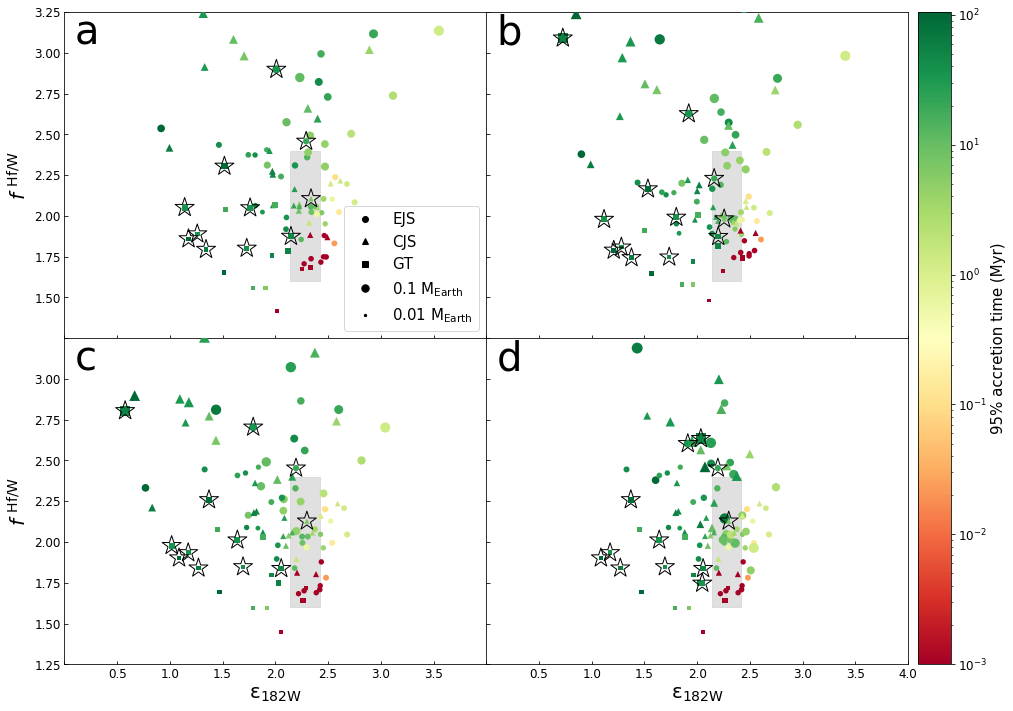

In [41]:
import matplotlib.colors as colors
EJS_t95 = np.add(EJS_t95,0.001) #can't use a log colorbar if some values are 0
CJS_t95 = np.add(CJS_t95,0.001)
GT_t95 = np.add(GT_t95,0.001)


#fig19 = plt.figure(figsize=(16, 16))
fig19, ((ax19_1,ax19_2),(ax19_3,ax19_4)) = plt.subplots(2,2, figsize = (18,12))
axlist = [ax19_1, ax19_2, ax19_3, ax19_4]

all_t95 = np.concatenate([EJS_t95, CJS_t95, GT_t95], axis=0)
min_t95, max_t95 = all_t95.min(), all_t95.max() #0 to 185 Myr
colormap = plt.cm.get_cmap('RdYlGn')

#ax19_1 = fig19.add_subplot(221)
zone1 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax19_1.add_patch(zone1)
F2 = ax19_1.scatter(EJS_eps_panel1, EJS_f_panel1, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6), cmap = colormap, norm=colors.LogNorm(),
            label = 'EJS', vmin=min_t95, vmax=105, zorder = 200)
ax19_1.scatter(CJS_eps_panel1, CJS_f_panel1, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(), 
               label = 'CJS', vmin=0.01, vmax=105, zorder = 200)
ax19_1.scatter(GT_eps_panel1, GT_f_panel1, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, norm=colors.LogNorm(), 
               label = 'GT', vmin=0.01, vmax=105, zorder = 200)
#ax19_1.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax19_1.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), marker = 'o', color = 'k', label = 'Mars', zorder = 300)
ax19_1.scatter(EJS_cluster_eps_panel1, EJS_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_1.scatter(CJS_cluster_eps_panel1, CJS_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_1.scatter(GT_cluster_eps_panel1, GT_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_1.tick_params(axis='both', which='major', labelsize=12)
ax19_1.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20)
ax19_1.set_ylim([1.25,3.25])
ax19_1.set_xlim([0,4])
ax19_1.tick_params(which = 'both', direction='in')
ax19_1.text(0.1,3.05,'a',fontsize = 40)
yticks_1 = ax19_1.yaxis.get_major_ticks()
yticks_1[0].label1.set_visible(False) #this prevents overlapping tick labels

#ax19_2 = fig19.add_subplot(222)
ax19_2.scatter(EJS_eps_panel2, EJS_f_panel2, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'EJS', vmin=min_t95, vmax=105, zorder = 200)
ax19_2.scatter(CJS_eps_panel2, CJS_f_panel2, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'CJS', vmin=0.01, vmax=105, zorder = 200)
ax19_2.scatter(GT_eps_panel2, GT_f_panel2, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'GT', vmin=0.01, vmax=105, zorder = 200)
zone2 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax19_2.add_patch(zone2)
#ax19_2.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax19_2.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
ax19_2.scatter(EJS_cluster_eps_panel2, EJS_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_2.scatter(CJS_cluster_eps_panel2, CJS_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_2.scatter(GT_cluster_eps_panel2, GT_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ax19_2.set_ylim([1.25,3.25])
ax19_2.set_xlim([0,4])
ax19_2.tick_params(which = 'both', direction='in')
ax19_2.text(0.1,3.05,'b',fontsize = 40)

#ax19_3 = fig19.add_subplot(223)
ax19_3.scatter(EJS_eps_panel3, EJS_f_panel3, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'EJS', vmin=min_t95, vmax=105, zorder = 200)
ax19_3.scatter(CJS_eps_panel3, CJS_f_panel3, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'CJS', vmin=0.01, vmax=105, zorder = 200)
ax19_3.scatter(GT_eps_panel3, GT_f_panel3, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'GT', vmin=0.01, vmax=105, zorder = 200)
zone3 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax19_3.add_patch(zone3)
#ax19_3.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax19_3.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
ax19_3.scatter(EJS_cluster_eps_panel3, EJS_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_3.scatter(CJS_cluster_eps_panel3, CJS_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_3.scatter(GT_cluster_eps_panel3, GT_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
#ax19_3.set_xticks(fontsize=15)
ax19_3.tick_params(axis='both', which='major', labelsize=12)
#plt.yticks(fontsize=15)
ax19_3.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax19_3.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20)
ax19_3.set_ylim([1.25,3.25])
ax19_3.set_xlim([0,4])
ax19_3.tick_params(which = 'both', direction='in')
ax19_3.text(0.1,3.05,'c',fontsize = 40)
xticks_3 = ax19_3.xaxis.get_major_ticks()
xticks_3[0].label1.set_visible(False) #this prevents overlapping tick labels
xticks_3[-1].label1.set_visible(False)
yticks_3 = ax19_3.yaxis.get_major_ticks()
yticks_3[-1].label1.set_visible(False)

#ax19_4 = fig19.add_subplot(224)
ax19_4.scatter(EJS_eps_panel4, EJS_f_panel4, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'EJS', vmin=min_t95, vmax=105, zorder = 200)
ax19_4.scatter(CJS_eps_panel4, CJS_f_panel4, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'CJS', vmin=0.01, vmax=105, zorder = 200)
ax19_4.scatter(GT_eps_panel4, GT_f_panel4, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, norm=colors.LogNorm(),
               label = 'GT', vmin=0.01, vmax=105, zorder = 200)
zone4 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax19_4.add_patch(zone4)
#ax19_4.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax19_4.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
ax19_4.scatter(EJS_cluster_eps_panel4, EJS_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_4.scatter(CJS_cluster_eps_panel4, CJS_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_4.scatter(GT_cluster_eps_panel4, GT_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder = 200)
ax19_4.tick_params(axis='both', which='major', labelsize=12)
ax19_4.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax19_4.set_ylim([1.25,3.25])
ax19_4.set_xlim([0,4])
ax19_4.tick_params(which = 'both', direction='in')
ax19_4.text(0.1,3.05,'d',fontsize = 40)
xticks_4 = ax19_4.xaxis.get_major_ticks()
xticks_4[0].label1.set_visible(False) #this prevents overlapping tick labels

#ax19_1.legend(loc = 'lower right', fontsize = 15)
legend_elements = [Line2D([0], [0], label='EJS',color='k', linestyle='', marker = 'o'),Line2D([0], [0], color = 'k', label='CJS',linestyle='', marker = '^'),
                   Line2D([0], [0], label='GT', color = 'k', linestyle='', marker = 's'), 
                   #Line2D([0], [0], label='Mars',color = 'lightgrey', alpha = 0.7, linewidth=7),
                Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 7.4, label = '0.1 M$_\mathrm{Earth}$'),
                  Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 2.31, label = '0.01 M$_\mathrm{Earth}$')]
ax19_1.legend(handles = legend_elements, loc='lower right', fontsize = 15)

plt.setp(ax19_2.get_yticklabels(), visible=False)
plt.setp(ax19_4.get_yticklabels(), visible=False)
plt.setp(ax19_1.get_xticklabels(), visible=False)
plt.setp(ax19_2.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)

cbar19 = fig19.colorbar(F2,ax=axlist, pad = 0.01) #why is this so obtuse
cbar19.set_label('95% accretion time (Myr)', fontsize = 15)
cbar19.ax.tick_params(labelsize=12)

plt.show()
#fig19.savefig('matches_figure_revision.png')
#fig19.savefig('figure5.pdf')

In [42]:
#duplicate cell
EJS_timesteps = pd.read_csv('EJS_timesteps.csv')
EJS_growthsteps = pd.read_csv('EJS_growthsteps.csv')
CJS_timesteps = pd.read_csv('CJS_timesteps.csv')
CJS_growthsteps = pd.read_csv('CJS_growthsteps.csv')
GT_timesteps = pd.read_csv('GT_timesteps.csv')
GT_growthsteps = pd.read_csv('GT_growthsteps.csv')

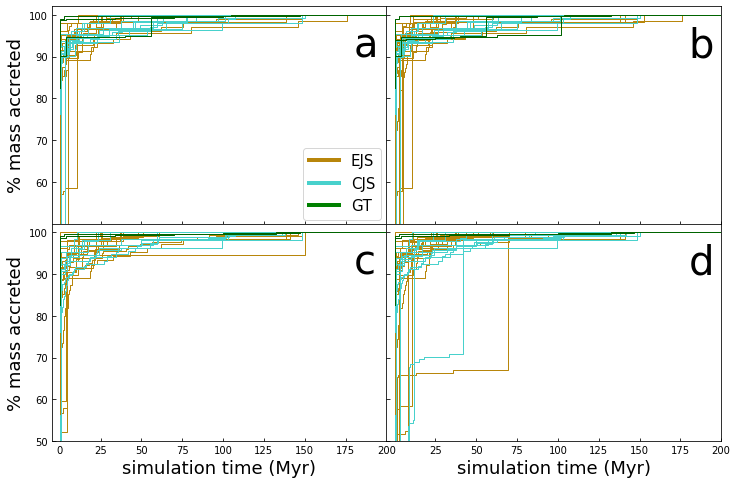

In [43]:
fig199, ((ax199_1,ax199_2),(ax199_3,ax199_4)) = plt.subplots(2,2, figsize = (12,8))
axlist = [ax199_1, ax199_2, ax199_3, ax199_4]

eps_upper = 2.42
eps_lower = 2.14

for i in range(0,len(EJS_eps_panel1)):
    if EJS_eps_panel1[i] <= eps_upper and EJS_eps_panel1[i] >= eps_lower:
        ax199_1.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 1, where = 'post')
        #print(EJS_growthsteps.iloc[:,i])
for i in range(0,len(CJS_eps_panel1)):
    if CJS_eps_panel1[i] <= eps_upper and CJS_eps_panel1[i] >= eps_lower:
        ax199_1.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 1, where = 'post')
        #print(CJS_growthsteps.iloc[:,i])
for i in range(0,len(GT_eps_panel1)):
    if GT_eps_panel1[i] <= eps_upper and GT_eps_panel1[i] >= eps_lower:
        #GT_time = GT_timesteps.iloc[:,i].tolist()#.append(200)
        #GT_growth = GT_growthsteps.iloc[:,i].tolist()#.append(100)
        ax199_1.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 1, where = 'post')
        #print(GT_growthsteps.iloc[:,i])
ax199_1.plot([105,200],[100,100],color = 'darkgreen',linewidth = 1) #jank
ax199_1.set_xlim([-5, 200])
ax199_1.set_ylim([50, 102])
ax199_1.tick_params(which = 'both', direction='in')
ax199_1.set_ylabel('% mass accreted',fontsize = 18)
ax199_1.text(180,90,'a',fontsize = 40)
yticks_1 = ax199_1.yaxis.get_major_ticks()
yticks_1[0].label1.set_visible(False)

for i in range(0,len(EJS_eps_panel2)):
    if EJS_eps_panel2[i] <= eps_upper and EJS_eps_panel2[i] >= eps_lower:
        ax199_2.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 1, where = 'post')
for i in range(0,len(CJS_eps_panel2)):
    if CJS_eps_panel2[i] <= eps_upper and CJS_eps_panel2[i] >= eps_lower:
        ax199_2.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 1, where = 'post')
for i in range(0,len(GT_eps_panel2)):
    if GT_eps_panel2[i] <= eps_upper and GT_eps_panel2[i] >= eps_lower:
        #GT_time = GT_timesteps.iloc[:,i].tolist()#.append(200)
        #GT_growth = GT_growthsteps.iloc[:,i].tolist()#.append(100)
        ax199_2.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 1, where = 'post')
ax199_2.plot([105,200],[100,100],color = 'darkgreen',linewidth = 1) #jank
ax199_2.set_xlim([-5, 200])
ax199_2.set_ylim([50, 102])
ax199_2.tick_params(which = 'both', direction='in')
ax199_2.text(180,90,'b',fontsize = 40)

for i in range(0,len(EJS_eps_panel3)):
    if EJS_eps_panel3[i] <= eps_upper and EJS_eps_panel3[i] >= eps_lower:
        ax199_3.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 1, where = 'post')
for i in range(0,len(CJS_eps_panel3)):
    if CJS_eps_panel3[i] <= eps_upper and CJS_eps_panel3[i] >= eps_lower:
        ax199_3.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 1, where = 'post')
for i in range(0,len(GT_eps_panel3)):
    if GT_eps_panel3[i] <= eps_upper and GT_eps_panel3[i] >= eps_lower:
        #GT_time = GT_timesteps.iloc[:,i].tolist()#.append(200)
        #GT_growth = GT_growthsteps.iloc[:,i].tolist()#.append(100)
        ax199_3.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 1, where = 'post')
ax199_3.plot([150,200],[100,100],color = 'darkgreen',linewidth = 1) #jank
ax199_3.set_xlim([-5, 200])
ax199_3.set_ylim([50, 102])
ax199_3.tick_params(which = 'both', direction='in')
ax199_3.set_xlabel('simulation time (Myr)',fontsize = 18)
ax199_3.set_ylabel('% mass accreted',fontsize = 18)
ax199_3.text(180,90,'c',fontsize = 40)


for i in range(0,len(EJS_eps_panel4)):
    if EJS_eps_panel4[i] <= eps_upper and EJS_eps_panel4[i] >= eps_lower:
        ax199_4.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 1, where = 'post')
for i in range(0,len(CJS_eps_panel4)):
    if CJS_eps_panel4[i] <= eps_upper and CJS_eps_panel4[i] >= eps_lower:
        ax199_4.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 1, where = 'post')
for i in range(0,len(GT_eps_panel4)):
    if GT_eps_panel4[i] <= eps_upper and GT_eps_panel4[i] >= eps_lower:
        #GT_time = GT_timesteps.iloc[:,i].tolist()#.append(200)
        #GT_growth = GT_growthsteps.iloc[:,i].tolist()#.append(100)
        ax199_4.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 1, where = 'post')
ax199_4.plot([150,200],[100,100],color = 'darkgreen',linewidth = 1) #jank
ax199_4.set_xlim([-5, 200])
ax199_4.set_ylim([50, 102])
ax199_4.tick_params(which = 'both', direction='in')
ax199_4.set_xlabel('simulation time (Myr)',fontsize = 18)
ax199_4.text(180,90,'d',fontsize = 40)
xticks_4 = ax199_4.xaxis.get_major_ticks()
xticks_4[1].label1.set_visible(False)

legend_elements = [Line2D([0], [0], label='EJS',color='darkgoldenrod', linewidth=4),Line2D([0], [0], label='CJS',color='mediumturquoise', linewidth=4),
                   Line2D([0], [0], label='GT',color='g', linewidth=4),]
ax199_1.legend(handles = legend_elements, loc=[0.75,0.02], fontsize = 15)

plt.setp(ax199_2.get_yticklabels(), visible=False)
plt.setp(ax199_4.get_yticklabels(), visible=False)
plt.setp(ax199_1.get_xticklabels(), visible=False)
plt.setp(ax199_2.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)

#fig199.savefig('growthcurves_figure_revision.png')
#fig199.savefig('figure6.pdf')

In [44]:
#34
EJS_eps_panel1 = [1.499,1.781,2.337,1.143,1.436,1.706,1.616,1.58,1.309,0.907,0.958,1.551,1.67,1.497,1.599,1.543,1.786,1.443,1.523,1.386,1.539,1.684,1.446,1.62,2.004,1.818,2.983,1.329,
                  1.194,1.503,1.249,1.796,2.337,1.346,1.219,2.002,1.732,0.43,1.558,1.398,1.608,1.531,1.801,1.311,1.567,1.42,1.537,1.161,1.712,0.638,1.583]
EJS_f_panel1 = [1.321,2.143,2.096,1.365,1.076,1.511,1.875,1.326,1.231,2.886,1.702,2.364,1.4,1.059,1.393,1.622,1.481,2.205,1.088,1.051,1.351,1.321,1.575,1.793,3.049,2.046,2.727,1.295,
                1.34,1.351,1.677,2.257,2.531,1.521,1.66,1.894,1.847,1.892,1.2,1.178,1.154,1.309,1.373,1.696,1.719,1.987,1.085,1.653,1.751,3.401,1.265]
EJS_cluster_eps_panel1 = [EJS_eps_panel1[i] for i in EJS_cluster]
EJS_cluster_f_panel1 = [EJS_f_panel1[i] for i in EJS_cluster]
CJS_eps_panel1 = [1.026,1.456,1.553,1.39,1.74,1.428,1.412,2.198,1.466,1.526,0.435,1.568,0.859,1.29,1.659,1.666,2.137,1.419,0.734,1.254,1.276,1.75,1.131,1.433,2.193,1.178,0.326,1.27,0.782]
CJS_f_panel1 = [2.422,1.197,1.352,1.357,1.952,1.365,1.327,2.963,1.263,1.402,1.803,1.186,2.203,1.658,2.073,1.476,3.058,1.448,2.823,1.362,1.522,1.501,3.346,1.356,2.352,2.398,3.024,1.536,2.582]
CJS_cluster_eps_panel1 = [CJS_eps_panel1[i] for i in CJS_cluster]
CJS_cluster_f_panel1 = [CJS_f_panel1[i] for i in CJS_cluster]
GT_eps_panel1 = [1.287,1.332,1.421,1.075,1.364,0.938,1.26,1.222,0.636,0.988,1.116,1.421,1.156,0.566,0.95,1.027,0.275,0.841,0.749,1.051,0.708]
GT_f_panel1 = [1.126,1.213,1.027,1.383,3.409,1.628,1.397,1.157,1.255,3.342,0.952,1.071,0.814,1.482,1.425,0.952,2.731,1.054,1.184,1.189,1.277]
GT_cluster_eps_panel1 = [GT_eps_panel1[i] for i in GT_cluster]
GT_cluster_f_panel1 = [GT_f_panel1[i] for i in GT_cluster]

#35
EJS_eps_panel2 = [2.557,2.555,2.64,2.457,2.579,2.572,2.513,2.535,2.532,2.388,2.385,2.501,2.543,2.586,2.563,2.528,2.557,2.472,2.58,2.565,2.557,2.586,2.525,2.547,2.576,2.552,2.701,2.521,
                  2.445,2.551,2.432,2.508,2.608,2.487,2.42,2.631,2.548,2.192,2.564,2.548,2.609,2.575,2.601,2.424,2.503,2.491,2.598,2.416,2.57,2.162,2.551]
EJS_f_panel2 = [1.81,1.887,1.904,1.794,1.795,1.823,1.904,1.791,1.801,1.966,1.817,1.948,1.797,1.79,1.813,1.825,1.806,1.891,1.788,1.788,1.809,1.81,1.826,1.89,1.963,1.886,1.963,1.801,1.783,
                1.809,1.879,1.881,1.917,1.81,1.81,1.897,1.884,1.895,1.791,1.795,1.808,1.816,1.816,1.813,1.821,1.903,1.798,1.81,1.906,2.004,1.791]
EJS_cluster_eps_panel2 = [EJS_eps_panel2[i] for i in EJS_cluster]
EJS_cluster_f_panel2 = [EJS_f_panel2[i] for i in EJS_cluster]
CJS_eps_panel2 = [2.337,2.594,2.541,2.534,2.572,2.542,2.56,2.585,2.581,2.519,2.234,2.608,2.298,2.487,2.569,2.568,2.555,2.522,2.325,2.495,2.523,2.543,2.373,2.523,2.616,2.338,2.192,2.54,2.326]
CJS_f_panel2 = [1.929,1.82,1.799,1.81,1.892,1.813,1.82,1.94,1.82,1.796,1.893,1.817,1.891,1.826,1.919,1.82,1.927,1.811,1.949,1.802,1.833,1.803,1.972,1.8,1.914,1.944,1.983,1.845,1.931]
CJS_cluster_eps_panel2 = [CJS_eps_panel2[i] for i in CJS_cluster]
CJS_cluster_f_panel2 = [CJS_f_panel2[i] for i in CJS_cluster]
GT_eps_panel2 = [2.547,2.542,2.586,2.474,2.402,2.423,2.505,2.468,2.319,2.364,2.472,2.518,2.505,2.259,2.373,2.453,2.13,2.395,2.356,2.427,2.333]
GT_f_panel2 = [1.798,1.803,1.793,1.811,1.901,1.823,1.812,1.766,1.775,1.907,1.747,1.758,1.733,1.84,1.79,1.747,1.984,1.756,1.768,1.769,1.777]
GT_cluster_eps_panel2 = [GT_eps_panel2[i] for i in GT_cluster]
GT_cluster_f_panel2 = [GT_f_panel2[i] for i in GT_cluster]

#36
EJS_eps_panel3 = [2.624,2.569,3.343,2.013,2.694,2.822,2.539,2.715,2.38,1.819,1.575,2.405,2.804,2.801,2.73,2.505,2.936,2.133,2.818,2.624,2.664,2.913,2.394,2.542,2.673,2.667,3.793,2.366,
                  2.079,2.608,2.097,2.533,3.097,2.249,1.932,2.968,2.698,0.976,2.787,2.553,2.921,2.691,3.062,2.038,2.46,2.294,2.852,1.873,2.736,1.043,2.773]
EJS_f_panel3 = [2.258,2.986,2.93,2.283,1.996,2.452,2.71,2.243,2.161,3.475,2.61,3.062,2.318,1.975,2.332,2.557,2.403,3.055,2.004,1.966,2.287,2.258,2.515,2.616,3.728,2.902,3.343,2.225,
                2.239,2.287,2.526,3.111,3.274,2.446,2.544,2.72,2.659,2.731,2.122,2.102,2.087,2.251,2.315,2.567,2.633,2.792,2.007,2.551,2.548,4.189,2.185]
EJS_cluster_eps_panel3 = [EJS_eps_panel3[i] for i in EJS_cluster]
EJS_cluster_f_panel3 = [EJS_f_panel3[i] for i in EJS_cluster]
CJS_eps_panel3 = [1.678,2.659,2.669,2.43,2.601,2.488,2.5,2.858,2.627,2.582,1.08,2.841,1.395,2.115,2.519,2.784,2.768,2.413,1.503,2.204,2.187,2.858,1.703,2.481,3.07,1.807,0.916,2.19,1.395]
CJS_f_panel3 = [3.233,2.14,2.277,2.294,2.795,2.303,2.272,3.704,2.207,2.321,2.634,2.125,3.053,2.592,2.879,2.417,3.814,2.382,3.477,2.29,2.474,2.417,3.975,2.283,3.186,3.162,3.634,2.497,3.399]
CJS_cluster_eps_panel3 = [CJS_eps_panel3[i] for i in CJS_cluster]
CJS_cluster_f_panel3 = [CJS_f_panel3[i] for i in CJS_cluster]
GT_eps_panel3 = [2.749,2.761,3.075,2.2,1.961,1.824,2.499,2.552,1.469,1.452,2.542,2.975,2.741,1.398,1.89,2.379,0.855,1.969,1.701,2.215,1.57]
GT_f_panel3 = [2.338,2.434,2.222,2.622,4.696,2.889,2.642,2.308,2.417,4.618,2.088,2.22,1.928,2.614,2.604,2.088,3.927,2.194,2.348,2.357,2.448]
GT_cluster_eps_panel3 = [GT_eps_panel3[i] for i in GT_cluster]
GT_cluster_f_panel3 = [GT_f_panel3[i] for i in GT_cluster]

#37
EJS_eps_panel4 = [2.197,1.981,2.511,1.72,2.265,2.333,1.925,2.27,2.02,1.342,1.341,1.755,2.335,2.346,2.272,2.083,2.431,1.663,2.358,2.215,2.224,2.414,2.002,1.954,1.958,2.059,2.681,2.003,
                  1.769,2.182,1.617,2.002,2.303,1.891,1.617,2.242,2.087,0.804,2.329,2.154,2.426,2.247,2.522,1.699,2.04,1.783,2.381,1.576,2.07,0.79,2.317]
EJS_f_panel4 = [2.034,2.777,2.632,2.15,1.715,2.259,2.392,2.104,1.928,3.004,2.552,2.646,2.194,1.703,2.126,2.405,2.279,2.852,1.75,1.697,2.077,2.034,2.337,2.3,3.244,2.703,2.852,2.021,2.159,
                2.077,2.3,3.038,2.972,2.319,2.548,2.405,2.357,2.502,1.911,1.867,1.798,2.0,2.088,2.597,2.555,2.446,1.722,2.52,2.169,3.678,2.009]
EJS_cluster_eps_panel4 = [EJS_eps_panel4[i] for i in EJS_cluster]
EJS_cluster_f_panel4 = [EJS_f_panel4[i] for i in EJS_cluster]
CJS_eps_panel4 = [1.275,2.232,2.23,2.047,1.983,2.091,2.104,2.121,2.204,2.161,0.906,2.365,1.111,1.78,1.919,2.306,2.094,2.026,1.163,1.873,1.856,2.37,1.305,2.085,2.32,1.338,0.726,1.863,1.124]
CJS_f_panel4 = [2.962,1.83,2.108,2.079,2.526,2.083,2.01,3.341,1.921,2.193,2.347,1.821,2.91,2.441,2.49,2.216,3.505,2.205,3.043,2.111,2.239,2.315,3.42,2.109,2.874,2.815,3.103,2.225,3.029]
CJS_cluster_eps_panel4 = [CJS_eps_panel4[i] for i in CJS_cluster]
CJS_cluster_f_panel4 = [CJS_f_panel4[i] for i in CJS_cluster]
GT_eps_panel4 = [2.069,2.068,2.274,1.703,1.452,1.438,1.89,1.899,1.188,1.117,1.918,2.174,2.059,1.043,1.44,1.817,0.606,1.544,1.351,1.682,1.251]
GT_f_panel4 = [1.766,1.863,1.649,2.057,3.926,2.332,2.077,1.848,1.964,3.873,1.615,1.755,1.45,2.088,2.166,1.615,3.03,1.727,1.892,1.901,2.0]
GT_cluster_eps_panel4 = [GT_eps_panel4[i] for i in GT_cluster]
GT_cluster_f_panel4 = [GT_f_panel4[i] for i in GT_cluster]

#38
EJS_eps_panel5 = [2.1379696832779516, 2.170585880902909, 2.669535743500262, 1.8918055146133206, 2.1248473552315517, 2.349818699725059, 2.185108230181587, 2.3016945914289266, 1.940868043059929, 6.469072047148305, 3.275274143959006, 1.9563279374823495, 2.3925002166969023, 2.2200440194697357, 2.3995491894757137, 2.534377390670528, 2.7260453554145414, 2.957967145251761, 2.2570830205848047, 2.0968383282182756, 2.2171275629712106, 2.3707734213096465, 2.051407950820483, 2.049173571638807, 2.2150637743578727, 2.7213857139662956, 2.8637979401402447, 2.0227318820276174, 3656.261831006369, 2.1797290000202807, 83.47382885385501, 3827.914085162356, 2.6265394120073005, 2.271407727909569, 916.7959460490027, 2.3625265758653313, 18.165917558738975, 1.7361673189397742, 2.3094796350831004, 2.0652488649286482, 2.2989866319633734, 2.165243059411015, 2.487889338032012, 4841.060435936663, 2.68587058263714, 1.829814892702064, 2.2466126557363353, 4.389892919527405, 2.1125757058482186, 0.881524452394089, 2.3095771934689147]
EJS_f_panel5 = [1.8358681483130392, 2.5343574471274244, 2.3142000034686654, 2.7552457644975528, 1.5759000977795177, 2.096271181304133, 2.3876258655102283, 1.8996618760457653, 1.8494738389516971, 33.76123765558501, 46.20591155232904, 2.470738447296634, 1.9737230603372606, 1.5658993895636777, 2.19294633856687, 3.680737053476202, 2.295712744420132, 9.94833463568516, 1.6057165643648732, 1.6047365031605647, 1.9814114114580015, 1.8358681483130392, 2.3650696742684167, 2.126439426372504, 3.1767219881896187, 3.7423803331130294, 2.4984347225870582, 2.246125946030019, 17355.773851227023, 1.9814114114580015, 199.80133508984693, 30512.926231199937, 2.9023244187377433, 3.124812341747668, 13931.691764518842, 2.1344841318318317, 36.282896542831224, 9.19908479398288, 1.7841133882174693, 1.7012062973791728, 1.6430412220667927, 1.8071355754875644, 1.8790470310142378, 25187.010961748852, 4.494701651965034, 2.1917043667313987, 1.5812584082904246, 17.53237736258439, 1.9515274600474153, 438.0163228368327, 1.8197797025700666]
EJS_cluster_eps_panel5 = [EJS_eps_panel5[i] for i in EJS_cluster]
EJS_cluster_f_panel5 = [EJS_f_panel5[i] for i in EJS_cluster]
CJS_eps_panel5 = [35.8544220164636, 2.0730984227945726, 2.231191013106759, 1.9726674223918828, 2.137924549059367, 2.0334267149224594, 2.006470943936023, 2.4285473462226648, 2.0767856041303823, 2.244736258403268, 0.99864478435574, 2.2204213510867987, 7.5663568974548845, 1.800978306842893, 1.9856994991518384, 2.3053596068423055, 2.3422407594098082, 2.014915093344616, 1.365934901293997, 1.8249840327144717, 1.7941612788408001, 2.471266160368746, 1.4462689182570543, 2.0879486242120215, 2.490749318140306, 64.38933226394994, 0.8511178979531131, 1.7737262239392315, 1.2029409788683054]
CJS_f_panel5 = [526.9334069581145, 1.6673583806707004, 1.8994879253435255, 1.9502847273989046, 2.145076647502072, 1.8750133175459704, 1.787344742640252, 3.2018620043630763, 1.7419372111935072, 2.0996531380330654, 2.4817062372441128, 1.6605343397900008, 299.1379743620425, 2.5511876419095016, 2.1259345699720815, 1.8926070065438263, 3.200223564155216, 1.9758678651936514, 3.181483833545366, 2.0181885676669733, 2.0133803613304524, 2.0185399489748677, 3.065208432105508, 1.8118304516204766, 2.5393965885175245, 479.0909788610905, 3.657813724700481, 2.069785721860737, 2.8151707545145084]
CJS_cluster_eps_panel5 = [CJS_eps_panel5[i] for i in CJS_cluster]
CJS_cluster_f_panel5 = [CJS_f_panel5[i] for i in CJS_cluster]
GT_eps_panel5 = [1.924940028443789, 1.993370894655122, 2.110466938713973, 1.714561539054582, 44.70642514490919, 1.6183434298411292, 1.8944647552143756, 1.9024068695938645, 1.2814545026773594, 19.33438781956287, 2.1567759213736437, 2.1752008262176936, 16088.456935502862, 2.8931834401491052, 542.0879368441023, 5199.854439736269, 5.920357794311215, 1.555030405302471, 1.357497142548958, 2.3290184591884255, 1.7322941596908947]
GT_f_panel5 = [1.6179075930008104, 1.9170018022780262, 1.5207945165427112, 2.8868016644125194, 2465.980048320803, 4.759407425442966, 2.2463016342867967, 1.6980248231641784, 4.082574938110519, 2395.3080083634145, 2.0451486609925924, 1.6189505483706594, 18565.652747525135, 11.696504293893287, 2115.3708310948386, 12784.033668826347, 1628.5300955843227, 2.4840710741013075, 2.139691761715126, 3.1815106360957524, 6.960651886632851]
GT_cluster_eps_panel5 = [GT_eps_panel5[i] for i in GT_cluster]
GT_cluster_f_panel5 = [GT_f_panel5[i] for i in GT_cluster]



#Siebert reference case (from Mars_plots)
EJS_eps_panel6 = [2.477,2.176,2.413,2.142,2.506,2.625,1.936,2.972,2.274,1.264,1.66,1.614,3.05,2.676,2.591,2.4,3.077,1.832,2.77,2.522,2.553,2.752,2.245,2.005,
                  1.653,2.273,2.034,2.329,2.443,2.498,1.917,2.34,2.211,2.303,2.236,2.254,2.117,0.917,2.834,2.491,2.605,2.44,2.821,2.413,2.536,1.71,2.63,2.075,
                  1.963,0.746,2.922]
EJS_f_panel6 = [2.135,2.265,2.03,2.502,1.865,2.258,1.955,2.48,2.086,1.78,2.749,1.8,2.539,1.89,2.209,2.404,2.525,2.278,1.975,1.902,2.193,2.135,2.31,1.94,1.765,
                2.287,1.698,2.211,2.75,2.193,2.211,2.638,2.076,2.511,3.023,1.954,1.99,2.224,2.17,2.07,1.863,2.037,2.132,3.121,2.671,1.887,1.853,2.873,1.763,1.777,2.32]
EJS_cluster_eps_panel6 = [EJS_eps_panel6[i] for i in EJS_cluster]
EJS_cluster_f_panel6 = [EJS_f_panel6[i] for i in EJS_cluster]
CJS_eps_panel6 = [1.341,2.243,2.738,2.301,2.119,2.329,2.209,1.918,2.27,2.776,0.982,2.431,1.329,2.024,1.769,2.589,1.939,2.355,1.104,2.201,1.925,3.077,1.067,
                  2.514,2.148,1.296,0.673,1.821,1.082]
CJS_f_panel6 = [2.145,1.803,2.35,2.173,2.089,2.152,1.999,1.982,1.903,2.52,2.038,1.819,2.451,2.401,1.791,2.229,2.092,2.317,1.837,2.311,2.114,2.612,1.684,
                2.33,2.005,1.968,1.678,1.992,1.908]
CJS_cluster_eps_panel6 = [CJS_eps_panel6[i] for i in CJS_cluster]
CJS_cluster_f_panel6 = [CJS_f_panel6[i] for i in CJS_cluster]
GT_eps_panel6 = [2.242,2.276,2.471,1.861,1.504,1.601,2.108,2.676,1.501,1.325,2.618,3.128,2.782,1.35,1.969,2.436,0.642,2.013,1.743,2.31,1.614]
GT_f_panel6 = [1.898,1.986,1.785,2.146,2.294,2.334,2.162,2.445,2.562,2.333,2.179,2.346,1.963,2.327,2.732,2.179,1.788,2.311,2.499,2.507,2.602]
GT_cluster_eps_panel6 = [GT_eps_panel6[i] for i in GT_cluster]
GT_cluster_f_panel6 = [GT_f_panel6[i] for i in GT_cluster]


In [45]:
for i in EJS_f_panel1:
    print(i)

1.321
2.143
2.096
1.365
1.076
1.511
1.875
1.326
1.231
2.886
1.702
2.364
1.4
1.059
1.393
1.622
1.481
2.205
1.088
1.051
1.351
1.321
1.575
1.793
3.049
2.046
2.727
1.295
1.34
1.351
1.677
2.257
2.531
1.521
1.66
1.894
1.847
1.892
1.2
1.178
1.154
1.309
1.373
1.696
1.719
1.987
1.085
1.653
1.751
3.401
1.265


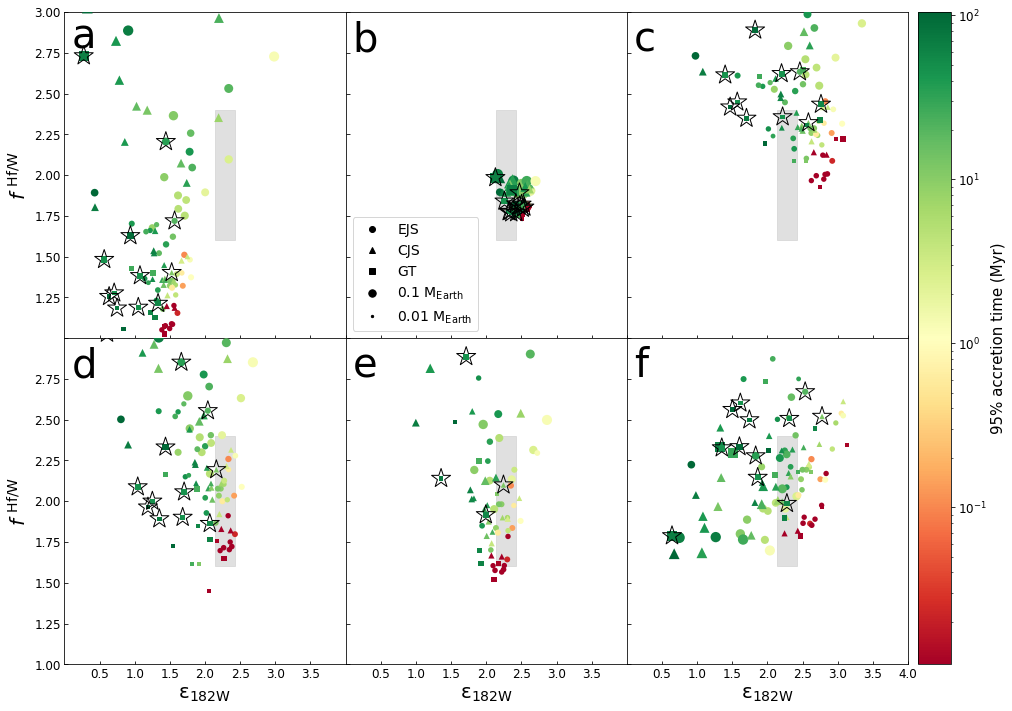

In [46]:
import matplotlib.colors as colors
fig24, ((ax24_1,ax24_2,ax24_3),(ax24_4,ax24_5,ax24_6)) = plt.subplots(2,3, figsize = (18,12))
axlist = [ax24_1, ax24_2, ax24_3, ax24_4, ax24_5, ax24_6]

all_t95 = np.concatenate([EJS_t95, CJS_t95, GT_t95], axis=0)
min_t95, max_t95 = np.add(all_t95.min(),0.01), all_t95.max() #0 to 185 Myr
colormap = plt.cm.get_cmap('RdYlGn')

F2 = ax24_1.scatter(EJS_eps_panel1, EJS_f_panel1, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6), cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_1.scatter(CJS_eps_panel1, CJS_f_panel1, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_1.scatter(GT_eps_panel1, GT_f_panel1, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_1.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_1.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone1 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_1.add_patch(zone1)
ax24_1.scatter(EJS_cluster_eps_panel1, EJS_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_1.scatter(CJS_cluster_eps_panel1, CJS_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_1.scatter(GT_cluster_eps_panel1, GT_cluster_f_panel1, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_1.tick_params(axis='both', which='major', labelsize=12)
ax24_1.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20)
ax24_1.set_ylim([1,3])
ax24_1.set_xlim([0,4])
ax24_1.tick_params(which = 'both', direction='in')
ax24_1.text(0.1,2.78,'a',fontsize = 40)
yticks_1 = ax24_1.yaxis.get_major_ticks()
yticks_1[0].label1.set_visible(False) #this prevents overlapping tick labels
ax24_1.set_xticks([0.5,1,1.5,2,2.5,3,3.5])

ax24_2.scatter(EJS_eps_panel2, EJS_f_panel2, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_2.scatter(CJS_eps_panel2, CJS_f_panel2, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_2.scatter(GT_eps_panel2, GT_f_panel2, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_2.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_2.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone2 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_2.add_patch(zone2)
ax24_2.scatter(EJS_cluster_eps_panel2, EJS_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_2.scatter(CJS_cluster_eps_panel2, CJS_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_2.scatter(GT_cluster_eps_panel2, GT_cluster_f_panel2, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_2.set_ylim([1,3])
ax24_2.set_xlim([0,4])
ax24_2.tick_params(which = 'both', direction='in')
ax24_2.text(0.1,2.76,'b',fontsize = 40)
xticks_2 = ax24_2.xaxis.get_major_ticks()
xticks_2[0].label1.set_visible(False) #this prevents overlapping tick labels
xticks_2[-1].label1.set_visible(False)
yticks_2 = ax24_2.yaxis.get_major_ticks()
yticks_2[-1].label1.set_visible(False)

ax24_3.scatter(EJS_eps_panel3, EJS_f_panel3, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_3.scatter(CJS_eps_panel3, CJS_f_panel3, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_3.scatter(GT_eps_panel3, GT_f_panel3, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_3.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_3.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone3 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_3.add_patch(zone3)
ax24_3.scatter(EJS_cluster_eps_panel3, EJS_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_3.scatter(CJS_cluster_eps_panel3, CJS_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_3.scatter(GT_cluster_eps_panel3, GT_cluster_f_panel3, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_3.set_ylim([1,3])
ax24_3.set_xlim([0,4])
ax24_3.tick_params(which = 'both', direction='in')
ax24_3.text(0.1,2.76,'c',fontsize = 40)
xticks_3 = ax24_3.xaxis.get_major_ticks()
#xticks_3[0].label1.set_visible(False) #this prevents overlapping tick labels
#xticks_3[-1].label1.set_visible(False)
#yticks_3 = ax24_3.yaxis.get_major_ticks()
#yticks_3[-1].label1.set_visible(False)

ax24_4.scatter(EJS_eps_panel4, EJS_f_panel4, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_4.scatter(CJS_eps_panel4, CJS_f_panel4, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_4.scatter(GT_eps_panel4, GT_f_panel4, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_4.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_4.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone4 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_4.add_patch(zone4)
ax24_4.scatter(EJS_cluster_eps_panel4, EJS_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_4.scatter(CJS_cluster_eps_panel4, CJS_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_4.scatter(GT_cluster_eps_panel4, GT_cluster_f_panel4, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
#ax24_4.set_xticks(fontsize=15)
ax24_4.tick_params(axis='both', which='major', labelsize=12)
#plt.yticks(fontsize=15)
ax24_4.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax24_4.set_ylabel('$f$ $^{\mathrm{Hf/W}}$',fontsize = 20)
ax24_4.set_ylim([1,3])
ax24_4.set_xlim([0,4])
ax24_4.tick_params(which = 'both', direction='in')
ax24_4.text(0.1,2.76,'d',fontsize = 40)
ax24_4.set_xticks([0.5,1,1.5,2,2.5,3,3.5])
xticks_4 = ax24_4.xaxis.get_major_ticks()
yticks_4 = ax24_4.yaxis.get_major_ticks()
yticks_4[-1].label1.set_visible(False)

ax24_5.scatter(EJS_eps_panel5, EJS_f_panel5, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_5.scatter(CJS_eps_panel5, CJS_f_panel5, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_5.scatter(GT_eps_panel5, GT_f_panel5, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_5.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_5.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone5 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_5.add_patch(zone5)
ax24_5.scatter(EJS_cluster_eps_panel5, EJS_cluster_f_panel5, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_5.scatter(CJS_cluster_eps_panel5, CJS_cluster_f_panel5, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_5.scatter(GT_cluster_eps_panel5, GT_cluster_f_panel5, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
#ax24_5.set_xticks(fontsize=15)
ax24_5.tick_params(axis='both', which='major', labelsize=12)
ax24_5.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
#plt.yticks(fontsize=15)
ax24_5.set_ylim([1,3])	
ax24_5.set_xlim([0,4])
ax24_5.tick_params(which = 'both', direction='in')
ax24_5.text(0.1,2.76,'e',fontsize = 40)
xticks_5 = ax24_5.xaxis.get_major_ticks()
ax24_5.set_xticks([0.5,1,1.5,2,2.5,3,3.5])
yticks_5 = ax24_5.yaxis.get_major_ticks()
yticks_5[-1].label1.set_visible(False)

ax24_6.scatter(EJS_eps_panel6, EJS_f_panel6, s = np.multiply(EJS_masses,600), marker='o', edgecolors = 'none', c = np.divide(EJS_t95,1e6),  cmap = colormap, label = 'EJS', vmin=min_t95, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_6.scatter(CJS_eps_panel6, CJS_f_panel6, s = np.multiply(CJS_masses,600), marker='^', edgecolors = 'none', c = np.divide(CJS_t95,1e6),  cmap = colormap, label = 'CJS', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
ax24_6.scatter(GT_eps_panel6, GT_f_panel6, s = np.multiply(GT_masses,600), marker='s', edgecolors = 'none', c = np.divide(GT_t95,1e6),  cmap = colormap, label = 'GT', vmin=0.01, norm=colors.LogNorm(), vmax=105, zorder =200)
#ax24_6.errorbar(Mars_eps, Mars_f, yerr = Mars_f_dev, xerr = Mars_eps_dev, color = 'k', linewidth = 1, capsize = 4)
#ax24_6.scatter(Mars_eps, Mars_f, s = np.multiply(Mars_mass,600), color = 'k', label = 'Mars')
zone6 = patches.Rectangle((2.14,1.6),0.28,0.8, color = 'lightgrey', alpha = 0.7, zorder = 1) #(left,bottom),length,height
ax24_6.add_patch(zone6)
ax24_6.scatter(EJS_cluster_eps_panel6, EJS_cluster_f_panel6, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_6.scatter(CJS_cluster_eps_panel6, CJS_cluster_f_panel6, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
ax24_6.scatter(GT_cluster_eps_panel6, GT_cluster_f_panel6, marker = '*', color = 'k', facecolors = 'none', s = 400, zorder =200)
#ax24_6.set_xticks(fontsize=15)
ax24_6.tick_params(axis='both', which='major', labelsize=12)
#plt.yticks(fontsize=15)
ax24_6.set_xlabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax24_6.set_ylim([1,3])	
ax24_6.set_xlim([0,4])
ax24_6.tick_params(which = 'both', direction='in')
ax24_6.text(0.1,2.76,'f',fontsize = 40)
xticks_6 = ax24_6.xaxis.get_major_ticks()
ax24_6.set_xticks([0.5,1,1.5,2,2.5,3,3.5,4])
yticks_6 = ax24_6.yaxis.get_major_ticks()

legend_elements = [Line2D([0], [0], label='EJS',color='k', linestyle='', marker = 'o'),Line2D([0], [0], color = 'k', label='CJS',linestyle='', marker = '^'),
                   Line2D([0], [0], label='GT', color = 'k', linestyle='', marker = 's'), 
                   #Line2D([0], [0], label='Mars',color = 'lightgrey', alpha = 0.7, linewidth=7),
                Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 7.4, label = '0.1 M$_\mathrm{Earth}$'),
                  Line2D([0], [0], marker='o', markerfacecolor = 'k', color = 'none', markersize = 2.31, label = '0.01 M$_\mathrm{Earth}$')]
ax24_2.legend(handles = legend_elements, loc='lower left', fontsize = 14)



plt.setp(ax24_2.get_yticklabels(), visible=False)
plt.setp(ax24_3.get_yticklabels(), visible=False)
plt.setp(ax24_5.get_yticklabels(), visible=False)
plt.setp(ax24_6.get_yticklabels(), visible=False)
plt.setp(ax24_1.get_xticklabels(), visible=False)
plt.setp(ax24_2.get_xticklabels(), visible=False)
plt.setp(ax24_3.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)

cbar24 = fig24.colorbar(F2,ax=axlist, pad = 0.01) #why is this so obtuse
cbar24.set_label('95% accretion time (Myr)', fontsize = 15)
cbar24.ax.tick_params(labelsize=12)

plt.show()
fig24.savefig('matches_figure_alt_revision.png')

In [47]:
EJS_eps_15 = []
EJS_eps_2 = []
EJS_eps_25 = []
for i in range(len(EJS_eps)):
    if EJS_orbits[i] < 1.5:
        EJS_eps_15.append(EJS_eps[i])
        EJS_eps_2.append(EJS_eps[i])
        EJS_eps_25.append(EJS_eps[i])
    elif EJS_orbits[i] < 2.0:
        EJS_eps_2.append(EJS_eps[i])
        EJS_eps_25.append(EJS_eps[i])
    elif EJS_orbits[i] < 2.5:
        EJS_eps_25.append(EJS_eps[i])

CJS_eps_15 = []
CJS_eps_2 = []
CJS_eps_25 = []
for i in range(len(CJS_eps)):
    if CJS_orbits[i] < 1.5:
        CJS_eps_15.append(CJS_eps[i])
        CJS_eps_2.append(CJS_eps[i])
        CJS_eps_25.append(CJS_eps[i])
    elif CJS_orbits[i] < 2.0:
        CJS_eps_2.append(CJS_eps[i])
        CJS_eps_25.append(CJS_eps[i])
    elif CJS_orbits[i] < 2.5:
        CJS_eps_25.append(CJS_eps[i])

GT_eps_15 = []
GT_eps_2 = []
GT_eps_25 = []
for i in range(len(GT_eps)):
    if GT_orbits[i] < 1.5:
        GT_eps_15.append(GT_eps[i])
        GT_eps_2.append(GT_eps[i])
        GT_eps_25.append(GT_eps[i])
    elif GT_orbits[i] < 2.0:
        GT_eps_2.append(GT_eps[i])
        GT_eps_25.append(GT_eps[i])
    elif GT_orbits[i] < 2.5:
        GT_eps_25.append(GT_eps[i])       

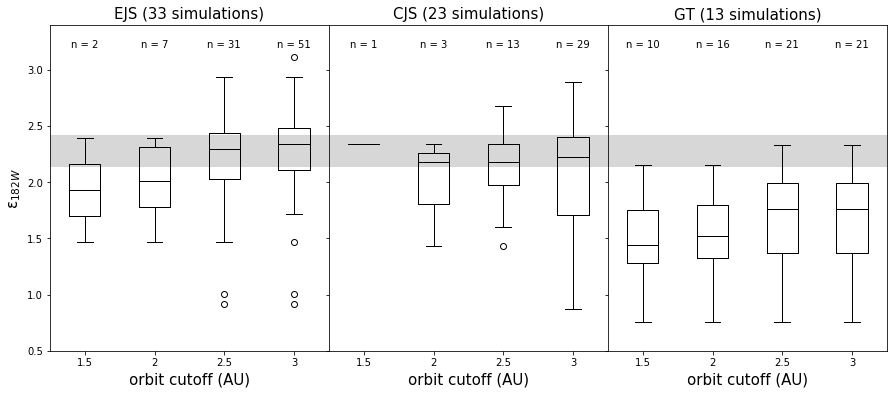

In [48]:
EJS_eps_data = [EJS_eps_15,EJS_eps_2,EJS_eps_25,EJS_eps]
CJS_eps_data = [CJS_eps_15,CJS_eps_2,CJS_eps_25,CJS_eps]
GT_eps_data = [GT_eps_15,GT_eps_2,GT_eps_25,GT_eps]


fig10 = plt.figure(figsize=(15,6))
ax10_1 = fig10.add_subplot(131)
ax10_1.boxplot(EJS_eps_data, medianprops=dict(color='k'))
ax10_1.set_xticklabels(orbit_cutoff_steps)
ax10_1.set_ylabel('\u03B5$_{182W} $', fontsize = 15)
ax10_1.set_title('EJS (33 simulations)', fontsize = 15)
ax10_1.set_ylim([0.5,3.4])
ax10_1.text(1,3.2,'n = ' + str(EJS_num_data[0]),horizontalalignment = 'center')
ax10_1.text(2,3.2,'n = ' + str(EJS_num_data[1]),horizontalalignment = 'center')
ax10_1.text(3,3.2,'n = ' + str(EJS_num_data[2]),horizontalalignment = 'center')
ax10_1.text(4,3.2,'n = ' + str(EJS_num_data[3]),horizontalalignment = 'center')
ax10_2 = fig10.add_subplot(132,sharey = ax10_1)
ax10_2.boxplot(CJS_eps_data, medianprops=dict(color='k'))
ax10_2.set_xticklabels(orbit_cutoff_steps)
ax10_2.set_title('CJS (23 simulations)', fontsize = 15)
ax10_2.set_ylim([0.5,3.4])
ax10_2.text(1,3.2,'n = ' + str(CJS_num_data[0]),horizontalalignment = 'center')
ax10_2.text(2,3.2,'n = ' + str(CJS_num_data[1]),horizontalalignment = 'center')
ax10_2.text(3,3.2,'n = ' + str(CJS_num_data[2]),horizontalalignment = 'center')
ax10_2.text(4,3.2,'n = ' + str(CJS_num_data[3]),horizontalalignment = 'center')
ax10_3 = fig10.add_subplot(133,sharey = ax10_1)
ax10_3.boxplot(GT_eps_data, medianprops=dict(color='k'))
ax10_3.set_ylim([0.5,3.4])
ax10_3.text(1,3.2,'n = ' + str(GT_num_data[0]),horizontalalignment = 'center')
ax10_3.text(2,3.2,'n = ' + str(GT_num_data[1]),horizontalalignment = 'center')
ax10_3.text(3,3.2,'n = ' + str(GT_num_data[2]),horizontalalignment = 'center')
ax10_3.text(4,3.2,'n = ' + str(GT_num_data[3]),horizontalalignment = 'center')
ax10_3.set_xticklabels(orbit_cutoff_steps)
ax10_3.set_title('GT (13 simulations)', fontsize = 15)
ax10_1.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax10_3.set_xlabel('orbit cutoff (AU)', fontsize = 15)
ax10_2.set_xlabel('orbit cutoff (AU)', fontsize = 15)
plt.setp(ax10_2.get_yticklabels(), visible=False)
plt.setp(ax10_3.get_yticklabels(), visible=False)


zone1 = patches.Rectangle((0,2.14),5,0.28, color = 'lightgrey', alpha = 0.9) #(left,bottom),length,height
ax10_1.add_patch(zone1)
zone2 = patches.Rectangle((0,2.14),5,0.28, color = 'lightgrey', alpha = 0.9) #(left,bottom),length,height
ax10_2.add_patch(zone2)
zone3 = patches.Rectangle((0,2.14),5,0.28, color = 'lightgrey', alpha = 0.9) #(left,bottom),length,height
ax10_3.add_patch(zone3)

#ax10_2.text(0.6,2.25,'Martian value')

plt.subplots_adjust(wspace=0, hspace=0)
fig10.savefig('reference_distributions.png')
plt.show()

In [49]:
inner_fO2 = -4
outer_fO2 = -1.5
step_loc = [1, 1.5, 2] #AU
#1: EJS_21, CJS_19, GT_20
EJS_f_1 = [4.30,3.85,3.42,5.25,3.61,4.48,3.30,5.24,4.33,2.76,14.41,2.79,5.29,3.69,4.45,5.01,5.16,4.91,3.95,3.55,4.20,4.30,4.88,3.37,2.63,4.06,2.61,4.53,7.21,4.44,3.80,9.99,3.28,6.37,9.99,3.42,3.51,22.41,4.49,4.20,3.59,4.03,4.25,1427.30,7.43,3.24,
           3.58,10.44,3.01,24.03,4.87]
EJS_inner_1 = [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.12,0.01,0.00,0.00,0.00,0.03,0.00,0.07,0.00,0.02,0.03,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.03,0.00,0.00,0.12,0.01,0.05,0.06,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.89,0.08,0.00,
               0.00,0.09,0.00,0.36,0.00]
CJS_f_1 = [68.16,3.41,4.86,4.38,3.57,4.31,3.91,3.08,3.67,5.24,3.86,3.45,31.43,4.69,3.02,4.38,3.39,4.68,2.83,5.24,4.11,5.33,2.51,4.80,3.33,3.53,2.39,3.94,3.07]
GT_f_1 = [3.72,4.13,3.37,4.37,39.84,6.36,4.39,5.54,13.73,21.49,4.78,5.30,3.94,7.82,9.50,4.78,40.23,5.21,5.62,11.01,9.50]
#1.5: EJS_22, CJS_18, GT_19
EJS_f_15 = [4.30,3.95,3.42,7.32,3.61,4.52,3.33,5.24,4.33,12.62,47.28,2.85,5.29,3.69,5.00,7.72,5.46,10.30,3.95,3.55,4.20,4.30,5.06,3.36,2.76,5.14,2.58,5.23,1527.91,4.20,70.43,1542.51,3.37,7.32,1219.90,3.42,53.84,46.77,4.30,4.20,3.59,4.03,4.25,
            2068.67,10.85,3.20,3.58,28.15,3.01,44.34,4.87]
EJS_inner_15 = [0.00,0.01,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.24,0.30,0.02,0.00,0.00,0.03,0.10,0.04,0.15,0.00,0.02,0.03,0.00,0.03,0.02,0.03,0.08,0.01,0.06,0.92,0.03,0.45,0.97,0.04,0.07,0.90,0.00,0.38,0.40,0.02,0.00,0.00,0.00,0.00,0.96,0.11,0.01,
                0.00,0.22,0.00,0.47,0.00]
CJS_f_15 = [107.45,3.41,4.86,4.80,3.49,4.31,3.86,3.35,3.67,5.95,4.11,3.45,76.21,6.01,2.95,4.21,3.43,4.68,3.28,5.24,4.19,5.14,2.65,4.56,3.41,84.80,2.95,4.09,3.23]
GT_f_15 = [3.72,4.13,3.37,7.49,215.32,8.73,5.25,5.54,13.73,195.00,7.38,5.30,3502.50,12.64,375.85,1586.71,157.43,9.93,6.95,11.01,32.28]
#2: EJS_20, CJS_20, GT_21
EJS_f_2 = [4.14,91.22,3.49,1624.39,3.61,4.47,4.84,1335.33,4.67,194.11,2096.98,92.09,1473.30,3.69,5.00,9.32,8.44,1227.03,3.95,3.51,4.20,4.30,7.13,93.55,3.24,1444.72,2.58,4.98,1986.57,6.44,1371.52,1738.20,1343.76,12.58,1562.89,3.35,57.42,1151.07,4.30,
           4.19,3.59,3.91,4.25,2536.65,12.65,3.20,3.58,2176.26,3.01,796.78,6.41]
EJS_inner_2 = [0.02,0.48,0.01,0.92,0.00,0.03,0.09,0.91,0.04,0.70,0.98,0.60,0.92,0.00,0.03,0.12,0.09,0.94,0.00,0.04,0.03,0.00,0.09,0.50,0.09,0.97,0.01,0.07,0.95,0.10,0.96,0.99,0.99,0.14,0.94,0.02,0.39,0.96,0.02,0.02,0.00,0.03,0.00,1.00,0.14,0.01,0.00,
               0.98,0.00,0.95,0.08]
CJS_f_2 = [135.32,3.41,5.17,5.20,3.45,4.55,3.69,151.80,3.67,1633.83,114.72,3.45,861.98,7.65,2.90,4.21,730.01,4.71,95.34,6.18,5.41,1342.71,14.01,5.06,3.56,972.80,18.27,4.43,4.27]
GT_f_2 = [3.77,2008.94,3.37,15.05,537.27,10.99,12.79,1676.39,25.92,498.72,3530.37,2924.23,3502.50,2601.36,815.86,1586.71,322.75,16.54,2470.78,1550.50,32.28]

In [50]:
EJS_f_1 = [EJS_f_1[i] for i in EJS_members]
EJS_inner_1 = [EJS_inner_1[i] for i in EJS_members]
CJS_f_1 = [CJS_f_1[i] for i in CJS_members]
GT_f_1 = [GT_f_1[i] for i in GT_members]

EJS_f_15 = [EJS_f_15[i] for i in EJS_members]
EJS_inner_15 = [EJS_inner_15[i] for i in EJS_members]
CJS_f_15 = [CJS_f_15[i] for i in CJS_members]
GT_f_15 = [GT_f_15[i] for i in GT_members]

EJS_f_2 = [EJS_f_2[i] for i in EJS_members]
EJS_inner_2 = [EJS_inner_2[i] for i in EJS_members]
CJS_f_2 = [CJS_f_2[i] for i in CJS_members]
GT_f_2 = [GT_f_2[i] for i in GT_members]

fig5 = plt.figure(figsize=(18, 12))
ax5 = fig5.add_subplot(131)
y_lim = 20
ax5.set_ylim([0,y_lim])
ax5.set_xticks([1.0,1.5,2.0])
ax5.set_ylabel('$f$ $^{ Hf/W}$', fontsize = 20)
ax5.set_xlabel('Location of $fO_2$ step (AU)', fontsize = 20)
ax5.set_title('EJS', fontsize = 15)

ax5.scatter(np.multiply(step_loc[0], np.ones((1,len(EJS_f_1)))),EJS_f_1, c = EJS_MWSMA, cmap = 'inferno')
ax5.scatter(step_loc[0], np.median(EJS_f_1),marker = '_', s=500, color = 'k')
plt.text(step_loc[0]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_1)) + ')', fontsize = 15)
#plt.arrow(step_loc[0]-0.045, y_lim*0.95, 0, y_lim * 0.03, width = 0.02)
ax5.scatter(np.multiply(step_loc[1], np.ones((1,len(EJS_f_1)))),EJS_f_15, c = EJS_MWSMA, cmap = 'inferno')
ax5.scatter(step_loc[1], np.median(EJS_f_15),marker = '_', s=500, color = 'k')
plt.text(step_loc[1]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_15)) + ')', fontsize = 15)
F2 = ax5.scatter(np.multiply(step_loc[2], np.ones((1,len(EJS_f_1)))),EJS_f_2, c = EJS_MWSMA, cmap = 'inferno')
ax5.scatter(step_loc[2], np.median(EJS_f_2),marker = '_', s=500, color = 'k')
plt.text(step_loc[2]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_2)) + ')', fontsize = 15)

ax5_2 = fig5.add_subplot(132)
ax5_2.set_ylim([0,y_lim])
ax5_2.set_xticks([1.0,1.5,2.0])
#ax5_2.set_ylabel('$f$ $^{ Hf/W}$', fontsize = 20)
ax5_2.set_xlabel('Location of $fO_2$ step (AU)', fontsize = 20)
ax5_2.set_title('CJS', fontsize = 15)

ax5_2.scatter(np.multiply(step_loc[0], np.ones((1,len(CJS_f_1)))),CJS_f_1, c = CJS_MWSMA, cmap = 'inferno', marker = '^')
ax5_2.scatter(step_loc[0], np.median(CJS_f_1),marker = '_', s=500, color = 'k')
plt.text(step_loc[0]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in CJS_f_1)) + ')', fontsize = 15)
ax5_2.scatter(np.multiply(step_loc[1], np.ones((1,len(CJS_f_15)))),CJS_f_15, c = CJS_MWSMA, cmap = 'inferno', marker = '^')
ax5_2.scatter(step_loc[1], np.median(CJS_f_15),marker = '_', s=500, color = 'k')
plt.text(step_loc[1]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in CJS_f_15)) + ')', fontsize = 15)
ax5_2.scatter(np.multiply(step_loc[2], np.ones((1,len(CJS_f_2)))),CJS_f_2, c = CJS_MWSMA, cmap = 'inferno', marker = '^')
ax5_2.scatter(step_loc[2], np.median(CJS_f_2),marker = '_', s=500, color = 'k')
plt.text(step_loc[2]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in CJS_f_2)) + ')', fontsize = 15)

ax5_3 = fig5.add_subplot(133)
ax5_3.set_ylim([0,y_lim])
ax5_3.set_xticks([1.0,1.5,2.0])
#ax5_3.set_ylabel('$f$ $^{ Hf/W}$', fontsize = 20)
ax5_3.set_xlabel('Location of $fO_2$ step (AU)', fontsize = 20)
ax5_3.set_title('GT', fontsize = 15)

ax5_3.scatter(np.multiply(step_loc[0], np.ones((1,len(GT_f_1)))),GT_f_1, c = GT_MWSMA, cmap = 'inferno', marker = 's')
ax5_3.scatter(step_loc[0], np.median(GT_f_1),marker = '_', s=500, color = 'k')
plt.text(step_loc[0]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in GT_f_1)) + ')', fontsize = 15)
ax5_3.scatter(np.multiply(step_loc[1], np.ones((1,len(GT_f_15)))),GT_f_15, c = GT_MWSMA, cmap = 'inferno', marker = 's')
ax5_3.scatter(step_loc[1], np.median(GT_f_15),marker = '_', s=500, color = 'k')
plt.text(step_loc[1]-0.045, y_lim*0.95, '('+ str(sum(i > y_lim for i in GT_f_15)) + ')', fontsize = 15)
ax5_3.scatter(np.multiply(step_loc[2], np.ones((1,len(GT_f_2)))),GT_f_2, c = GT_MWSMA, cmap = 'inferno', marker = 's')
ax5_3.scatter(step_loc[2], np.median(GT_f_2),marker = '_', s=500, color = 'k')
plt.text(step_loc[2]-0.085, y_lim*0.95, '('+ str(sum(i > y_lim for i in GT_f_2)) + ')', fontsize = 15)


cbar5 = fig5.colorbar(F2,ax=ax5_3)
cbar5.set_label('Mass-weighted provenance (AU)')

plt.show()

In [51]:
inner_fO2 = -4
outer_fO2 = -1
step_loc = [1.5, 2, 2.5] #AU
EJS_f_15 = [0.23,0.29,0.28,0.26,0.22,0.25,0.28,0.23,0.23,2.38,1.18,0.31,0.24,0.22,0.25,0.28,0.25,0.46,0.22,0.21,0.24,0.23,0.26,0.27,0.35,0.31,0.32,0.24,360.62,0.24,13.67,611.65,0.31,
            0.28,298.74,0.27,3.50,1.69,0.22,0.22,0.22,0.23,0.24,538.13,0.30,0.28,0.22,0.60,0.27,20.64,0.23]
CJS_f_15 = [26.51,0.23,0.23,0.24,0.27,0.24,0.24,0.35,0.23,0.25,0.31,0.23,16.65,0.27,0.28,0.24,0.35,0.24,0.38,0.24,0.25,0.24,0.37,0.23,0.30,26.87,0.43,0.26,0.33]
GT_f_15 = [0.22,0.23,0.21,0.27,99.19,0.36,0.25,0.22,0.33,70.36,0.22,0.21,474.47,0.99,77.15,338.52,54.13,0.26,0.23,0.30,0.46]
EJS_f_20 = [0.25,106.69,0.31,11333.73,0.23,0.26,0.49,9692.95,0.25,1366.25,19241.39,216.76,12553.88,0.22,0.27,0.36,0.33,14799.22,0.23,0.22,0.25,0.25,0.33,43.79,0.44,19310.91,0.34,0.25,
            12478.09,0.27,16221.31,23397.22,25145.71,0.48,12133.45,0.29,12.51,13911.97,0.23,0.24,0.23,0.25,0.25,21616.95,0.43,0.29,0.23,18216.07,0.28,21524.69,0.27]
CJS_f_20 = [30.27,0.23,0.24,0.25,0.27,0.24,0.24,68.94,0.23,413.40,3.66,0.23,355.00,0.28,0.28,0.24,522.39,0.24,19.20,0.25,0.27,380.37,1.94,0.24,0.31,594.22,7.54,0.26,0.41]
GT_f_20 = [0.22,544.30,0.21,0.32,311.79,0.37,0.33,412.00,0.50,292.47,582.32,638.36,474.47,705.86,180.20,338.52,143.60,0.29,530.71,344.94,0.46]
EJS_f_25 = [0.25,16455.33,103.65,21775.39,0.23,0.26,21521.65,18710.80,0.25,29797.08,22946.54,227.38,21887.04,15794.93,0.26,0.42,19946.54,20287.55,19442.76,18100.55,0.25,0.25,0.33,46.24,
            1193.42,24176.98,0.34,15086.61,20778.40,0.27,21304.28,23397.22,27577.84,22717.46,18991.36,21854.64,13.37,17087.11,21337.22,17395.50,0.23,0.25,0.26,21616.95,20235.50,30.10,
            0.23,22265.38,2.88,34854.70,17964.00]
CJS_f_25 = [629.19,0.23,517.45,0.25,583.42,0.25,0.24,635.15,0.23,413.40,563.03,0.23,614.19,0.34,0.28,0.25,651.02,0.25,26.35,418.73,0.27,520.39,3.11,487.38,0.36,655.41,20.87,0.26,21.46]
GT_f_25 = [0.22,834.65,0.21,0.32,729.04,263.93,554.26,412.00,0.50,623.77,582.32,638.36,474.47,705.86,352.93,338.52,1228.99,0.29,530.71,675.16,607.26]


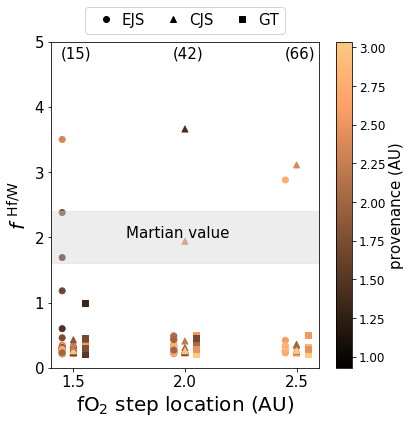

In [52]:
fig22 = plt.figure(figsize=(6, 6))
ax22 = fig22.add_subplot(111)
y_lim = 5
ax22.set_ylim([0,y_lim])
ax22.set_yticks([0,1,2,3,4,5])
ax22.set_xticks([1.5,2.0,2.5])
ax22.set_ylabel('$f$ $^{\mathrm{Hf/W}}$', fontsize = 20)
ax22.set_xlabel('fO$_2$ step location (AU)', fontsize = 20)
F2 = ax22.scatter(np.multiply(step_loc[0]-0.05, np.ones((1,len(EJS_f_15)))),EJS_f_15, c = EJS_MWSMA, cmap = 'copper', label = 'EJS')
ax22.scatter(np.multiply(step_loc[1]-0.05, np.ones((1,len(EJS_f_15)))),EJS_f_20, c = EJS_MWSMA, cmap = 'copper')
ax22.scatter(np.multiply(step_loc[2]-0.05, np.ones((1,len(EJS_f_15)))),EJS_f_25, c = EJS_MWSMA, cmap = 'copper')
ax22.scatter(np.multiply(step_loc[0], np.ones((1,len(CJS_f_15)))),CJS_f_15, c = CJS_MWSMA, cmap = 'copper', label = 'CJS', marker = '^')
ax22.scatter(np.multiply(step_loc[1], np.ones((1,len(CJS_f_15)))),CJS_f_20, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax22.scatter(np.multiply(step_loc[2], np.ones((1,len(CJS_f_15)))),CJS_f_25, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax22.scatter(np.multiply(step_loc[0]+0.05, np.ones((1,len(GT_f_15)))),GT_f_15, c = GT_MWSMA, cmap = 'copper', label = 'GT', marker = 's')
ax22.scatter(np.multiply(step_loc[1]+0.05, np.ones((1,len(GT_f_15)))),GT_f_20, c = GT_MWSMA, cmap = 'copper', marker = 's')
ax22.scatter(np.multiply(step_loc[2]+0.05, np.ones((1,len(GT_f_15)))),GT_f_25, c = GT_MWSMA, cmap = 'copper', marker = 's')

zone1 = patches.Rectangle((-0.1,1.6),3,0.8, color = 'lightgrey', alpha = 0.4) #(left,bottom),length,height
ax22.add_patch(zone1)

cbar22 = fig22.colorbar(F2,ax=ax22)
cbar22.ax.tick_params(labelsize=12)
cbar22.set_label('provenance (AU)', fontsize = 15)

ax22.set_xlim([1.4,2.6])
plt.text(step_loc[0]-0.055, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_15 + CJS_f_15 + GT_f_15)) + ')', fontsize = 15)
plt.text(step_loc[1]-0.055, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_20 + CJS_f_20 + GT_f_20)) + ')', fontsize = 15)
plt.text(step_loc[2]-0.055, y_lim*0.95, '('+ str(sum(i > y_lim for i in EJS_f_25 + CJS_f_25 + GT_f_25)) + ')', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

legend_elements = [Line2D([0], [0], label='EJS',color='k', linestyle='', marker = 'o'),Line2D([0], [0], color = 'k', label='CJS',linestyle='', marker = '^'),
                   Line2D([0], [0], label='GT', color = 'k', linestyle='', marker = 's')]
#plt.legend(fontsize = 15, loc = 'upper right')
#plt.legend(handles = legend_elements, bbox_to_anchor = (1.05, 1.09), loc = 'upper right', fontsize = 15, ncol = 3, columnspacing = 0.9, handletextpad = 0.05)
plt.legend(handles = legend_elements, bbox_to_anchor = (0.9, 1.13), loc = 'upper right', fontsize = 15, ncol = 3, columnspacing = 0.9, handletextpad = 0.05)

plt.text(0.28, 0.4, "Martian value", fontsize = 15, transform=ax22.transAxes)
plt.show()
#fig22.savefig('step_figure_revision.png')
#fig22.savefig('figure6.pdf')

In [53]:
EJS_a_f = [0.23,0.29,0.28,0.26,0.22,0.25,0.28,0.23,0.23,2.38,1.18,0.31,0.24,0.22,0.25,0.28,0.25,0.46,0.22,0.21,0.24,0.23,0.26,0.27,0.35,0.31,0.32,0.24,360.62,0.24,13.67,611.65,0.31,
            0.28,298.74,0.27,3.50,1.69,0.22,0.22,0.22,0.23,0.24,538.13,0.30,0.28,0.22,0.60,0.27,20.64,0.23]
CJS_a_f = [26.51,0.23,0.23,0.24,0.27,0.24,0.24,0.35,0.23,0.25,0.31,0.23,16.65,0.27,0.28,0.24,0.35,0.24,0.38,0.24,0.25,0.24,0.37,0.23,0.30,26.87,0.43,0.26,0.33]
GT_a_f = [0.22,0.23,0.21,0.27,99.19,0.36,0.25,0.22,0.33,70.36,0.22,0.21,474.47,0.99,77.15,338.52,54.13,0.26,0.23,0.30,0.46]
EJS_b_f = [0.06,472.57,3.77,1046.06,0.14,0.02,22.22,1234.84,0.43,1816.29,2042.67,21.61,772.55,0.87,0.08,0.12,130.54,1807.22,4.80,2.16,0.16,0.06,0.03,22.63,2.42,5578.53,0.04,2.80,
           16567.25,0.22,6846.45,26661.18,7419.12,64.54,15505.91,1.79,3.04,1409.54,29.29,2.28,0.00,0.01,0.01,24041.08,133.17,0.06,0.06,16953.50,0.11,10878.26,192.94]
CJS_b_f = [987.40,0.00,30.25,0.07,63.88,0.03,0.01,519.62,0.00,330.42,115.07,0.01,8095.09,0.05,0.01,0.02,1821.37,0.41,10.54,5.46,0.02,398.35,0.12,10.27,0.13,3107.03,3.78,0.01,0.22]
GT_b_f = [0.04,545.80,0.03,0.04,5904.75,41.41,46.05,1333.32,0.11,6181.18,3670.36,2036.26,13300.22,2973.84,4427.31,7747.78,3976.95,0.29,884.39,277.51,271.87]
EJS_c_f = [0.42,3.24,1.04,3.18,0.45,0.31,1.40,3.26,0.59,6.56,4.98,2.09,3.05,0.62,0.44,0.52,1.98,4.72,0.87,0.74,0.51,0.41,0.34,1.25,1.10,5.75,0.47,0.86,16.33,0.54,8.81,23.06,6.38,1.64,
           16.91,0.89,1.00,4.72,1.25,0.78,0.23,0.25,0.29,19.45,2.11,0.41,0.38,8.26,0.42,14.01,1.95]
CJS_c_f = [8.55,0.24,1.34,0.44,1.95,0.35,0.25,4.32,0.25,2.68,2.09,0.24,10.83,0.43,0.32,0.30,5.75,0.64,1.25,1.03,0.29,2.86,0.64,1.18,0.62,10.16,1.15,0.28,0.64]
GT_c_f = [0.35,2.30,0.33,0.32,14.84,1.71,1.48,3.02,0.44,14.73,3.21,3.00,9.60,5.02,10.03,10.14,9.77,0.51,2.78,2.20,2.25]
EJS_d_f = [1.8358681483130392, 2.5343574471274244, 2.3142000034686654, 2.7552457644975528, 1.5759000977795177, 2.096271181304133, 2.3876258655102283, 1.8996618760457653, 1.8494738389516971, 33.76123765558501, 46.20591155232904, 2.470738447296634, 1.9737230603372606, 1.5658993895636777, 2.19294633856687, 3.680737053476202, 2.295712744420132, 9.94833463568516, 1.6057165643648732, 1.6047365031605647, 1.9814114114580015, 1.8358681483130392, 2.3650696742684167, 2.126439426372504, 3.1767219881896187, 3.7423803331130294, 2.4984347225870582, 2.246125946030019, 17355.773851227023, 1.9814114114580015, 199.80133508984693, 30512.926231199937, 2.9023244187377433, 3.124812341747668, 13931.691764518842, 2.1344841318318317, 36.282896542831224, 9.19908479398288, 1.7841133882174693, 1.7012062973791728, 1.6430412220667927, 1.8071355754875644, 1.8790470310142378, 25187.010961748852, 4.494701651965034, 2.1917043667313987, 1.5812584082904246, 17.53237736258439, 1.9515274600474153, 438.0163228368327, 1.8197797025700666]
CJS_d_f = [526.9334069581145, 1.6673583806707004, 1.8994879253435255, 1.9502847273989046, 2.145076647502072, 1.8750133175459704, 1.787344742640252, 3.2018620043630763, 1.7419372111935072, 2.0996531380330654, 2.4817062372441128, 1.6605343397900008, 299.1379743620425, 2.5511876419095016, 2.1259345699720815, 1.8926070065438263, 3.200223564155216, 1.9758678651936514, 3.181483833545366, 2.0181885676669733, 2.0133803613304524, 2.0185399489748677, 3.065208432105508, 1.8118304516204766, 2.5393965885175245, 479.0909788610905, 3.657813724700481, 2.069785721860737, 2.8151707545145084]
GT_d_f = [1.6179075930008104, 1.9170018022780262, 1.5207945165427112, 2.8868016644125194, 2465.980048320803, 4.759407425442966, 2.2463016342867967, 1.6980248231641784, 4.082574938110519, 2395.3080083634145, 2.0451486609925924, 1.6189505483706594, 18565.652747525135, 11.696504293893287, 2115.3708310948386, 12784.033668826347, 1628.5300955843227, 2.4840710741013075, 2.139691761715126, 3.1815106360957524, 6.960651886632851]

step_loc = [1, 1.5, 2, 2.5]

In [54]:
for i in GT_d_f:
    print(i)

1.6179075930008104
1.9170018022780262
1.5207945165427112
2.8868016644125194
2465.980048320803
4.759407425442966
2.2463016342867967
1.6980248231641784
4.082574938110519
2395.3080083634145
2.0451486609925924
1.6189505483706594
18565.652747525135
11.696504293893287
2115.3708310948386
12784.033668826347
1628.5300955843227
2.4840710741013075
2.139691761715126
3.1815106360957524
6.960651886632851


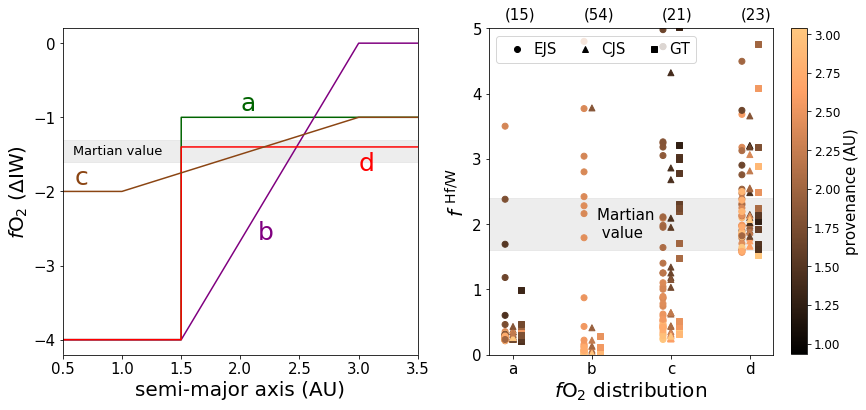

In [55]:
x = [0,1.5,1.501,3,3.5]
a = [-4,-4,-1,-1,-1]
b = [-4,-4,-4,0,0]
d = [-4,-4,-1.4,-1.4,-1.4]
xc = [0,1,3,3.5]
c = [-2,-2,-1,-1]

fig222 = plt.figure(figsize=(14, 6))
ax222_1 = fig222.add_subplot(121)
ax222_1.plot(x,a, color = 'darkgreen')
ax222_1.text(2,-0.9,'a',color = 'darkgreen', fontsize = 25)
ax222_1.plot(x,b, color = 'purple')
ax222_1.text(2.15,-2.65,'b',color = 'purple', fontsize = 25)
ax222_1.plot(x,d, color = 'r')
ax222_1.text(3,-1.71,'d',color = 'r', fontsize = 25)
ax222_1.plot(xc,c, color = 'saddlebrown')
ax222_1.text(0.6,-1.9,'c',color = 'saddlebrown', fontsize = 25)
ax222_1.set_ylabel('$f$O$_2$ (ΔIW)', fontsize = 20)
ax222_1.set_xlabel('semi-major axis (AU)', fontsize = 20)
ax222_1.set_xlim([0.5,3.5])
plt.text(0.59, -1.5, "Martian value", fontsize = 13)
zone1 = patches.Rectangle((-0.1,-1.6),5,0.3, color = 'lightgrey', alpha = 0.4) #(left,bottom),length,height
ax222_1.add_patch(zone1)
ax222_1.set_yticks([-4,-3,-2,-1,0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax222_2 = fig222.add_subplot(122)
y_lim = 5
ax222_2.set_ylim([0,y_lim])
ax222_2.set_yticks([0,1,2,3,4,5])
ax222_2.set_xticks([1.0,1.5,2.0,2.5])
ax222_2.set_xticklabels(['a','b','c','d'])
ax222_2.set_ylabel('$f$ $^{\mathrm{Hf/W}}$', fontsize = 20)
ax222_2.set_xlabel('$f$O$_2$ distribution', fontsize = 20)
F2 = ax222_2.scatter(np.multiply(step_loc[0]-0.05, np.ones((1,len(EJS_a_f)))),EJS_a_f, c = EJS_MWSMA, cmap = 'copper', label = 'EJS')
ax222_2.scatter(np.multiply(step_loc[1]-0.05, np.ones((1,len(EJS_b_f)))),EJS_b_f, c = EJS_MWSMA, cmap = 'copper')
ax222_2.scatter(np.multiply(step_loc[2]-0.05, np.ones((1,len(EJS_c_f)))),EJS_c_f, c = EJS_MWSMA, cmap = 'copper')
ax222_2.scatter(np.multiply(step_loc[3]-0.05, np.ones((1,len(EJS_d_f)))),EJS_d_f, c = EJS_MWSMA, cmap = 'copper')
ax222_2.scatter(np.multiply(step_loc[0], np.ones((1,len(CJS_a_f)))),CJS_a_f, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax222_2.scatter(np.multiply(step_loc[1], np.ones((1,len(CJS_b_f)))),CJS_b_f, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax222_2.scatter(np.multiply(step_loc[2], np.ones((1,len(CJS_c_f)))),CJS_c_f, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax222_2.scatter(np.multiply(step_loc[3], np.ones((1,len(CJS_d_f)))),CJS_d_f, c = CJS_MWSMA, cmap = 'copper', marker = '^')
ax222_2.scatter(np.multiply(step_loc[0]+0.05, np.ones((1,len(GT_a_f)))),GT_a_f, c = GT_MWSMA, cmap = 'copper', marker = 's')
ax222_2.scatter(np.multiply(step_loc[1]+0.05, np.ones((1,len(GT_b_f)))),GT_b_f, c = GT_MWSMA, cmap = 'copper', marker = 's')
ax222_2.scatter(np.multiply(step_loc[2]+0.05, np.ones((1,len(GT_c_f)))),GT_c_f, c = GT_MWSMA, cmap = 'copper', marker = 's')
ax222_2.scatter(np.multiply(step_loc[3]+0.05, np.ones((1,len(GT_d_f)))),GT_d_f, c = GT_MWSMA, cmap = 'copper', marker = 's')
zone1 = patches.Rectangle((-0.1,1.6),3,0.8, color = 'lightgrey', alpha = 0.4, zorder = 0) #(left,bottom),length,height
ax222_2.add_patch(zone1)
plt.text(1.53, 1.8, "Martian \n value", fontsize = 15)
legend_elements = [Line2D([0], [0], label='EJS',color='k', linestyle='', marker = 'o'),Line2D([0], [0], color = 'k', label='CJS',linestyle='', marker = '^'),
                   Line2D([0], [0], label='GT', color = 'k', linestyle='', marker = 's')]
plt.legend(handles = legend_elements, loc = 'upper left', fontsize = 15, ncol = 3, columnspacing = 0.9, handletextpad = 0.05)
plt.text(step_loc[0]-0.055, y_lim*1.03, '('+ str(sum(i > y_lim for i in EJS_a_f + CJS_a_f + GT_a_f)) + ')', fontsize = 15)
plt.text(step_loc[1]-0.055, y_lim*1.03, '('+ str(sum(i > y_lim for i in EJS_b_f + CJS_b_f + GT_b_f)) + ')', fontsize = 15)
plt.text(step_loc[2]-0.055, y_lim*1.03, '('+ str(sum(i > y_lim for i in EJS_c_f + CJS_c_f + GT_c_f)) + ')', fontsize = 15)
plt.text(step_loc[3]-0.055, y_lim*1.03, '('+ str(sum(i > y_lim for i in EJS_d_f + CJS_d_f + GT_d_f)) + ')', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar222 = fig222.colorbar(F2,ax=ax222_2)
cbar222.ax.tick_params(labelsize=12)
cbar222.set_label('provenance (AU)', fontsize = 15)
plt.show()
fig222.savefig('fO2_distribution_figure.png', dpi = 1000)
#fig222.savefig('figure7.pdf') #for some reason, distribution b plots incorrectly as a pdf

In [56]:
k_core_steps = [0,0.25,0.5,0.75,1]
#no fO2 step, fO2 = -1.5, k_mantle = 1
EJS_9_52_0pre = [5.62,4.80,4.14,3.50,2.92] #EJS_4,5,2,6,3 
EJS_9_52_10pre = [7.58, 5.97, 4.83, 3.91, 3.15] #EJS_27,26,25,24,23
EJS_9_52_100pre = [8.00,6.21,4.97,3.99,3.20] #EJS_28,29,30,31,32

fig6 = plt.figure(figsize=(10, 8))
ax6 = fig6.add_subplot(111)
ax6.plot(k_core_steps,EJS_9_52_0pre, marker = 'o', c = 'b', label = '1 step pre-accretion')
ax6.plot(k_core_steps,EJS_9_52_10pre, marker = 'o', c = 'dodgerblue', label = '10 step pre-accretion')
ax6.plot(k_core_steps,EJS_9_52_100pre, marker = 'o', c = 'powderblue', label = '100 step pre-accretion')
ax6.set_ylabel('\u03B5$_{182W} $',fontsize = 20)
ax6.set_xlabel('k$_{core} $',fontsize = 20)
zone1 = patches.Rectangle((0.84,1),0.16,8, color = 'lightgrey', alpha = 0.9) #(left,bottom),length,height
ax6.add_patch(zone1)
plt.legend(fontsize = 15, loc = 'lower left')
#ax6.set_xlim([0,1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Pre-accretion of body EJS9:52', y = 0.93, fontsize = 20)
plt.show()

EJS_Pfrac1 = [4.26,3.00,3.78,3.20,4.59,4.50,2.78,5.55,3.67,1.15,1.73,1.97,5.64,5.15,4.52,3.70,5.71,2.34,5.42,4.61,4.42,5.13,3.36,3.01,2.08,3.31,1.89,3.72,3.54,4.26,
              2.60,3.16,3.16,3.42,2.63,3.54,3.20,0.48,5.45,4.39,4.90,4.21,5.36,3.11,3.72,2.30,5.00,2.54,2.95,0.61,5.60] #EJS_33
EJS_Pfrac07 = [4.70,3.32,4.49,3.23,5.08,5.02,3.24,6.07,3.97,1.22,1.74,2.30,6.19,5.73,5.02,4.02,6.33,2.56,6.03,5.07,4.88,5.77,3.63,3.45,2.43,3.72,2.33,4.01,3.69,4.69,
               2.92,3.48,3.69,3.66,2.68,4.10,3.71,0.46,6.04,4.81,5.54,4.68,6.10,3.25,3.98,2.64,5.60,2.64,3.47,0.69,6.19] #EJS_36
EJS_Pfrac05 = [5.04,3.56,5.10,3.25,5.46,5.41,3.63,6.47,4.19,1.27,1.75,2.59,6.59,6.17,5.40,4.26,6.81,2.73,6.50,5.41,5.22,6.26,3.81,3.81,2.73,4.04,2.75,4.22,3.78,5.01,
               3.19,3.72,4.13,3.83,2.71,4.57,4.13,0.43,6.48,5.12,6.03,5.04,6.70,3.34,4.17,2.94,6.07,2.70,3.92,0.74,6.63] #EJS_34
EJS_Pfrac01 = [5.82,4.06,6.84,3.28,6.37,6.33,4.72,7.38,4.66,1.36,1.73,3.46,7.53,7.25,6.29,4.78,7.96,3.07,7.63,6.22,6.02,7.48,4.20,4.75,3.48,4.80,4.14,4.66,3.98,5.75,
               3.87,4.28,5.25,4.20,2.75,5.79,5.28,0.39,7.55,5.85,7.27,5.88,8.20,3.55,4.57,3.73,7.21,2.84,5.20,0.88,7.68] #EJS_35

CJS_Pfrac1 = [1.07,3.48,4.08,3.20,2.47,3.29,3.18,1.98,3.43,3.95,0.51,3.94,1.03,2.27,2.04,3.75,1.97,3.11,0.73,2.81,2.39,4.51,0.89,3.52,2.53,1.18,0.32,2.29,0.83] #CJS 2
CJS_Pfrac07 = [1.19,3.88,4.46,3.46,2.77,3.57,3.49,2.30,3.81,4.27,0.50,4.43,1.09,2.37,2.34,4.15,2.26,3.34,0.77,2.96,2.54,4.93,1.02,3.79,2.95,1.39,0.31,2.46,0.89] #CJS_25
CJS_Pfrac05 = [1.30,4.18,4.73,3.64,3.01,3.78,3.71,2.55,4.09,4.50,0.49,4.81,1.13,2.43,2.58,4.45,2.47,3.49,0.80,3.06,2.64,5.25,1.13,3.99,3.31,1.58,0.31,2.56,0.93] #CJS_24
CJS_Pfrac01 = [1.61,4.89,5.37,4.04,3.57,4.23,4.21,3.15,4.74,5.02,0.46,5.75,1.21,2.51,3.20,5.16,2.95,3.81,0.87,3.25,2.80,6.00,1.43,4.41,4.24,2.13,0.29,2.74,1.03] #CJS_23

GT_Pfrac1 = [3.42,3.51,4.18,2.27,1.52,1.59,2.95,4.40,1.10,0.86,4.49,6.48,5.07,1.00,2.38,3.76,0.30,2.30,1.63,3.22,1.43] #GT_2
GT_Pfrac07 = [3.72,3.84,4.63,2.39,1.62,1.60,3.17,4.63,1.08,0.86,4.75,6.95,5.36,1.02,2.47,3.94,0.30,2.36,1.63,3.34,1.44] #GT_24
GT_Pfrac05 = [3.95,4.08,4.98,2.46,1.69,1.60,3.32,4.79,1.07,0.84,4.93,7.30,5.57,1.03,2.54,4.06,0.29,2.39,1.64,3.42,1.44] #GT_22
GT_Pfrac01 = [4.46,4.63,5.79,2.60,1.86,1.54,3.65,5.15,1.04,0.73,5.33,8.08,6.03,1.06,2.70,4.33,0.28,2.46,1.63,3.59,1.45] #GT_23

Pfrac_steps = [0.1,0.5,0.7,1.0]

EJS_Pfrac_med = [np.median(EJS_Pfrac01),np.median(EJS_Pfrac05),np.median(EJS_Pfrac07),np.median(EJS_Pfrac1)]
EJS_Pfrac_upper = [np.quantile(EJS_Pfrac01,0.75),np.quantile(EJS_Pfrac05,0.75),np.quantile(EJS_Pfrac07,0.75),np.quantile(EJS_Pfrac1,0.75)]
EJS_Pfrac_lower = [np.quantile(EJS_Pfrac01,0.25),np.quantile(EJS_Pfrac05,0.25),np.quantile(EJS_Pfrac07,0.25),np.quantile(EJS_Pfrac1,0.25)]

CJS_Pfrac_med = [np.median(CJS_Pfrac01),np.median(CJS_Pfrac05),np.median(CJS_Pfrac07),np.median(CJS_Pfrac1)]
CJS_Pfrac_upper = [np.quantile(CJS_Pfrac01,0.75),np.quantile(CJS_Pfrac05,0.75),np.quantile(CJS_Pfrac07,0.75),np.quantile(CJS_Pfrac1,0.75)]
CJS_Pfrac_lower = [np.quantile(CJS_Pfrac01,0.25),np.quantile(CJS_Pfrac05,0.25),np.quantile(CJS_Pfrac07,0.25),np.quantile(CJS_Pfrac1,0.25)]

GT_Pfrac_med = [np.median(GT_Pfrac01),np.median(GT_Pfrac05),np.median(GT_Pfrac07),np.median(GT_Pfrac1)]
GT_Pfrac_upper = [np.quantile(GT_Pfrac01,0.75),np.quantile(GT_Pfrac05,0.75),np.quantile(GT_Pfrac07,0.75),np.quantile(GT_Pfrac1,0.75)]
GT_Pfrac_lower = [np.quantile(GT_Pfrac01,0.25),np.quantile(GT_Pfrac05,0.25),np.quantile(GT_Pfrac07,0.25),np.quantile(GT_Pfrac1,0.25)]

fig11 = plt.figure(figsize=(10, 8))
ax11 = fig11.add_subplot(111)
ax11.errorbar(Pfrac_steps, EJS_Pfrac_med, yerr = (np.subtract(EJS_Pfrac_med,EJS_Pfrac_lower), np.subtract(EJS_Pfrac_upper,EJS_Pfrac_med)), marker = 'o', markersize = 9, capsize = 5, color = 'r', label = 'EJS')
ax11.errorbar(np.add(Pfrac_steps,0.005), CJS_Pfrac_med, yerr = (np.subtract(CJS_Pfrac_med,CJS_Pfrac_lower), np.subtract(CJS_Pfrac_upper,CJS_Pfrac_med)), marker = '^', markersize = 9, capsize = 5, color = 'b', label = 'CJS')
ax11.errorbar(np.add(Pfrac_steps,-0.005), GT_Pfrac_med, yerr = (np.subtract(GT_Pfrac_med,GT_Pfrac_lower), np.subtract(GT_Pfrac_upper,GT_Pfrac_med)), marker = 's', markersize = 9, capsize = 5, color = 'g', label = 'GT')

ax11.set_ylabel('median \u03B5$_{182W} $',fontsize = 20)
ax11.set_xlabel('Equilibration P/P$_{CMB}$',fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [57]:
EJS_timesteps = pd.read_csv('EJS_timesteps.csv')
EJS_growthsteps = pd.read_csv('EJS_growthsteps.csv')
CJS_timesteps = pd.read_csv('CJS_timesteps.csv')
CJS_growthsteps = pd.read_csv('CJS_growthsteps.csv')
GT_timesteps = pd.read_csv('GT_timesteps.csv')
GT_growthsteps = pd.read_csv('GT_growthsteps.csv')

In [58]:
#calculate the homogenous growth from Dauphas (2011)
def growth_function(now_t): #now_t is in simulation years
    now_t = now_t + EJS_data[' t_early'][0] #add t_early to get time in CAI years
    tau = 1.8e6 #Myr
    now_mass_frac = np.power(np.tanh(now_t/tau),3)
    now_upper_95 = np.power(np.tanh(now_t/(tau+0.9e6)),3)
    now_lower_95 = np.power(np.tanh(now_t/(tau-1.0e6)),3)
    return(now_mass_frac,now_upper_95,now_lower_95)

x = np.linspace(0,2e8,1700)
growth_frac = []
upper_95_CI = []
lower_95_CI = []
for i in x:
    growth_frac.append(growth_function(i)[0]*100)
    upper_95_CI.append(growth_function(i)[1]*100)
    lower_95_CI.append(growth_function(i)[2]*100)

fig14 = plt.figure(figsize=(20, 8))
ax14_1 = fig14.add_subplot(111)

#ax14_1.step(EJS_timesteps.iloc[:,1], EJS_growthsteps.iloc[:,1], color = 'k', linewidth = 0.4, where = 'post') #dont know what this did
for i in range(0,EJS_growthsteps.shape[1]):
    ax14_1.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'r', linewidth = 0.4, where = 'post') #normalized
for i in range(0,CJS_growthsteps.shape[1]):
    ax14_1.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'b', linewidth = 0.4, where = 'post') #normalized
for i in range(0,GT_growthsteps.shape[1]): 
    ax14_1.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'g', linewidth = 0.4, where = 'post') #normalized
    
ax14_1.plot(np.divide(x,1e6),growth_frac, color = 'k', linewidth = 2)
ax14_1.plot(np.divide(x,1e6),upper_95_CI, color = 'k', linestyle = '--',linewidth = 2)
ax14_1.plot(np.divide(x,1e6),lower_95_CI, color = 'k', linestyle = '--',linewidth = 2)

ax14_1.set_xlim([-1, 105])
ax14_1.set_ylim([0, 101])
ax14_1.set_ylabel('% mass accreted', fontsize = 20)
ax14_1.set_xlabel('time (Myr post-simulation)', fontsize = 20)
legend_elements = [Line2D([0], [0], label='EJS',color='r', linewidth=4),Line2D([0], [0], label='CJS',color='b', linewidth=4),
                   Line2D([0], [0], label='GT',color='g', linewidth=4), Line2D([0], [0], label='Dauphas & Pourmand 2011',color='k', linewidth=4),]

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(handles = legend_elements, loc='lower right', fontsize = 15)
plt.show()

fig15 = plt.figure(figsize=(20, 8))
ax15_1 = fig15.add_subplot(131)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax15_2 = fig15.add_subplot(132)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax15_3 = fig15.add_subplot(133)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax15_1.set_title('EJS', fontsize = 15)
ax15_2.set_title('CJS', fontsize = 15)
ax15_3.set_title('GT', fontsize = 15)
ax15_1.set_ylabel('% mass accreted', fontsize = 20)
ax15_1.set_xlabel('time (Myr post-simualtion)', fontsize = 20)
ax15_2.set_xlabel('time (Myr post-simualtion)', fontsize = 20)
ax15_3.set_xlabel('time (Myr post-simualtion)', fontsize = 20)

for i in range(0,EJS_growthsteps.shape[1]):
    ax15_1.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'k', linewidth = 0.4, where = 'post') #normalized
for i in range(0,CJS_growthsteps.shape[1]):
    ax15_2.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'k', linewidth = 0.4, where = 'post') #normalized
for i in range(0,GT_growthsteps.shape[1]): 
    ax15_3.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'k', linewidth = 0.4, where = 'post') #normalized
    
ax15_1.set_xlim([-5, 155])
ax15_2.set_xlim([-5, 155])
ax15_3.set_xlim([-5, 155])
    

plt.setp(ax15_2.get_yticklabels(), visible=False)
plt.setp(ax15_3.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [59]:
import pickle

infile_1 = open('EJS_7rev_analog_t','rb')
EJS_analog_t = pickle.load(infile_1)
infile_1.close()
infile_2 = open('EJS_7rev_analog_eps','rb')
EJS_analog_eps = pickle.load(infile_2)
infile_2.close()

infile_1 = open('CJS_7rev_analog_t','rb')
CJS_analog_t = pickle.load(infile_1)
infile_1.close()
infile_2 = open('CJS_7rev_analog_eps','rb')
CJS_analog_eps = pickle.load(infile_2)
infile_2.close()

infile_1 = open('GT_7rev_analog_t','rb')
GT_analog_t = pickle.load(infile_1)
infile_1.close()
infile_2 = open('GT_7rev_analog_eps','rb')
GT_analog_eps = pickle.load(infile_2)
infile_2.close()

fig16 = plt.figure(figsize=(20, 8))
ax16 = fig16.add_subplot(111)

for i in range(len(EJS_analog_t)):
    ax16.plot(np.subtract(EJS_analog_t[i],2),EJS_analog_eps[i], color = 'r', linewidth = 0.4)
for i in range(len(CJS_analog_t)):
    ax16.plot(np.subtract(CJS_analog_t[i],2),CJS_analog_eps[i], color = 'b', linewidth = 0.4)
for i in range(len(GT_analog_t)):
    ax16.plot(np.subtract(GT_analog_t[i],2),GT_analog_eps[i], color = 'g', linewidth = 0.4)
    
ax16.set_xlim([0, 105])

ax16.set_ylabel('\u03B5$_{182W} $', fontsize = 20)
ax16.set_xlabel('time (Myr post-simulation)', fontsize = 20)
legend_elements = [Line2D([0], [0], label='EJS',color='r', linewidth=4),Line2D([0], [0], label='CJS',color='b', linewidth=4),
                   Line2D([0], [0], label='GT',color='g', linewidth=4)]

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(handles = legend_elements, loc='upper left', fontsize = 15)

plt.show()

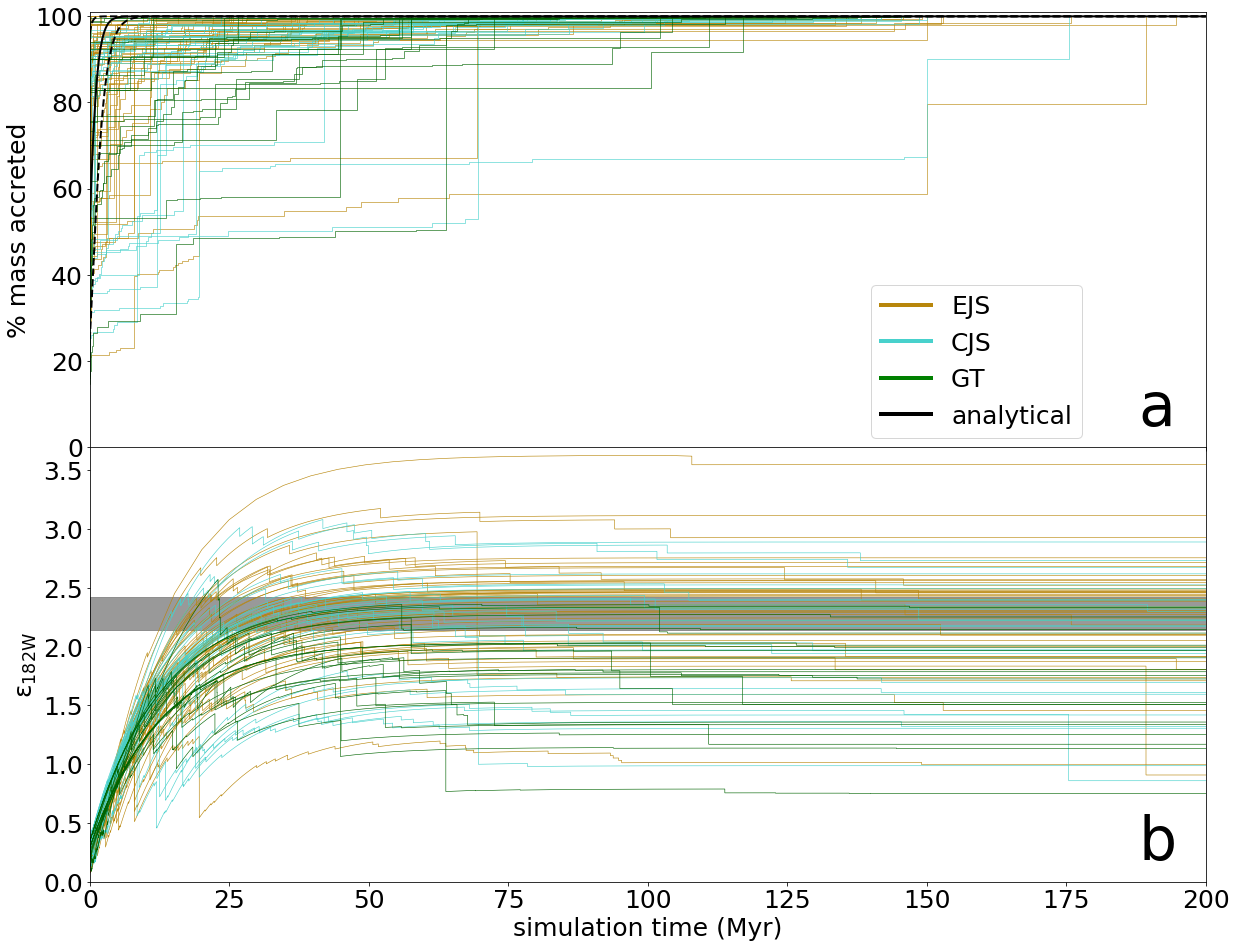

In [63]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig18 = plt.figure(figsize=(20, 16))
ax18_1 = fig18.add_subplot(211)

#ax18_1.step(EJS_timesteps.iloc[:,1], EJS_growthsteps.iloc[:,1], color = 'k', linewidth = 0.4, where = 'post') #dont know what this did
for i in range(0,EJS_growthsteps.shape[1]):
    ax18_1.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 0.6, where = 'post') #normalized
for i in range(0,CJS_growthsteps.shape[1]):
    ax18_1.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 0.6, where = 'post') #normalized
for i in range(0,GT_growthsteps.shape[1]): 
    ax18_1.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 0.6, where = 'post') #normalized
    
ax18_1.plot(np.divide(x,1e6),growth_frac, color = 'k', linewidth = 2)
ax18_1.plot(np.divide(x,1e6),upper_95_CI, color = 'k', linestyle = '--',linewidth = 2)
ax18_1.plot(np.divide(x,1e6),lower_95_CI, color = 'k', linestyle = '--',linewidth = 2)

ax18_1.set_xlim([0, 200])
ax18_1.set_ylim([0, 101])
ax18_1.set_ylabel('% mass accreted', fontsize = 25)
ax18_1.set_xlabel('time (Myr post-simulation)', fontsize = 25)
ax18_1.set_yticklabels([0,20,40,60,80,100], fontsize = 25)
legend_elements = [Line2D([0], [0], label='EJS',color='darkgoldenrod', linewidth=4),Line2D([0], [0], label='CJS',color='mediumturquoise', linewidth=4),
                   Line2D([0], [0], label='GT',color='g', linewidth=4), Line2D([0], [0], label='analytical',color='k', linewidth=4),]
ax18_1.legend(handles = legend_elements, loc=[0.7,0.02], fontsize = 25)
plt.text(0.94, 0.05, "a", fontsize = 60, backgroundcolor = 'w', transform=ax18_1.transAxes)

ax18_2 = fig18.add_subplot(212)
zone1 = patches.Rectangle((0,2.14),205,0.28, color = 'grey', alpha = 0.8) #(left,bottom),length,height
ax18_2.add_patch(zone1)
for i in range(len(EJS_analog_t)):
    ax18_2.plot(np.subtract(EJS_analog_t[i],2),EJS_analog_eps[i], color = 'darkgoldenrod', linewidth = 0.6)
for i in range(len(CJS_analog_t)):
    ax18_2.plot(np.subtract(CJS_analog_t[i],2),CJS_analog_eps[i], color = 'mediumturquoise', linewidth = 0.6)
for i in range(len(GT_analog_t)):
    ax18_2.plot(np.subtract(GT_analog_t[i],2),GT_analog_eps[i], color = 'darkgreen', linewidth = 0.6)    
ax18_2.set_xlim([0, 200])
ax18_2.set_ylim([0, 3.7])
ax18_2.set_ylabel('\u03B5$_{\mathrm{182W}} $',fontsize = 25)
ax18_2.set_xlabel('simulation time (Myr)', fontsize = 25)
#plt.text(1.1, 2.23, "Martian value", fontsize = 20)
plt.setp(ax18_1.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.text(0.94, 0.05, "b", fontsize = 60, backgroundcolor = 'w', transform=ax18_2.transAxes)
#ax18_3 = inset_axes(ax18_1, width="25%", height="50%", loc=4, borderpad=2)
#for i in range(0,EJS_growthsteps.shape[1]):
#    ax18_3.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkmagenta', linewidth = 0.6, where = 'post') #normalized
#for i in range(0,CJS_growthsteps.shape[1]):
#    ax18_3.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 0.6, where = 'post') #normalized
#for i in range(0,GT_growthsteps.shape[1]): 
#    ax18_3.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 0.6, where = 'post') #normalized
#ax18_3.plot(np.divide(x,1e6),growth_frac, color = 'k', linewidth = 2)
#ax18_3.plot(np.divide(x,1e6),upper_95_CI, color = 'k', linestyle = '--',linewidth = 2)
#ax18_3.plot(np.divide(x,1e6),lower_95_CI, color = 'k', linestyle = '--',linewidth = 2)
#ax18_3.set_xticks([0,5,10,15,20])
#ax18_3.set_xlim([0, 10])
#ax18_3.set_ylim([0, 101])


plt.show()
#fig18.savefig('curves_figure_alt.png')
#fig18.savefig('figure3.pdf')

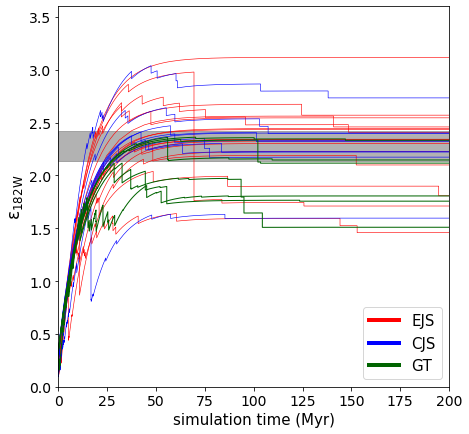

In [104]:
fig182 = plt.figure(figsize=(7, 7))
ax182 = fig182.add_subplot(111)

zone1 = patches.Rectangle((0,2.14),205,0.28, color = 'grey', alpha = 0.6) #(left,bottom),length,height
ax182.add_patch(zone1)
for i in range(len(EJS_analog_t)-35):
    ax182.plot(np.subtract(EJS_analog_t[i],2),EJS_analog_eps[i], color = 'r', linewidth = 0.6)
for i in range(len(CJS_analog_t)-20):
    ax182.plot(np.subtract(CJS_analog_t[i],2),CJS_analog_eps[i], color = 'b', linewidth = 0.6)
for i in range(len(GT_analog_t)-15):
    ax182.plot(np.subtract(GT_analog_t[i],2),GT_analog_eps[i], color = 'darkgreen', linewidth = 1)   
    
legend_elements = [Line2D([0], [0], label='EJS',color='r', linewidth=4),Line2D([0], [0], label='CJS',color='b', linewidth=4),
                   Line2D([0], [0], label='GT',color='darkgreen', linewidth=4)]
ax182.legend(handles = legend_elements, fontsize = 15, loc = "lower right")
    
ax182.set_xlim([0, 200])
ax182.set_ylim([0, 3.6])
ax182.set_ylabel('\u03B5$_{\mathrm{182W}} $',fontsize = 17)
ax182.set_xlabel('simulation time (Myr)', fontsize = 15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()
fig182.savefig('small_curves.png')

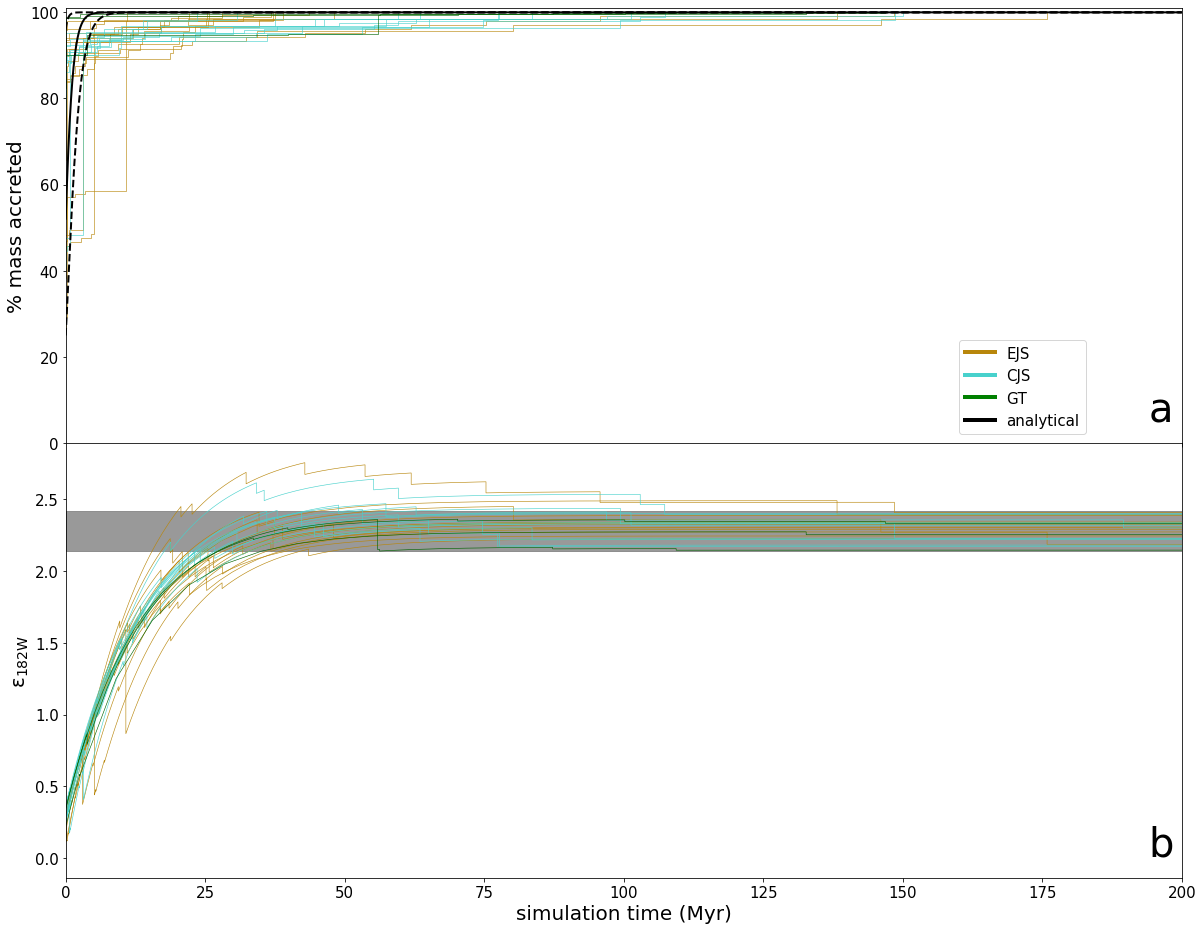

In [61]:
fig188 = plt.figure(figsize=(20, 16))
ax188_1 = fig188.add_subplot(211)

eps_upper = 2.42
eps_lower = 2.14

#ax18_1.step(EJS_timesteps.iloc[:,1], EJS_growthsteps.iloc[:,1], color = 'k', linewidth = 0.4, where = 'post') #dont know what this did
for i in range(0,EJS_growthsteps.shape[1]):
    if EJS_analog_eps[i][-1] <= eps_upper and EJS_analog_eps[i][-1] >= eps_lower:
        ax188_1.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkgoldenrod', linewidth = 0.6, where = 'post') #normalized
for i in range(0,CJS_growthsteps.shape[1]):
    if CJS_analog_eps[i][-1] <= eps_upper and CJS_analog_eps[i][-1] >= eps_lower:
        ax188_1.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 0.6, where = 'post') #normalized
for i in range(0,GT_growthsteps.shape[1]): 
    if GT_analog_eps[i][-1] <= eps_upper and GT_analog_eps[i][-1] >= eps_lower:
        ax188_1.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 0.6, where = 'post') #normalized
    
ax188_1.plot(np.divide(x,1e6),growth_frac, color = 'k', linewidth = 2)
ax188_1.plot(np.divide(x,1e6),upper_95_CI, color = 'k', linestyle = '--',linewidth = 2)
ax188_1.plot(np.divide(x,1e6),lower_95_CI, color = 'k', linestyle = '--',linewidth = 2)

ax188_1.set_xlim([0, 200])
ax188_1.set_ylim([0, 101])
ax188_1.set_ylabel('% mass accreted', fontsize = 20)
ax188_1.set_xlabel('time (Myr post-simulation)', fontsize = 20)
ax188_1.set_yticklabels([0,20,40,60,80,100], fontsize = 15)
legend_elements = [Line2D([0], [0], label='EJS',color='darkgoldenrod', linewidth=4),Line2D([0], [0], label='CJS',color='mediumturquoise', linewidth=4),
                   Line2D([0], [0], label='GT',color='g', linewidth=4), Line2D([0], [0], label='analytical',color='k', linewidth=4),]
ax188_1.legend(handles = legend_elements, loc=[0.8,0.02], fontsize = 15)
plt.text(0.97, 0.05, "a", fontsize = 40, backgroundcolor = 'w', transform=ax188_1.transAxes)

ax188_2 = fig188.add_subplot(212)
zone1 = patches.Rectangle((0,2.14),205,0.28, color = 'grey', alpha = 0.8) #(left,bottom),length,height
ax188_2.add_patch(zone1)
for i in range(len(EJS_analog_t)):
    if EJS_analog_eps[i][-1] <= eps_upper and EJS_analog_eps[i][-1] >= eps_lower:
        ax188_2.plot(np.subtract(EJS_analog_t[i],2),EJS_analog_eps[i], color = 'darkgoldenrod', linewidth = 0.6)
for i in range(len(CJS_analog_t)):
    if CJS_analog_eps[i][-1] <= eps_upper and CJS_analog_eps[i][-1] >= eps_lower:
        ax188_2.plot(np.subtract(CJS_analog_t[i],2),CJS_analog_eps[i], color = 'mediumturquoise', linewidth = 0.6)
for i in range(len(GT_analog_t)):
    if GT_analog_eps[i][-1] <= eps_upper and GT_analog_eps[i][-1] >= eps_lower:
        ax188_2.plot(np.subtract(GT_analog_t[i],2),GT_analog_eps[i], color = 'darkgreen', linewidth = 0.6)    
ax188_2.set_xlim([0, 200])
ax188_2.set_ylabel('\u03B5$_{\mathrm{182W}} $',fontsize = 20)
ax188_2.set_xlabel('simulation time (Myr)', fontsize = 20)
#plt.text(1.1, 2.23, "Martian value", fontsize = 20)
plt.setp(ax188_1.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.text(0.97, 0.05, "b", fontsize = 40, backgroundcolor = 'w', transform=ax188_2.transAxes)
#ax18_3 = inset_axes(ax18_1, width="25%", height="50%", loc=4, borderpad=2)
#for i in range(0,EJS_growthsteps.shape[1]):
#    ax18_3.step(EJS_timesteps.iloc[:,i], EJS_growthsteps.iloc[:,i], color = 'darkmagenta', linewidth = 0.6, where = 'post') #normalized
#for i in range(0,CJS_growthsteps.shape[1]):
#    ax18_3.step(CJS_timesteps.iloc[:,i], CJS_growthsteps.iloc[:,i], color = 'mediumturquoise', linewidth = 0.6, where = 'post') #normalized
#for i in range(0,GT_growthsteps.shape[1]): 
#    ax18_3.step(GT_timesteps.iloc[:,i], GT_growthsteps.iloc[:,i], color = 'darkgreen', linewidth = 0.6, where = 'post') #normalized
#ax18_3.plot(np.divide(x,1e6),growth_frac, color = 'k', linewidth = 2)
#ax18_3.plot(np.divide(x,1e6),upper_95_CI, color = 'k', linestyle = '--',linewidth = 2)
#ax18_3.plot(np.divide(x,1e6),lower_95_CI, color = 'k', linestyle = '--',linewidth = 2)
#ax18_3.set_xticks([0,5,10,15,20])
#ax18_3.set_xlim([0, 10])
#ax18_3.set_ylim([0, 101])


plt.show()
#fig188.savefig('curves_figure_restricted.png')
#fig18.savefig('figure3.pdf')

In [62]:
#for i in EJS_analog_eps:
#    print(i)